## Tahapan Pengerjaan
1. Download Dataset yang dibutuhkan.

2. Pelajari konteks masalah dari sumber eksternal untuk meningkatkan Subject Matter Knowledge.

3. Pahami deskripsi kolom yang tersedia.

4. Tentukan goal, objective, dan metrics dari masalah yang ada.

5. Lakukan penggalian informasi terkait kondisi data awal.

6. Lakukan proses Data Cleaning dan Data Processing.

7. Lakukan proses penggalian insight mengacu kepada objective yang sudah ditetapkan.

8. Lakukan pemodelan dengan berbagai macam metode (termasuk Logistic Regression) dan hyperparameternya.

9. Evaluasi hasil pemodelan.

10. Ukur seberapa besar dampak pemodelan dan rekomendasi bisnis terhadap metrics yang telah ditetapkan sebelumnya.

11. Push file .ipynb mu ke dalam github.

12. Buat file presentasi untuk menjelaskan pekerjaan yang telah dilakukan dan cantumkan link repo github di dalam ppt nya

In [ ]:
!pip install wordcloud==1.8.2.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [5]:
app_test=pd.read_csv("application_test.csv")
app_train=pd.read_csv("application_train.csv")
#pos_cash=pd.read_csv("POS_CASH_balance.csv")
#bur=pd.read_csv("bureau.csv")
#bur_bal=pd.read_csv("bureau_balance.csv")
#cc_bal=pd.read_csv("credit_card_balance.csv")
#inst_pay=pd.read_csv("installments_payments.csv")
#pre_app=pd.read_csv("previous_application.csv")
#s_sub=pd.read_csv("sample_submission.csv")

# 1. Problem Research

Menggunakan berbagai macam metode statistik dan Machine Learning untuk membuat prediksi skor kredit. Agar dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman datap diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses. 

# 2. Data Pre-Processing

In [6]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
(app_train.isnull().sum()).sort_values()

SK_ID_CURR                          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
                                ...  
NONLIVINGAPARTMENTS_MEDI       213514
NONLIVINGAPARTMENTS_MODE       213514
COMMONAREA_MODE                214865
COMMONAREA_AVG                 214865
COMMONAREA_MEDI                214865
Length: 122, dtype: int64

In [ ]:
app_train.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["std"], color ="red").bar(subset = ["mean"], color ="blue")


In [ ]:
app_train.describe(include='object').T.sort_values(ascending = 0,by = "top").style.background_gradient(cmap = "BuGn")\
.bar(subset = ["freq"], color ="crimson").bar(subset = ["unique"], color ="orange").bar(subset = ["count"], color ="pink")

## missing values

In [7]:
for tr in app_train.describe(include='object').columns:
    app_train[tr]=app_train[tr].fillna((app_train[tr].mode()))

In [8]:
for ci in app_train.describe().columns:
    app_train[ci]=app_train[ci].fillna((app_train[ci].median()))

In [ ]:
app_test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [9]:
for te in app_test.describe(include='object').columns:
    app_test[te]=app_test[te].fillna((app_test[te].mode()))


In [10]:
for tt in app_test.describe().columns:
    app_test[tt]=app_test[tt].fillna((app_test[tt].median()))

In [ ]:
app_train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [ ]:
app_test.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 121, dtype: int64

# 3. Data Visualization and Business Insight

In [ ]:
l1=[]
l2=[]
for k in app_train.columns:
    if (app_train[k].nunique())<100:
        l1.append(k)
    else:
        l2.append(k)

Histograms of dataset
/tmp/ipykernel_670/3867717403.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(app_train[h], palette='Blues_r')
/tmp/ipykernel_670/3867717403.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(app_train[h], palette='Blues_r')
/tmp/ipykernel_670/3867717403.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(app_train[h], palette='Blues_r')
/tmp/ipykernel_670/3867717403.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(app_train[h], palette='Blues_r')
/tmp/ipykernel_670/3867717403.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(app_train[h], palette='Blues_r')
/tmp/ipykernel_670/3867717403.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(app_train[h], palette='Blues_r')
/tmp/ipykern

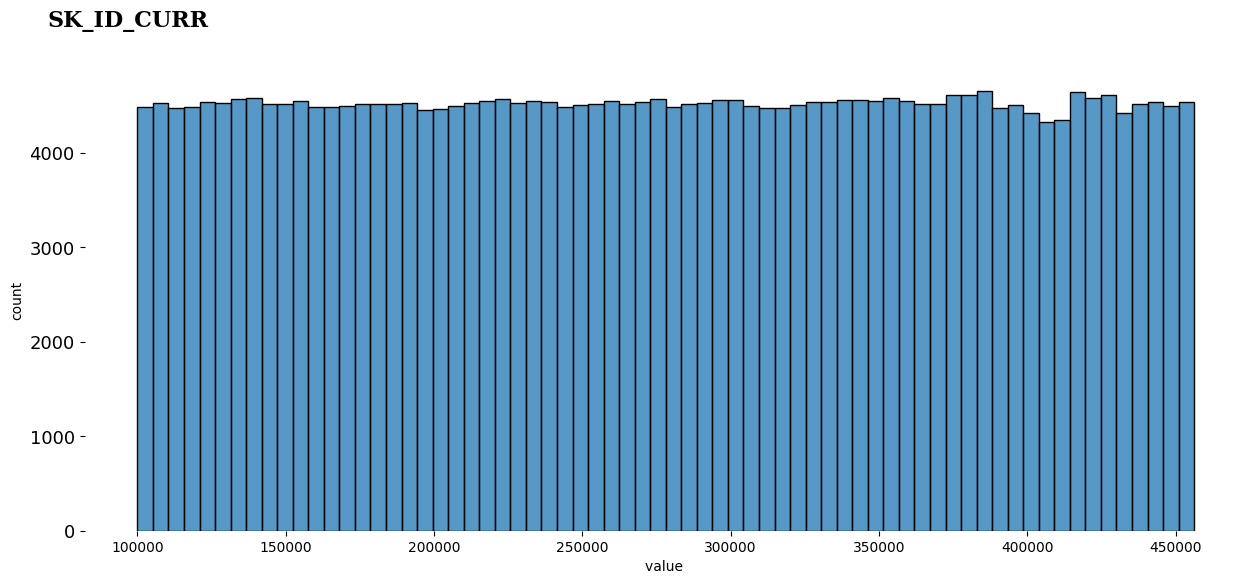

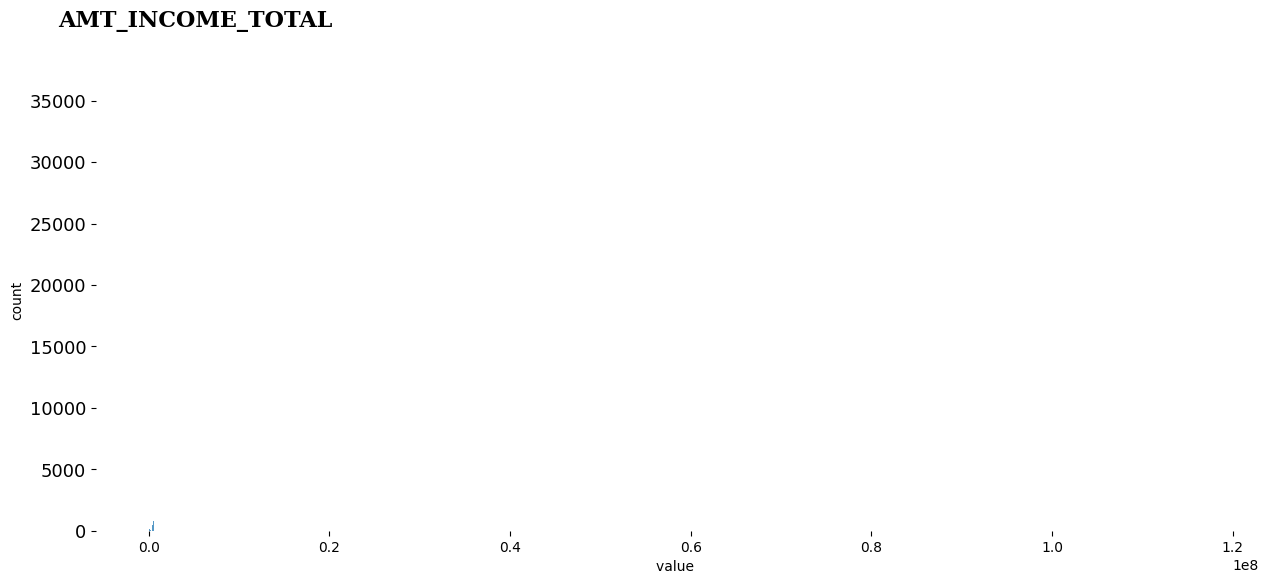

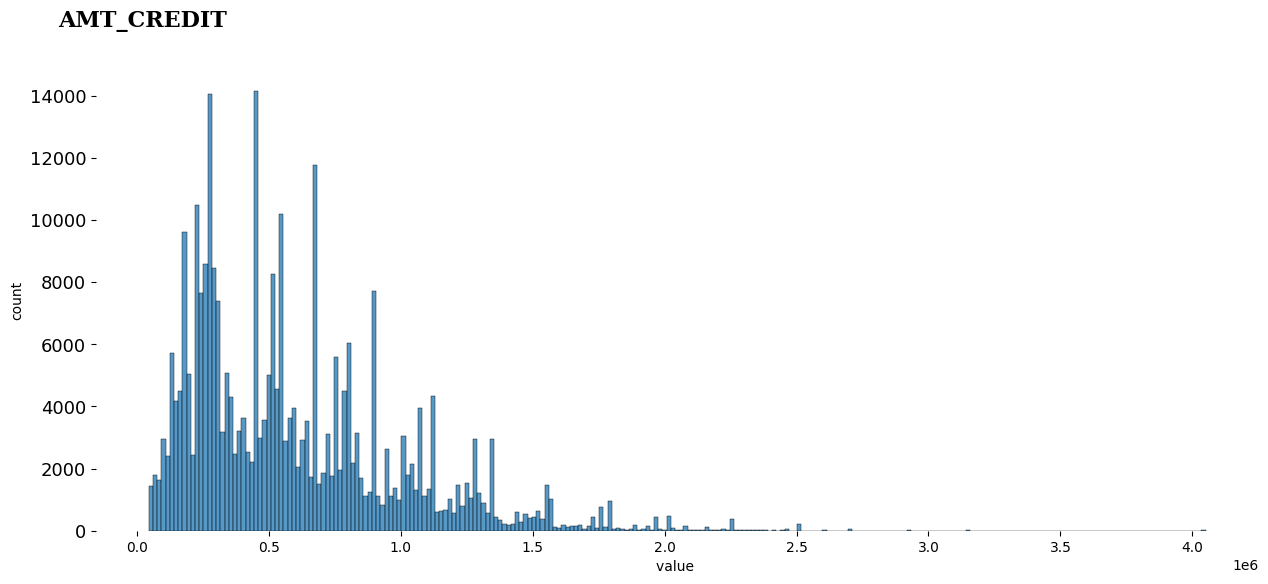

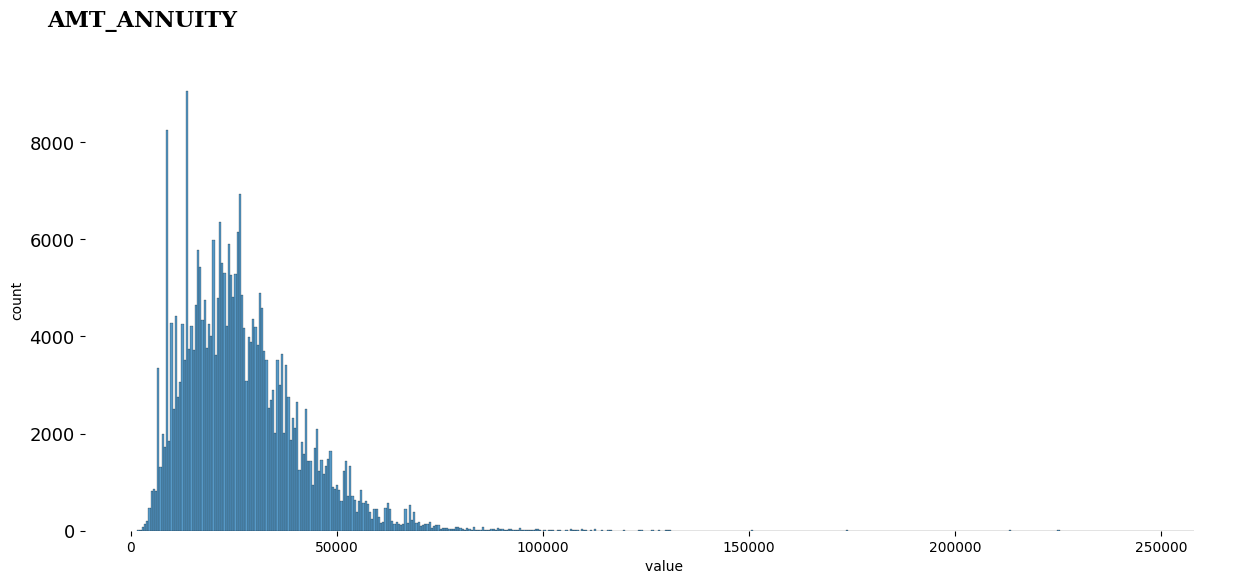

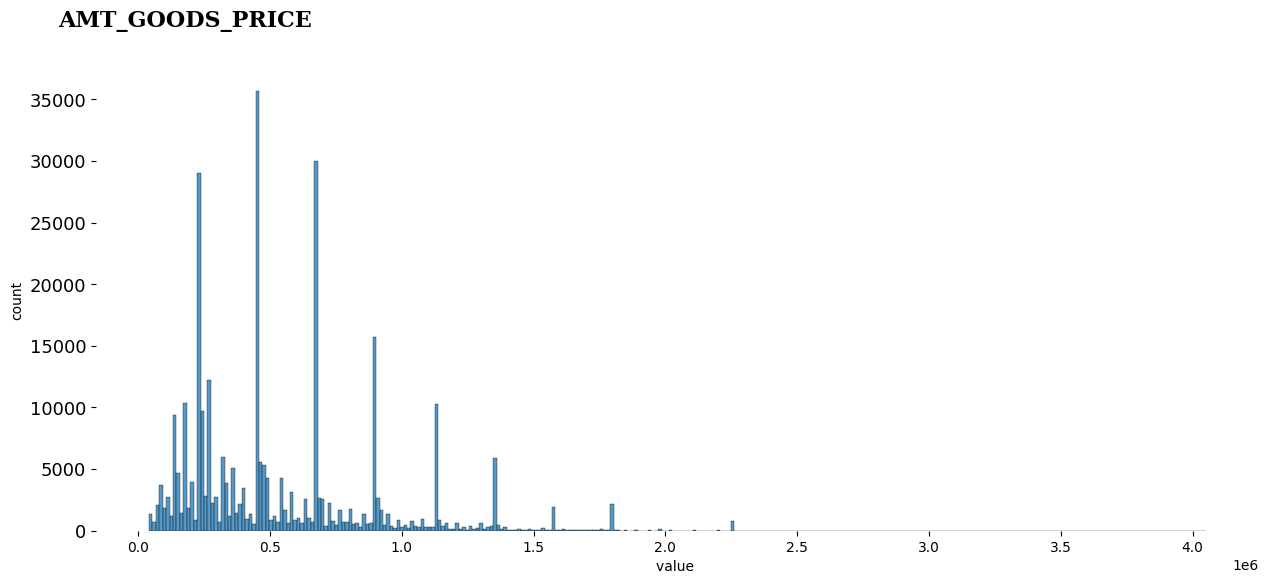

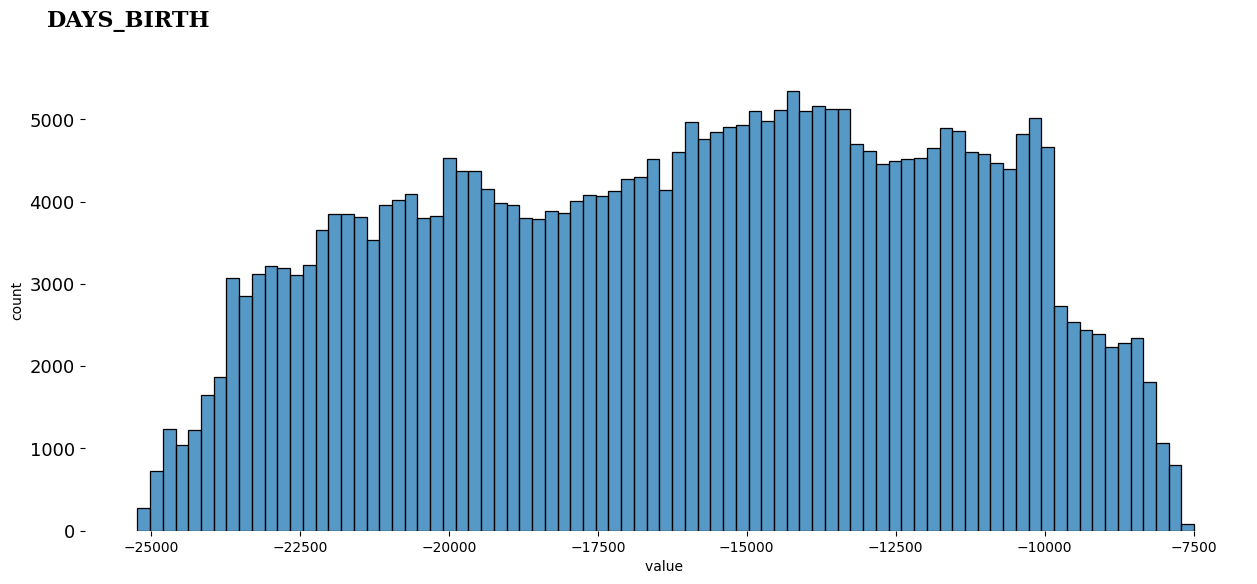

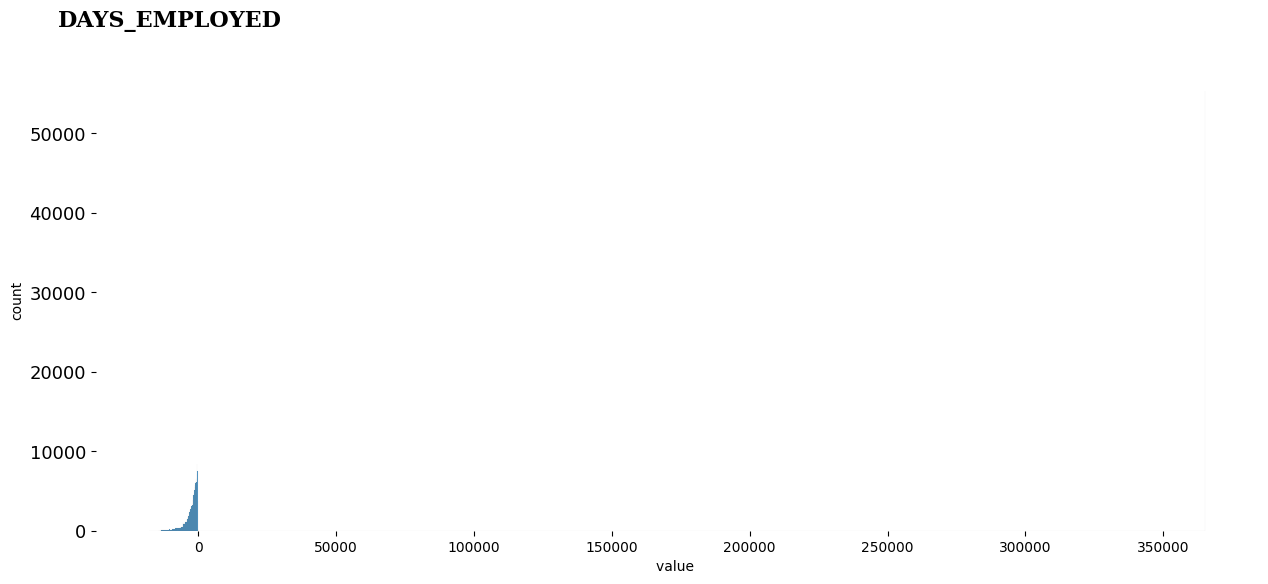

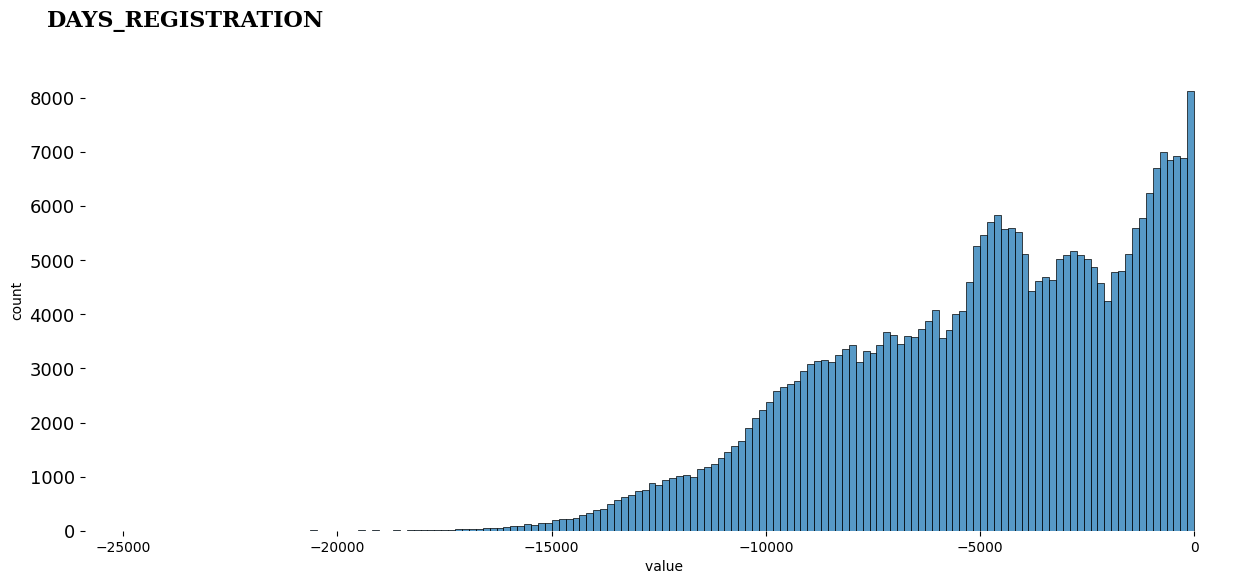

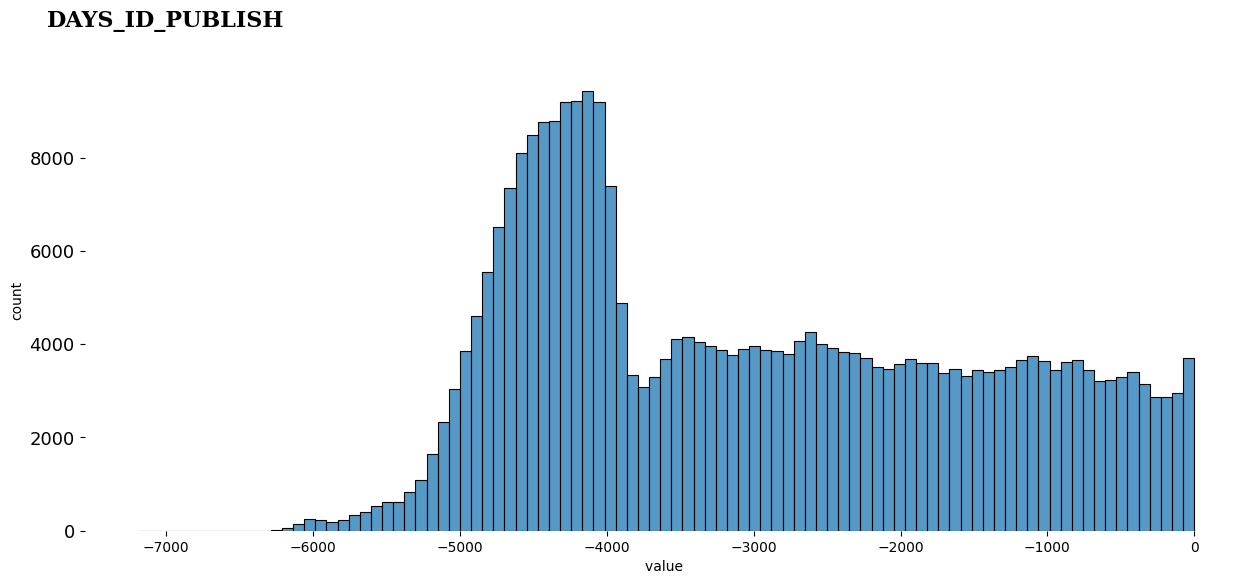

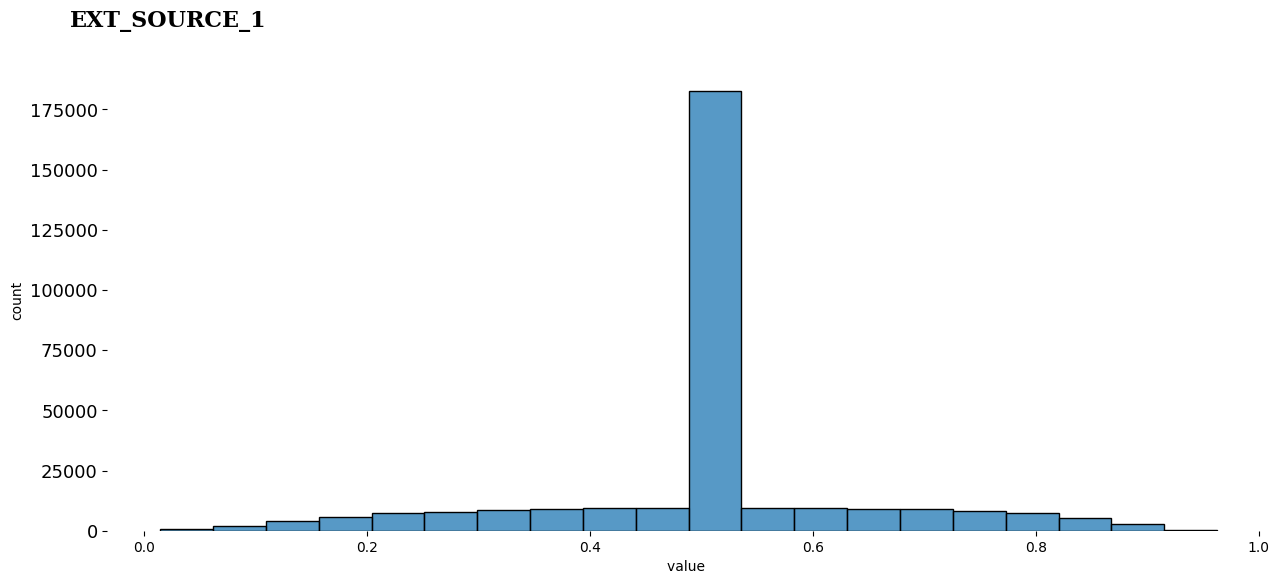

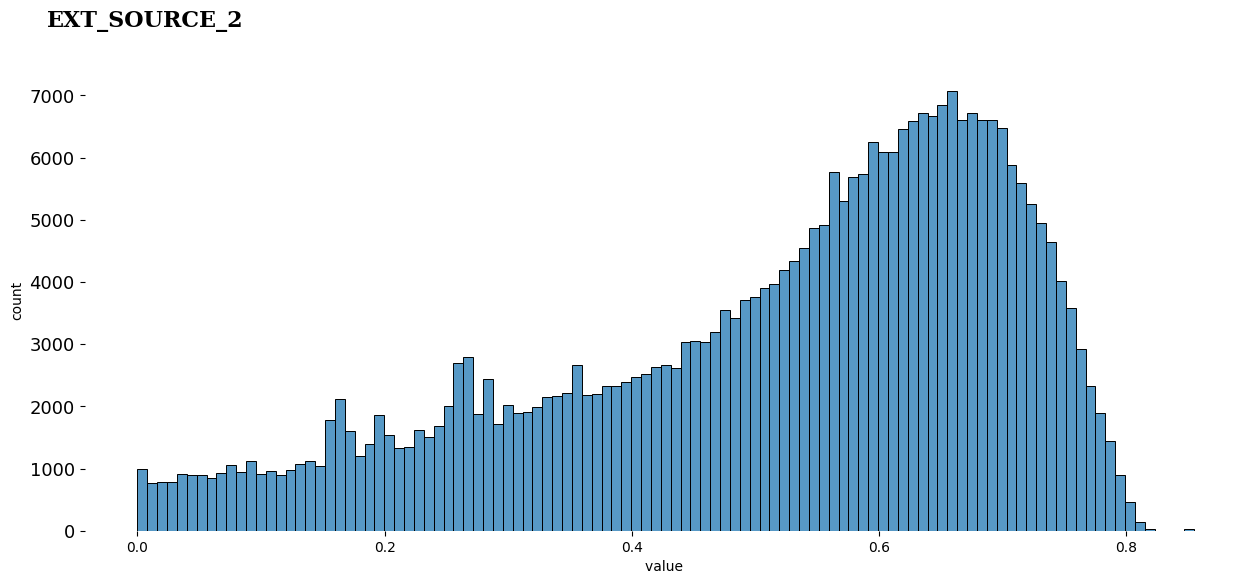

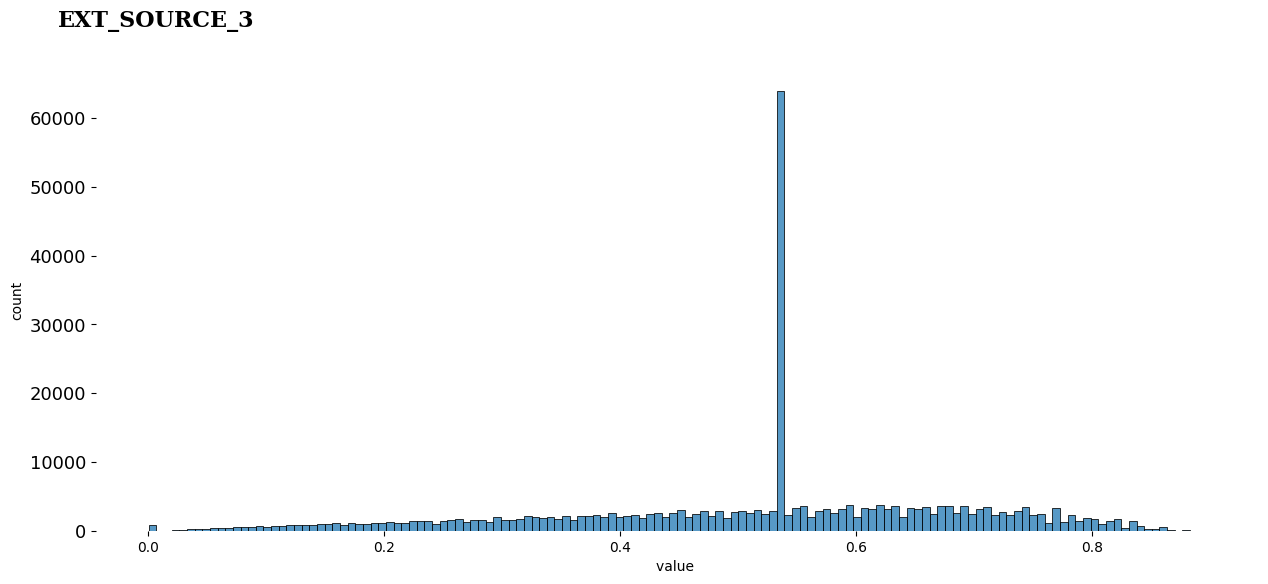

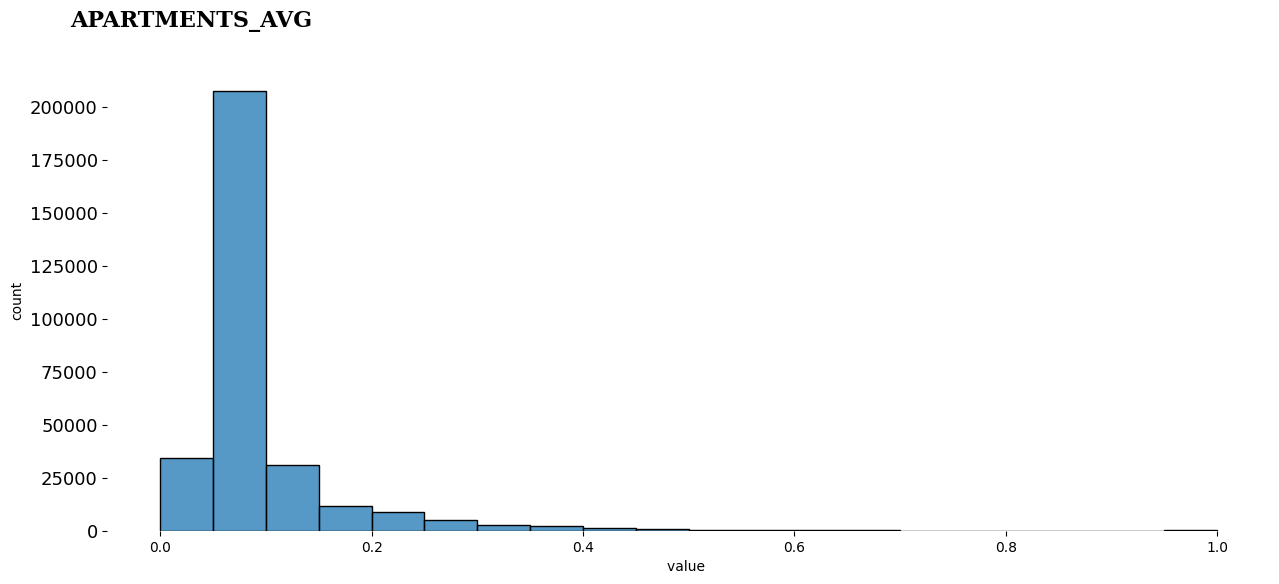

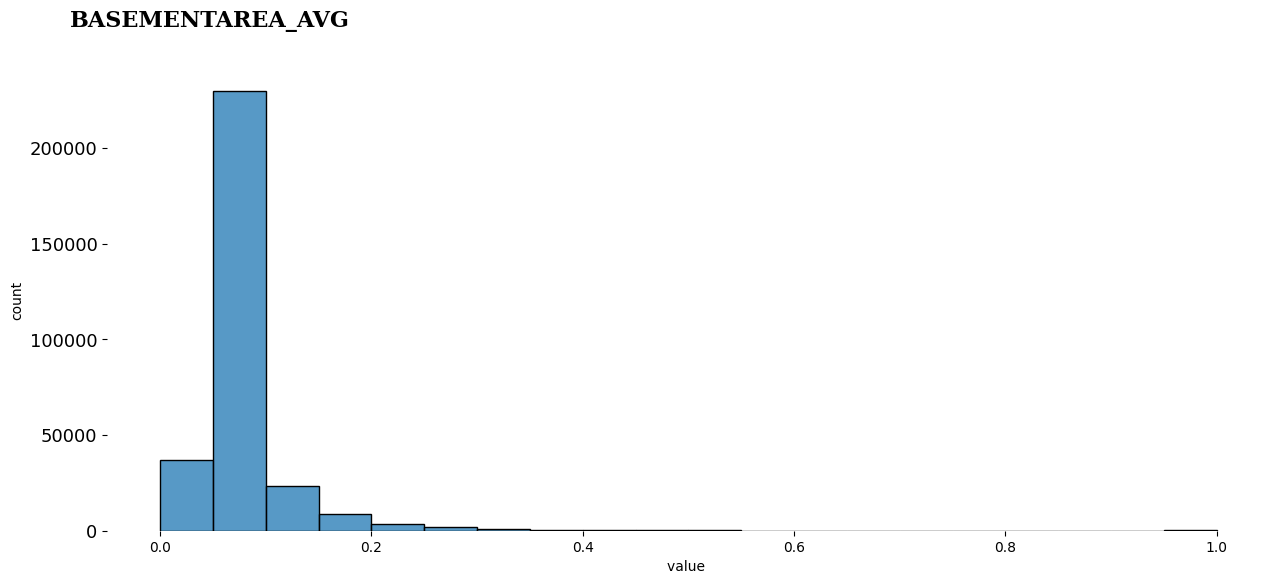

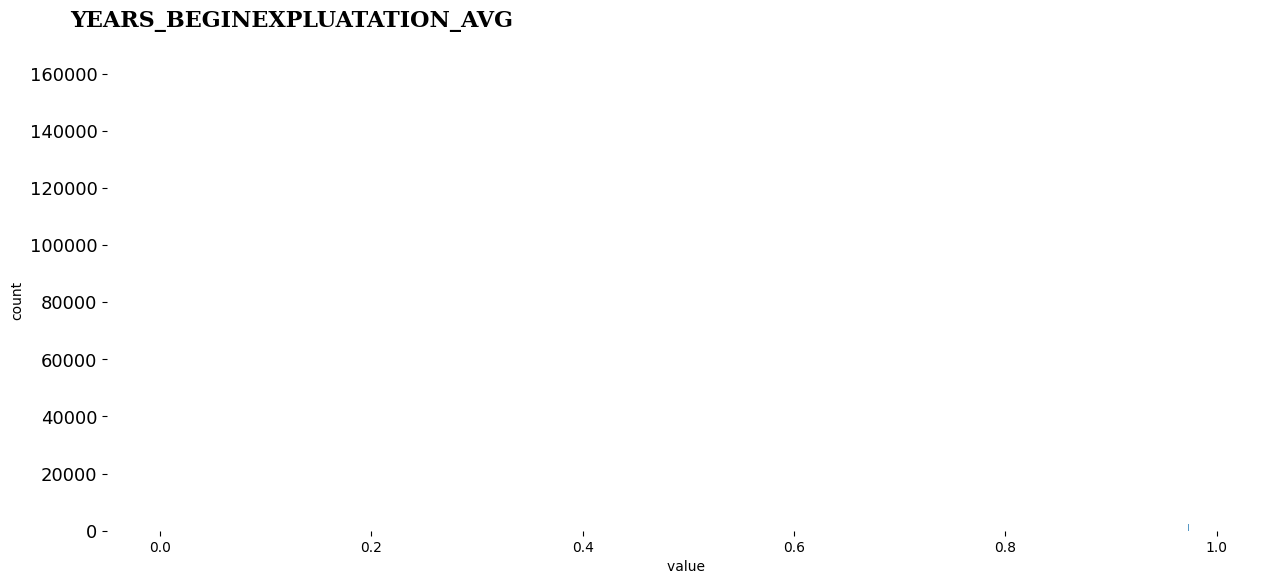

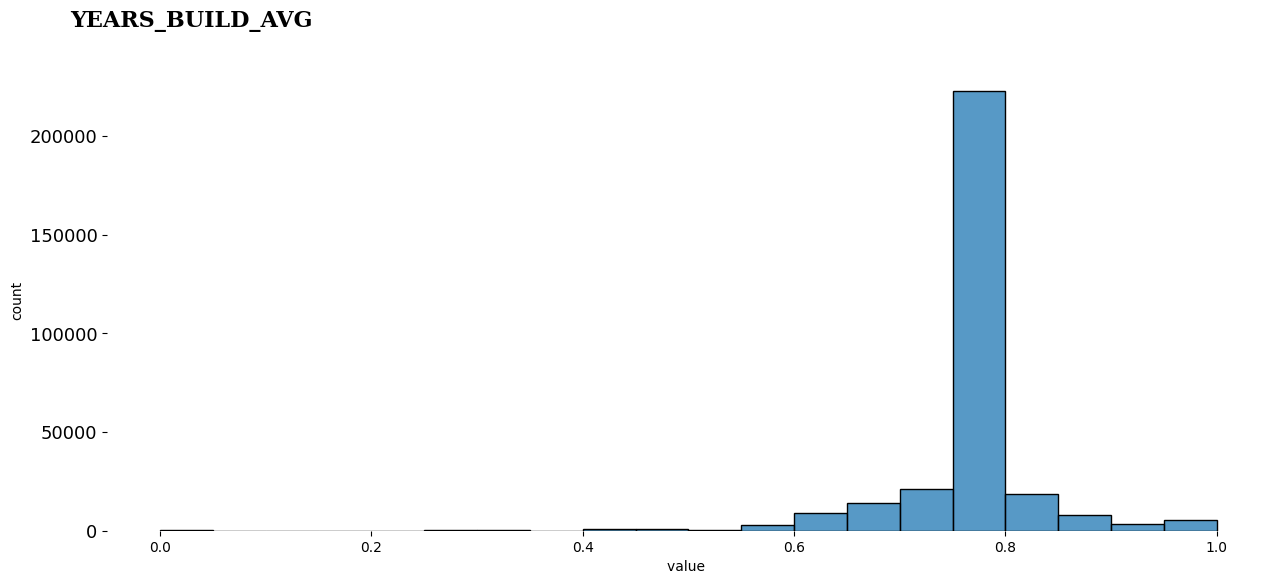

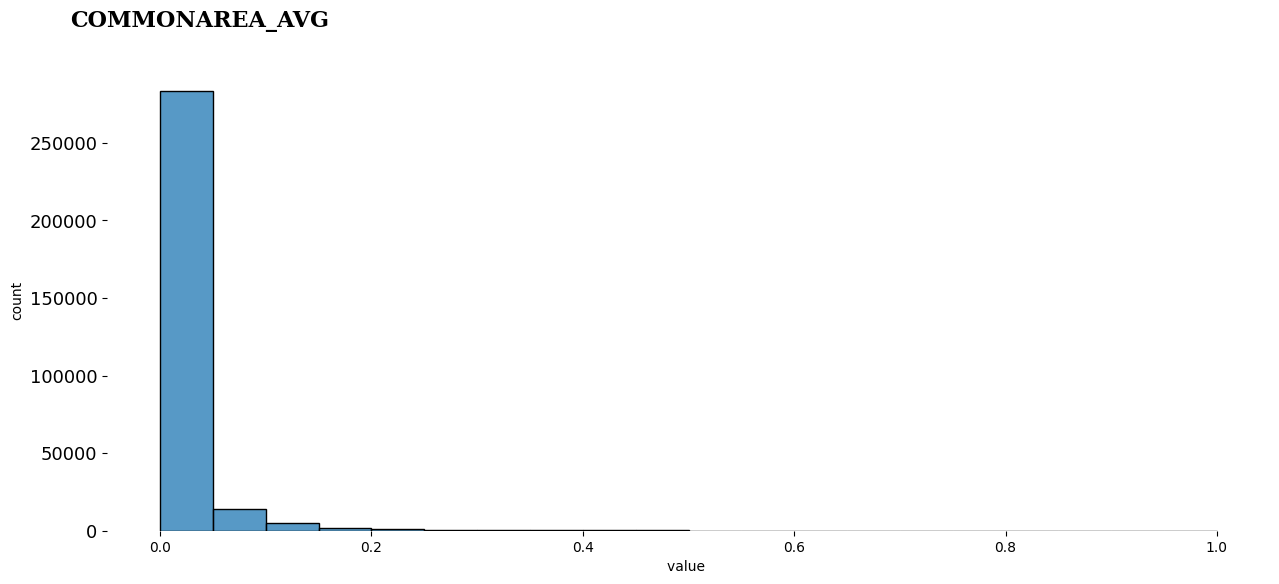

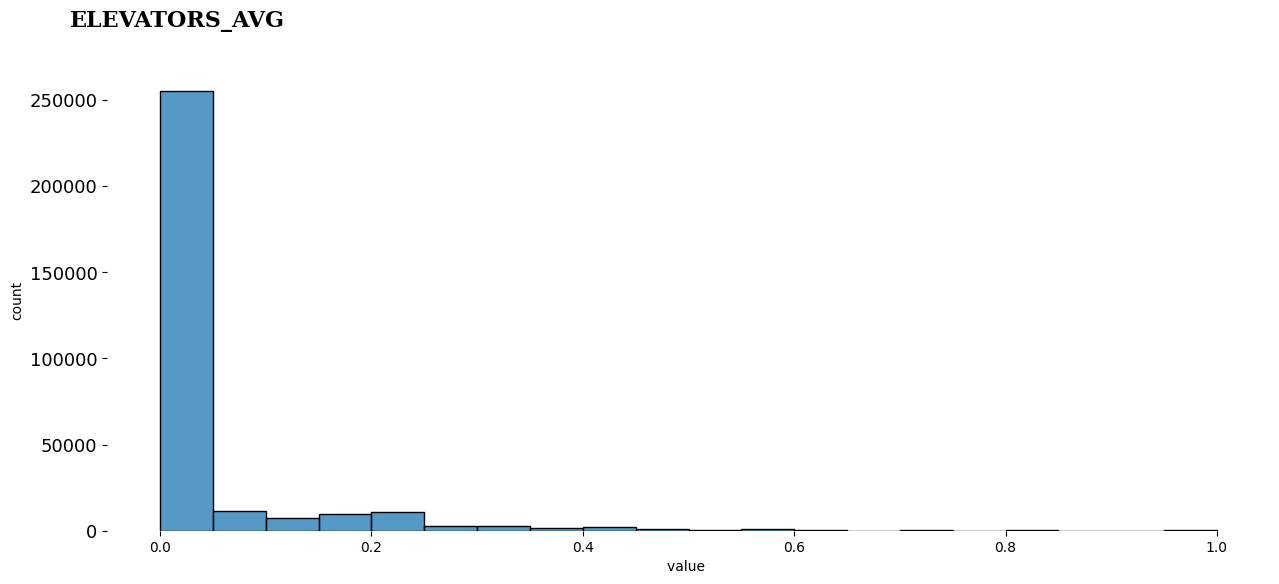

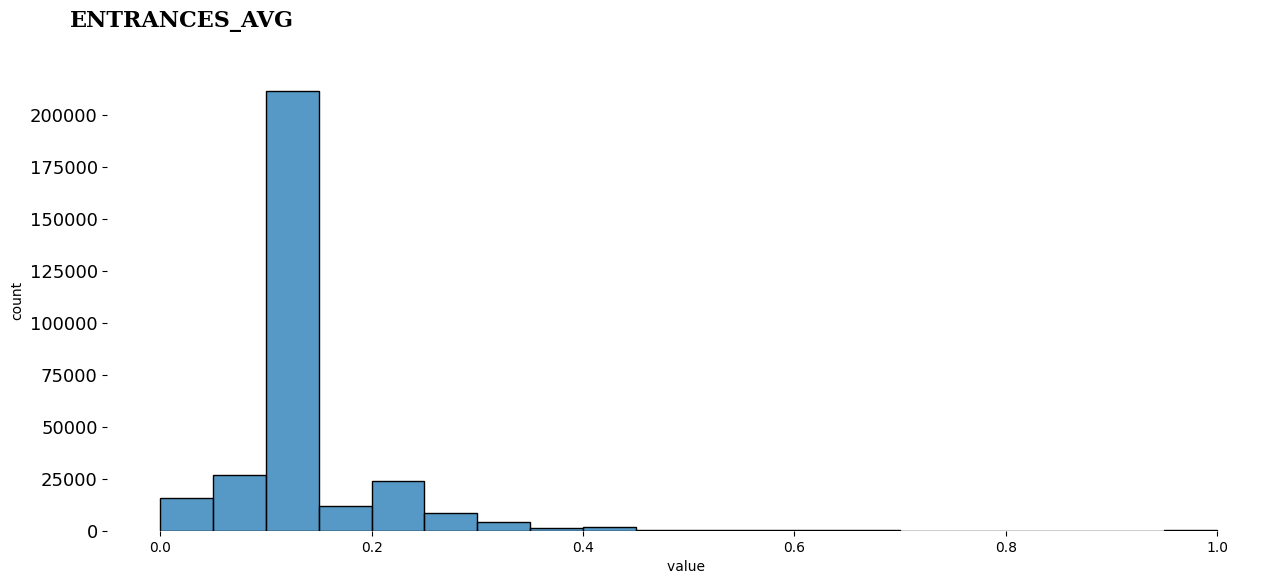

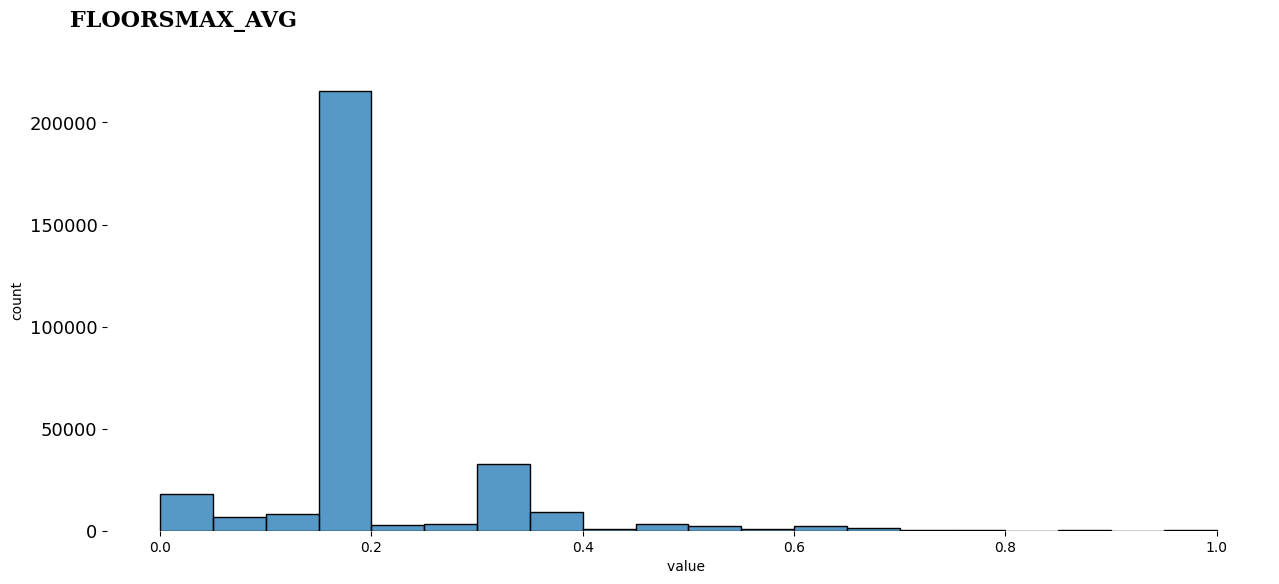

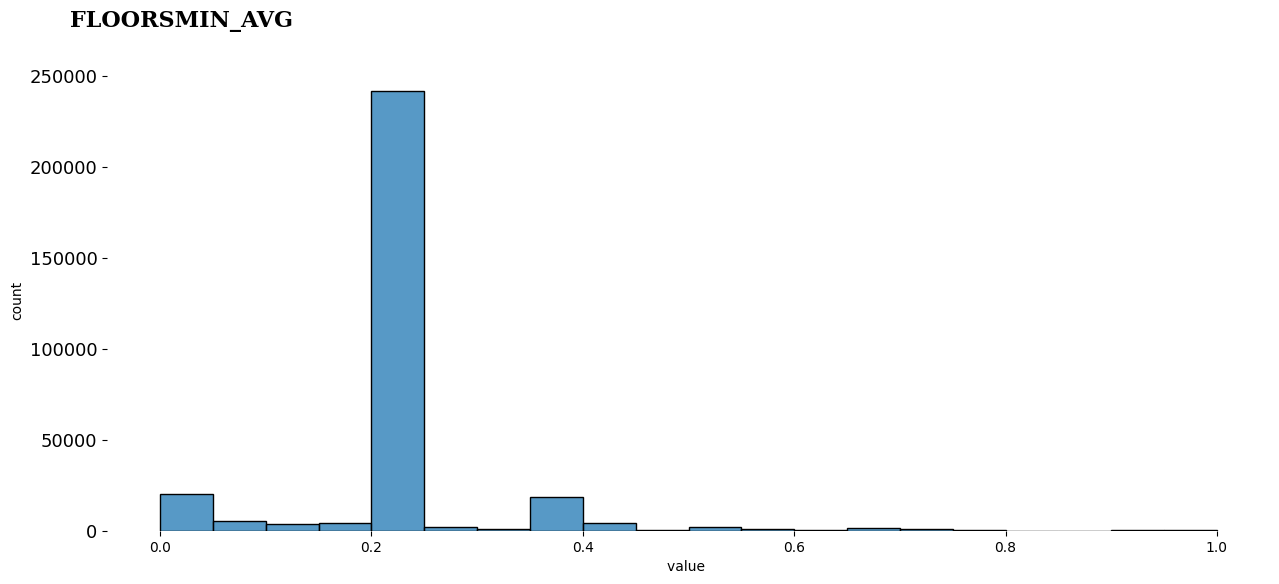

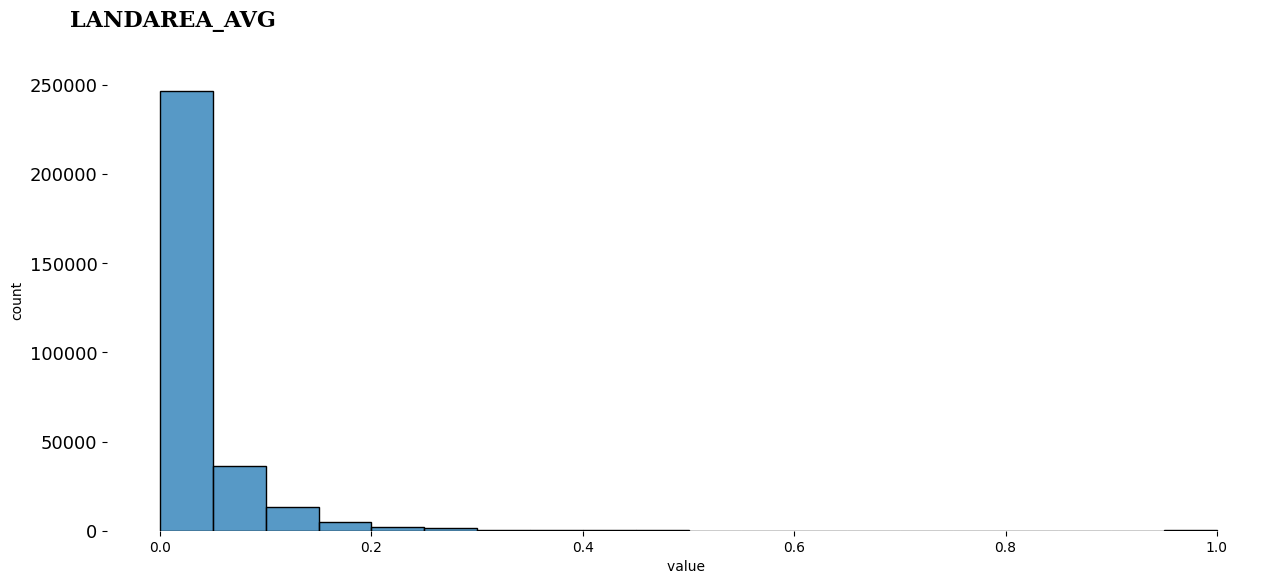

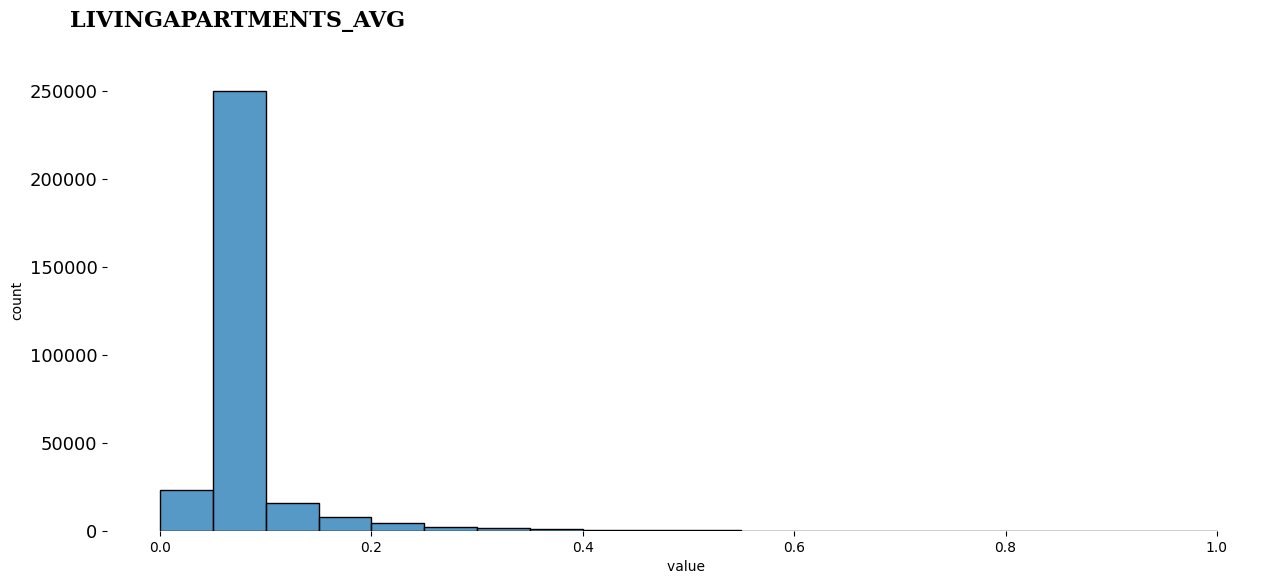

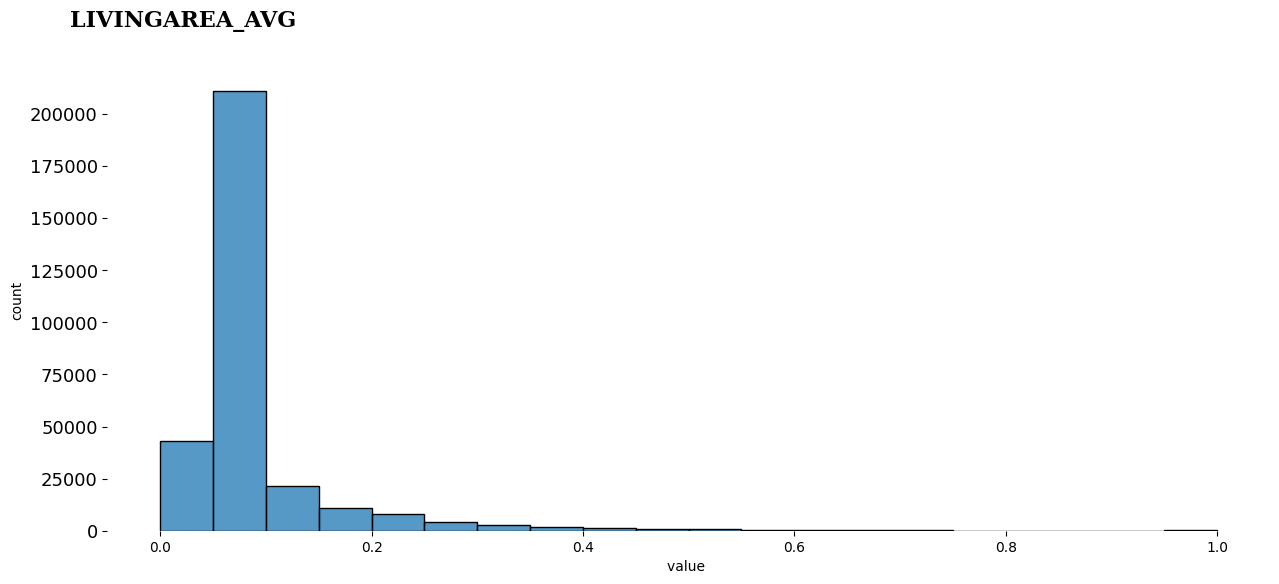

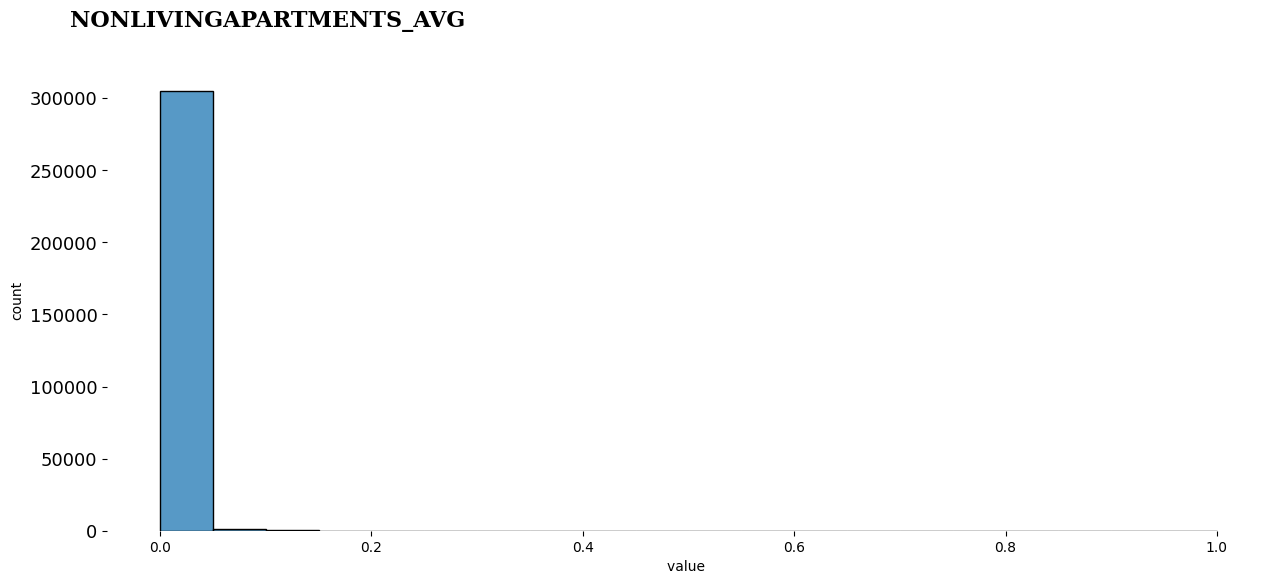

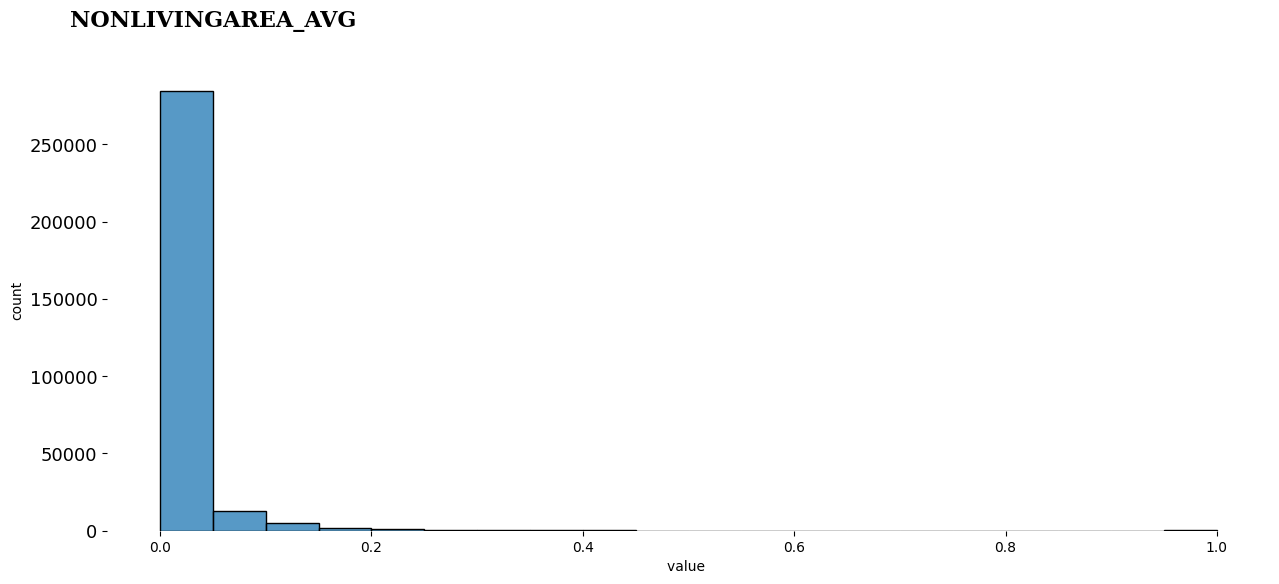

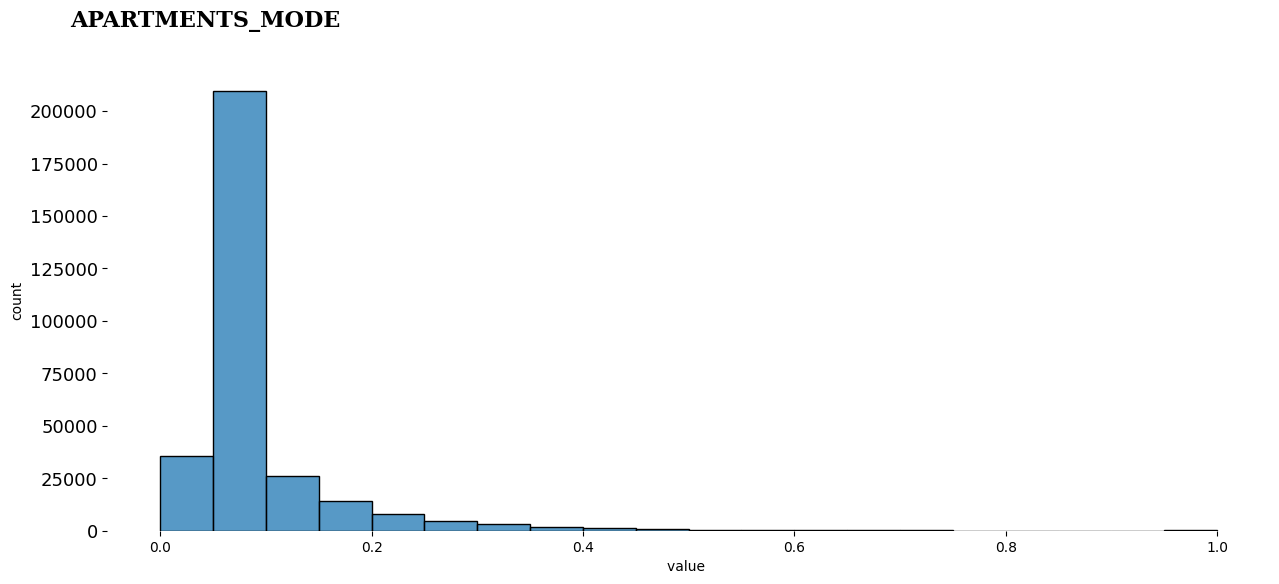

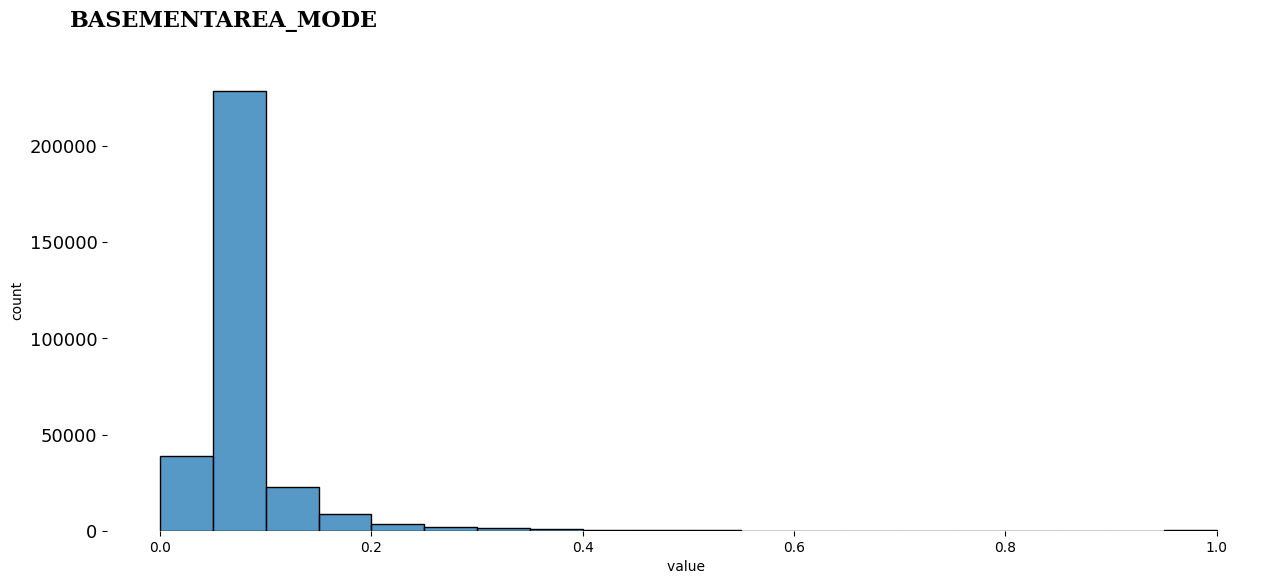

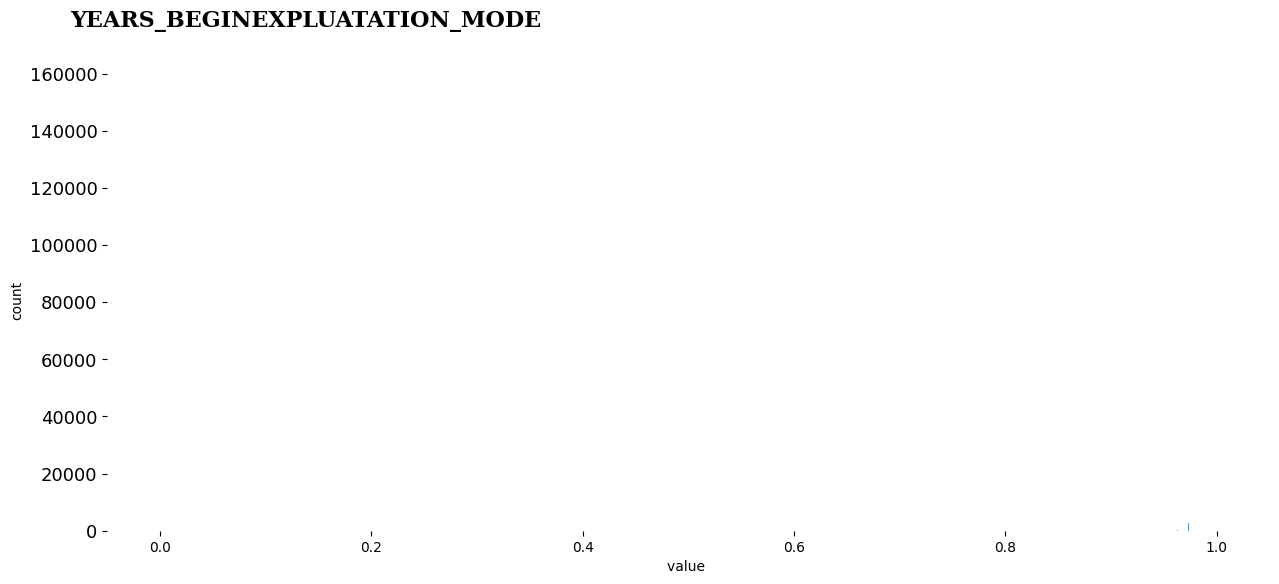

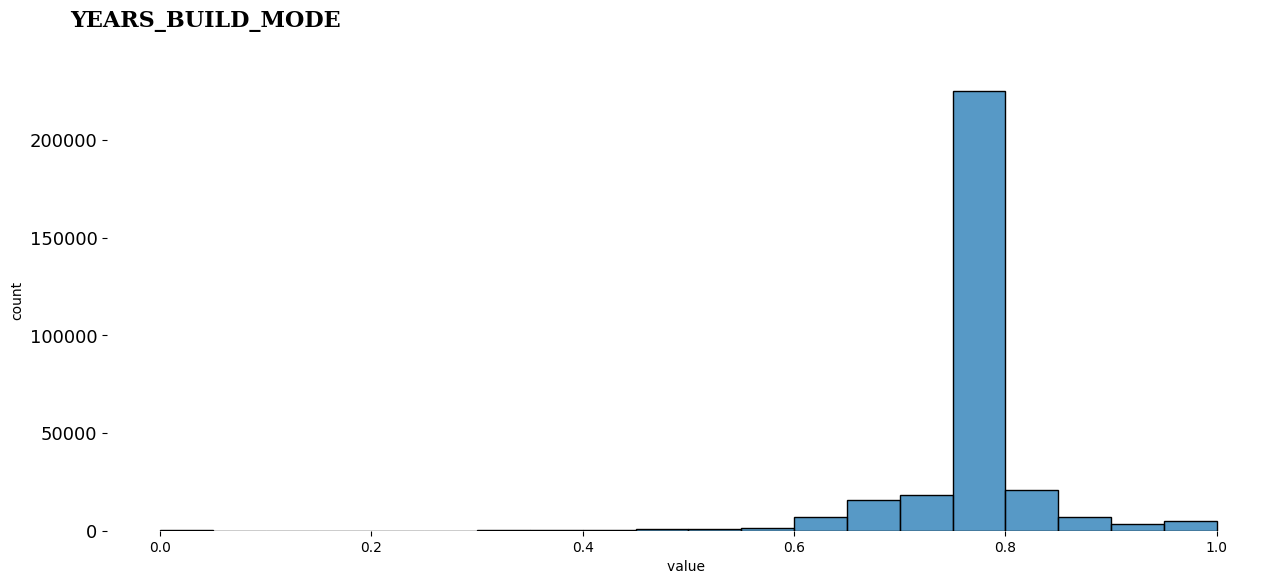

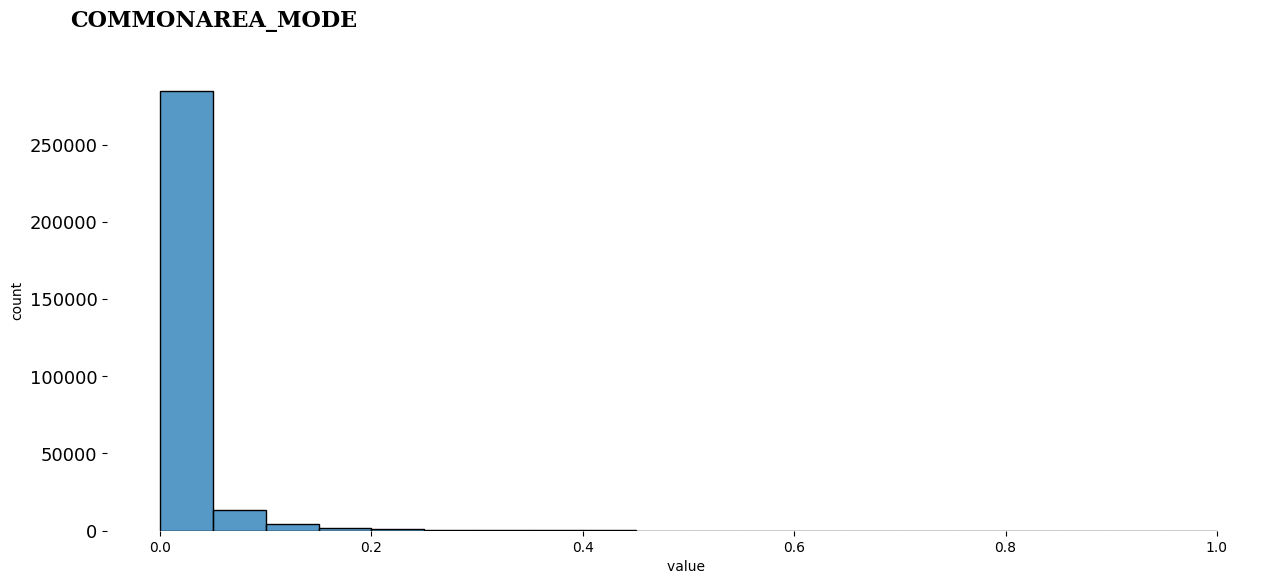

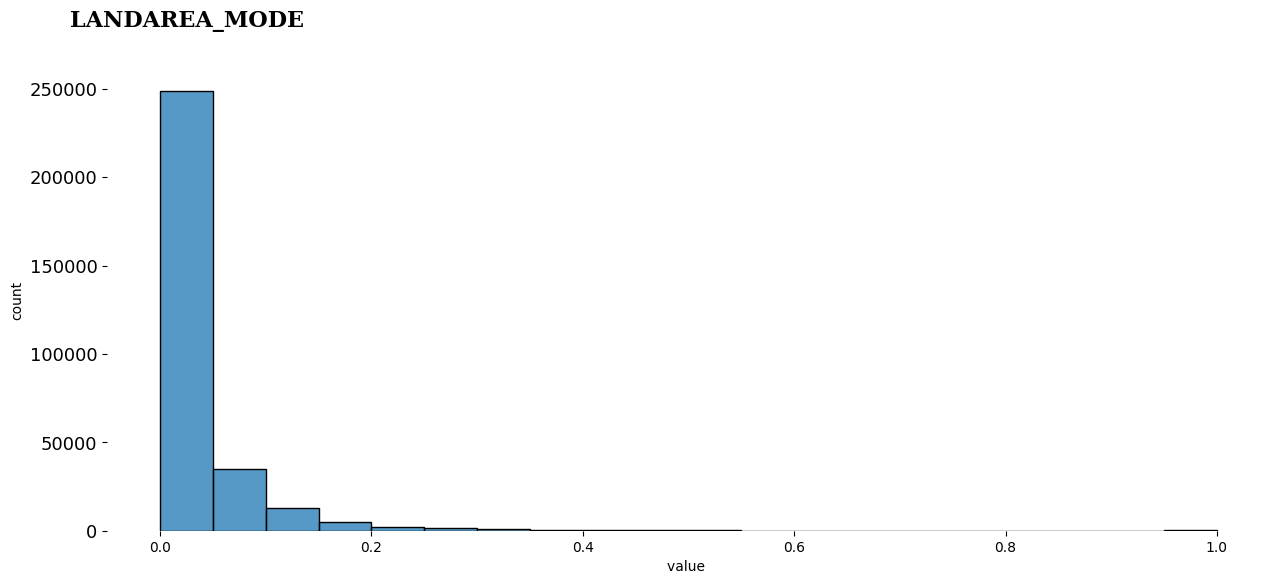

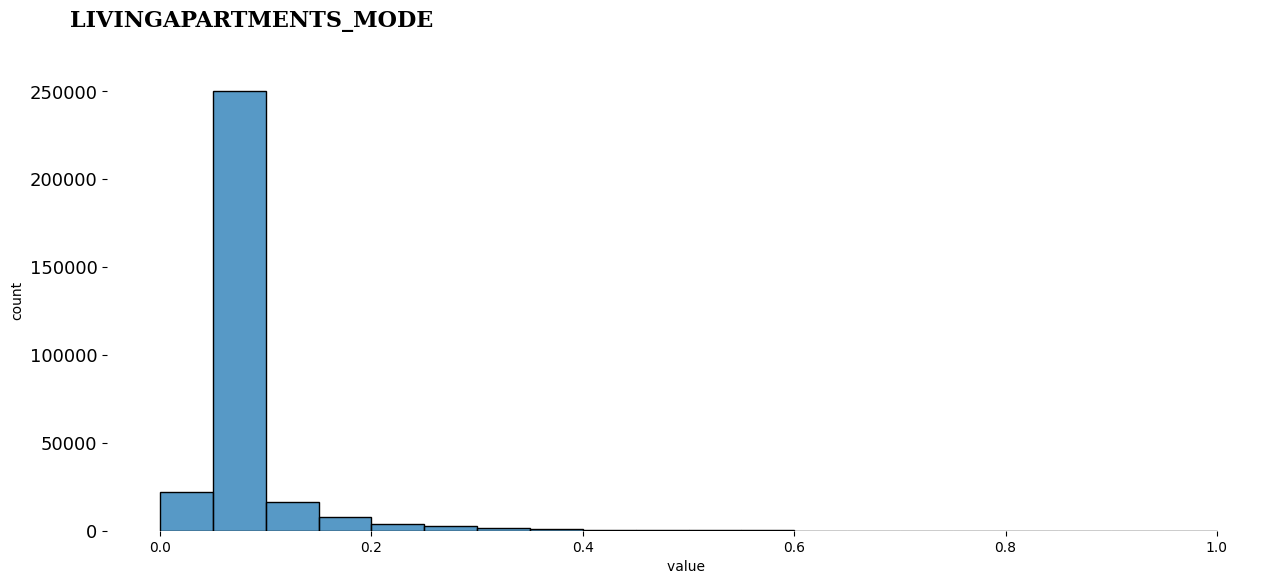

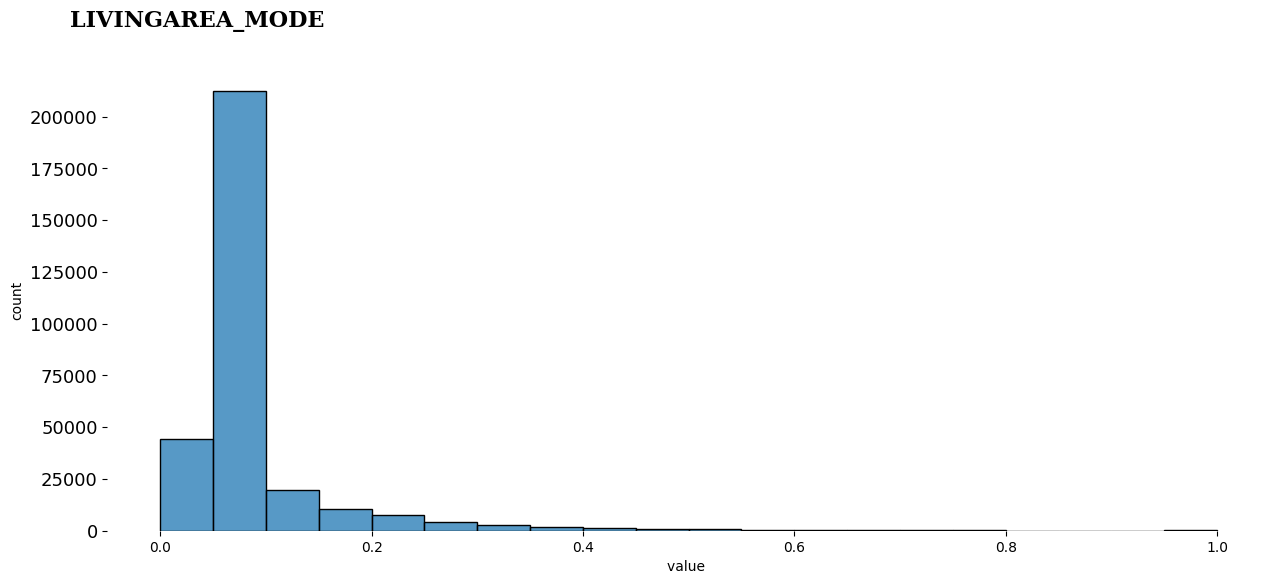

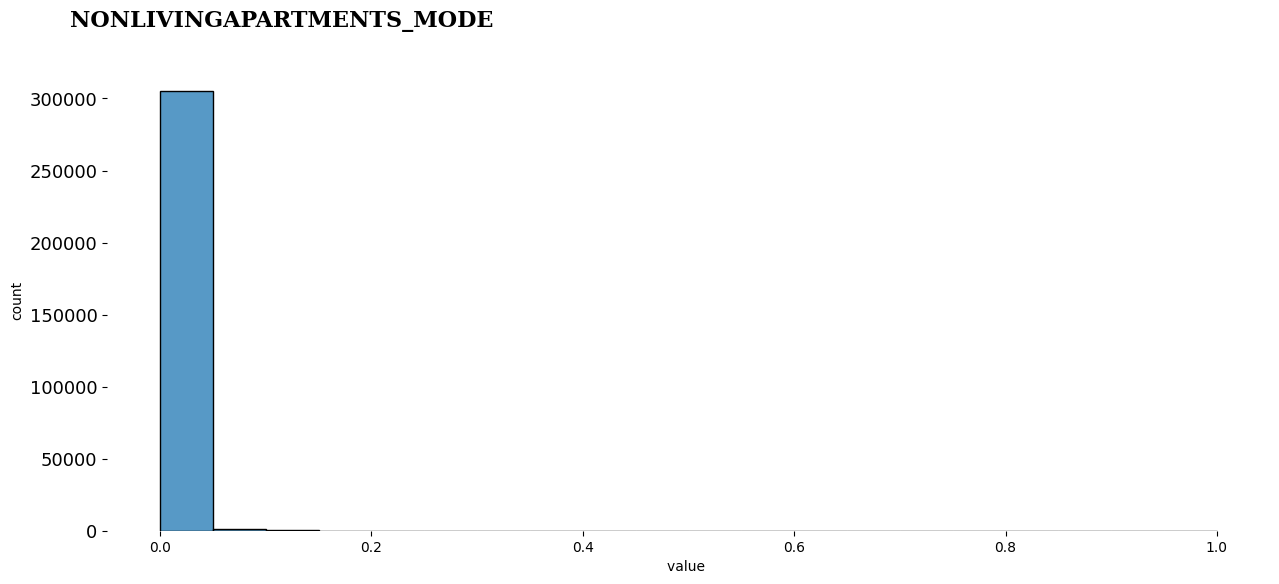

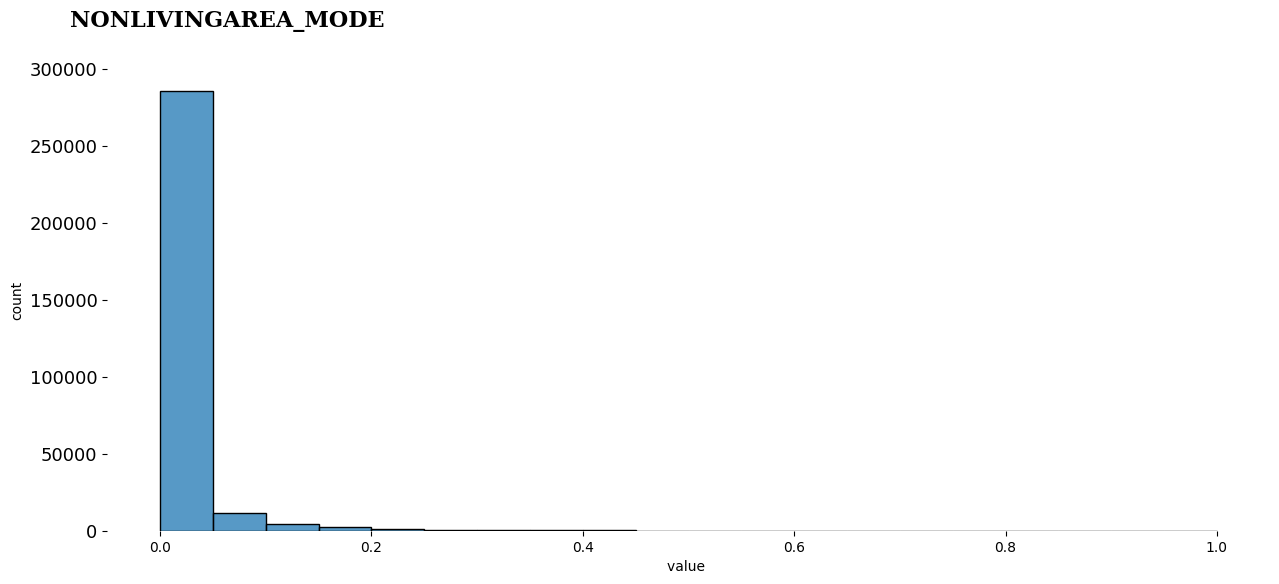

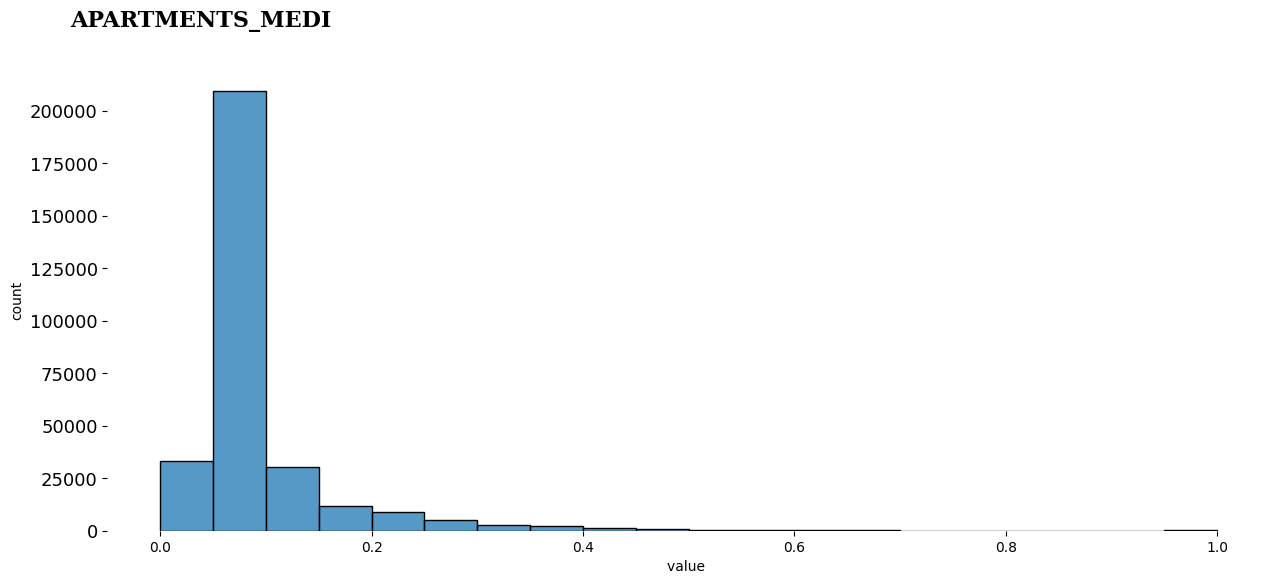

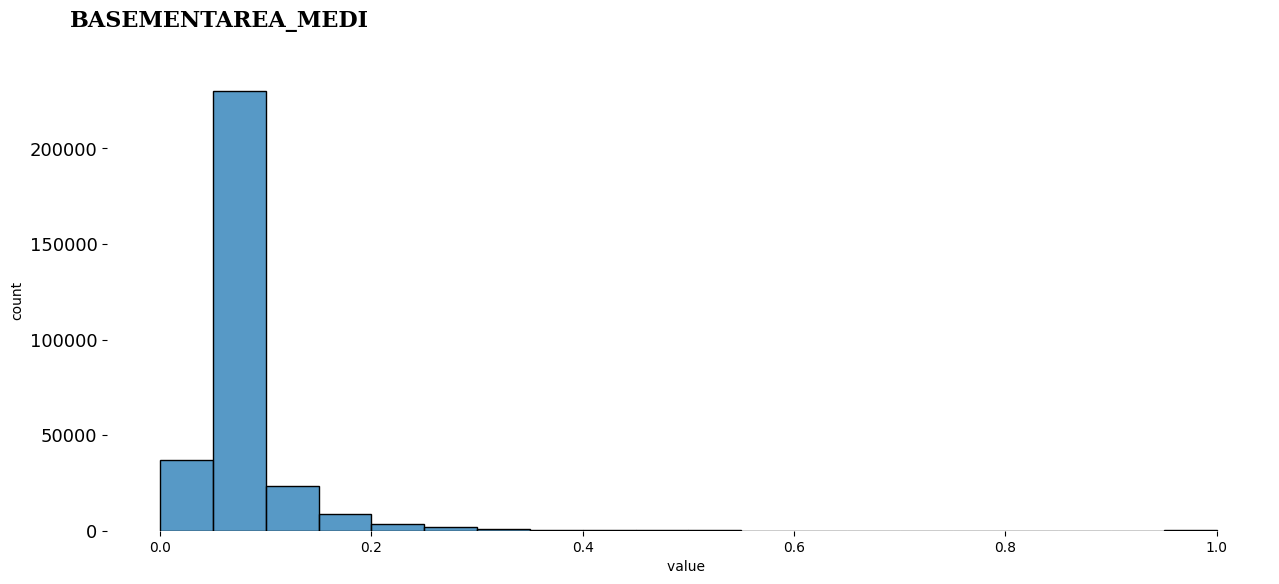

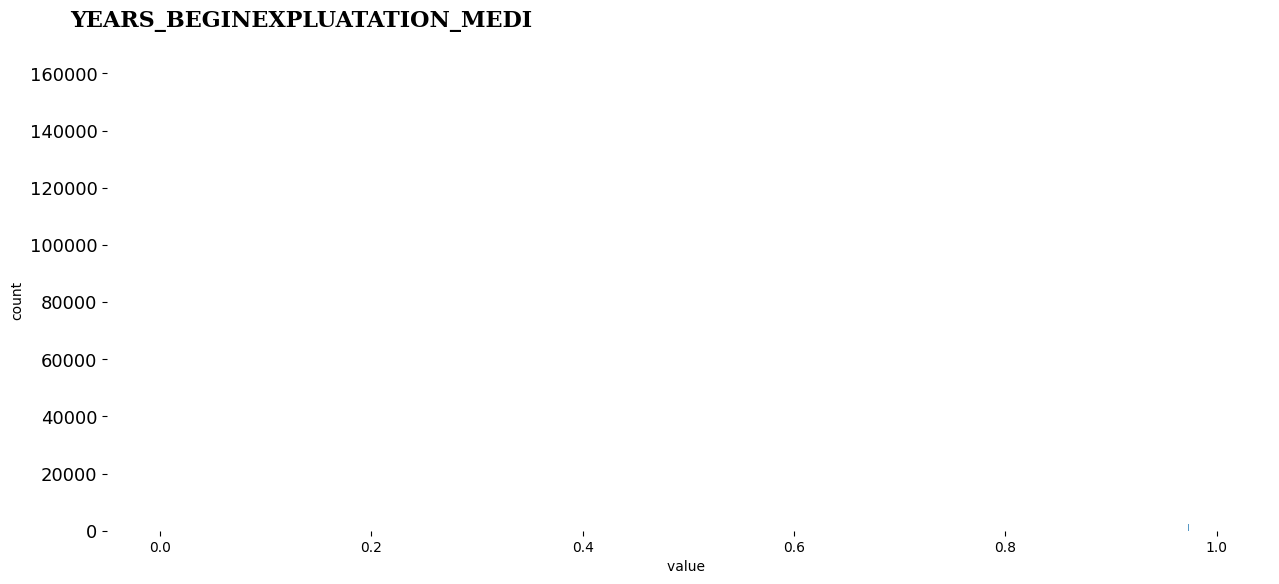

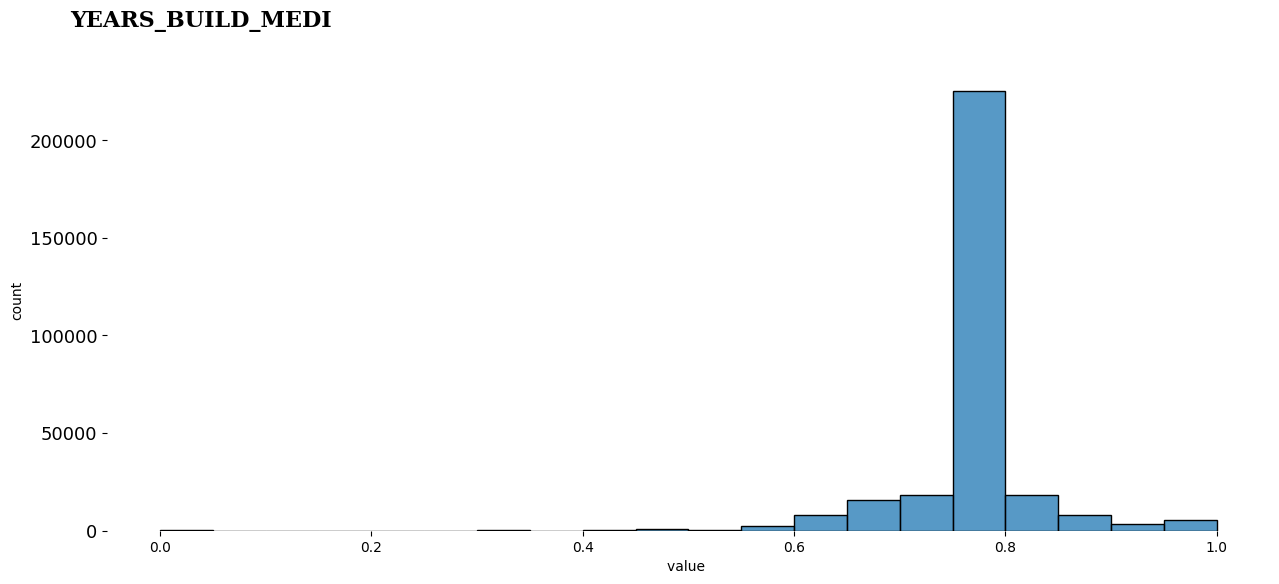

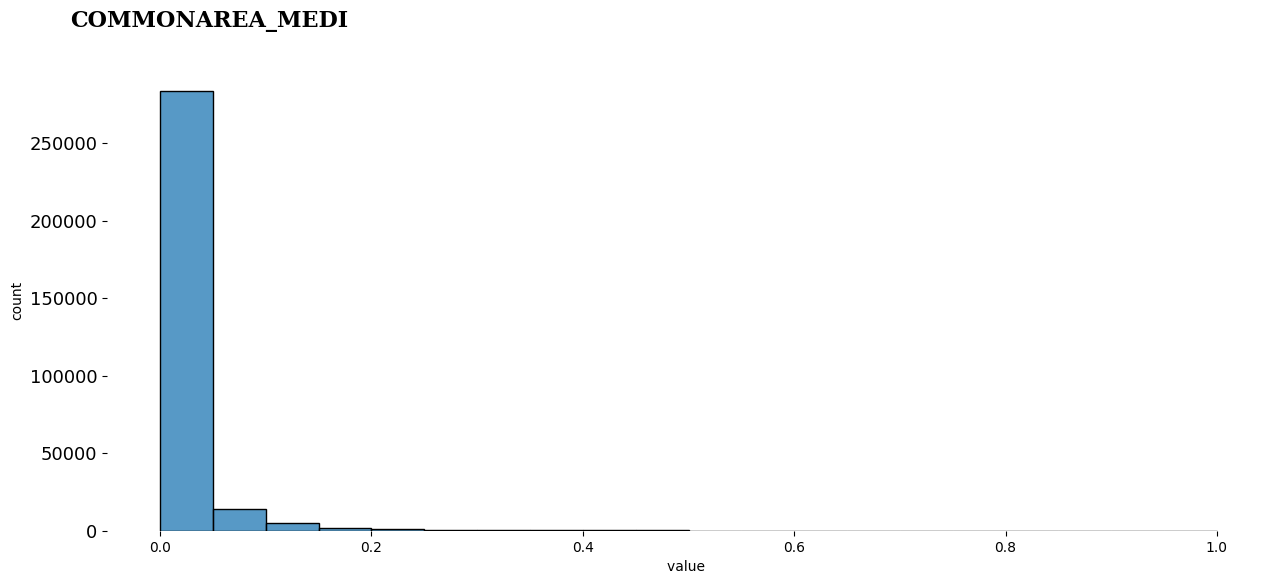

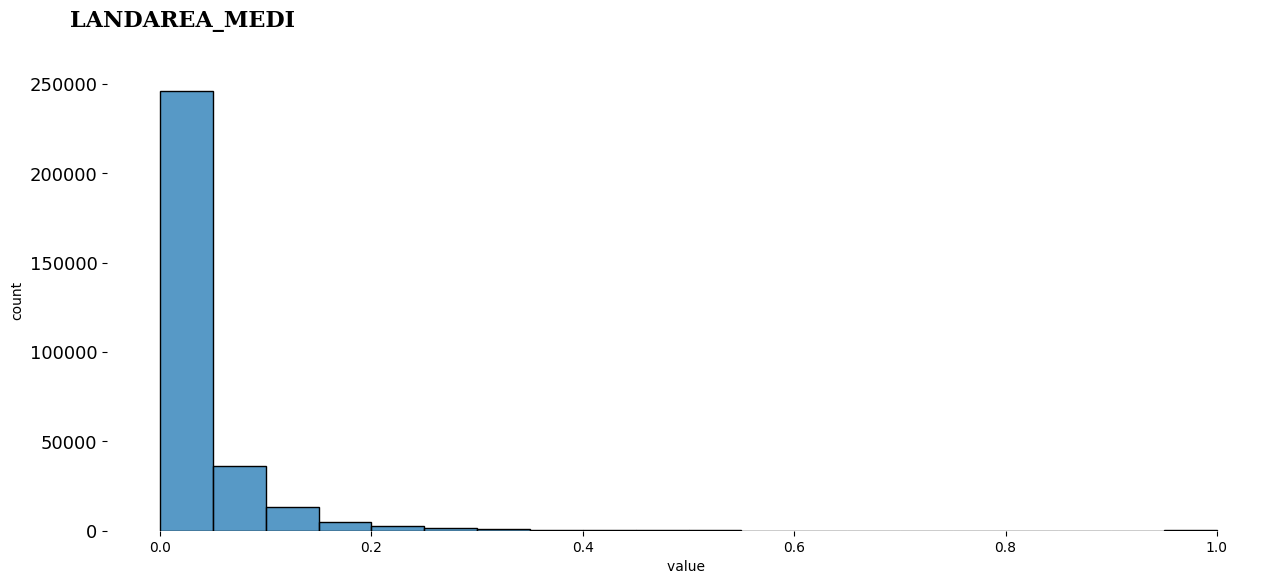

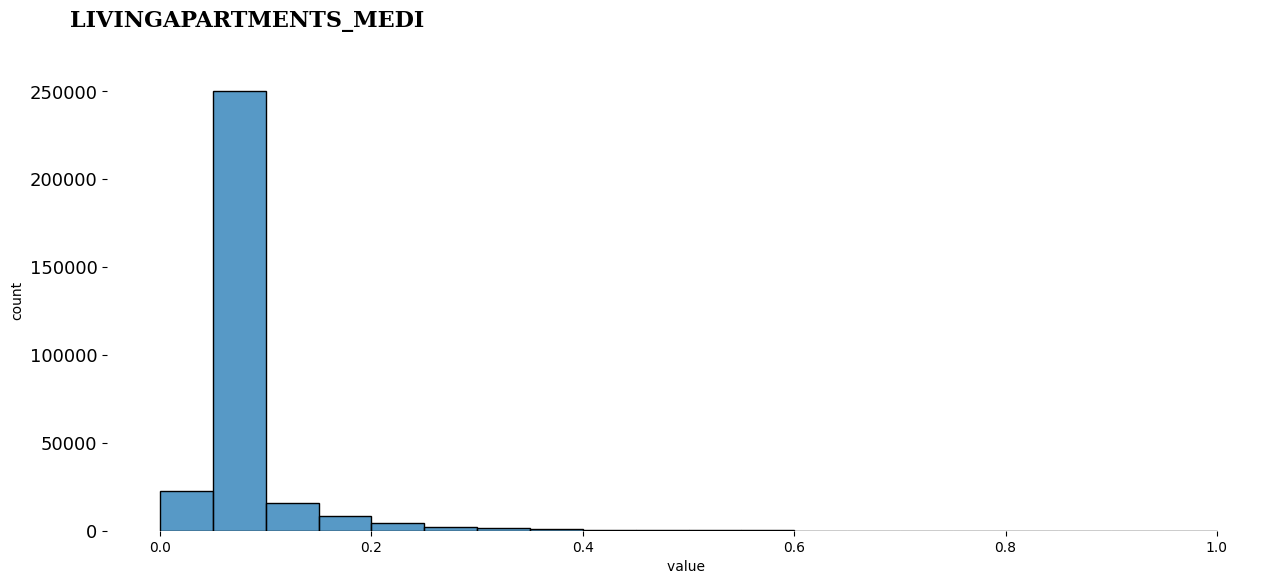

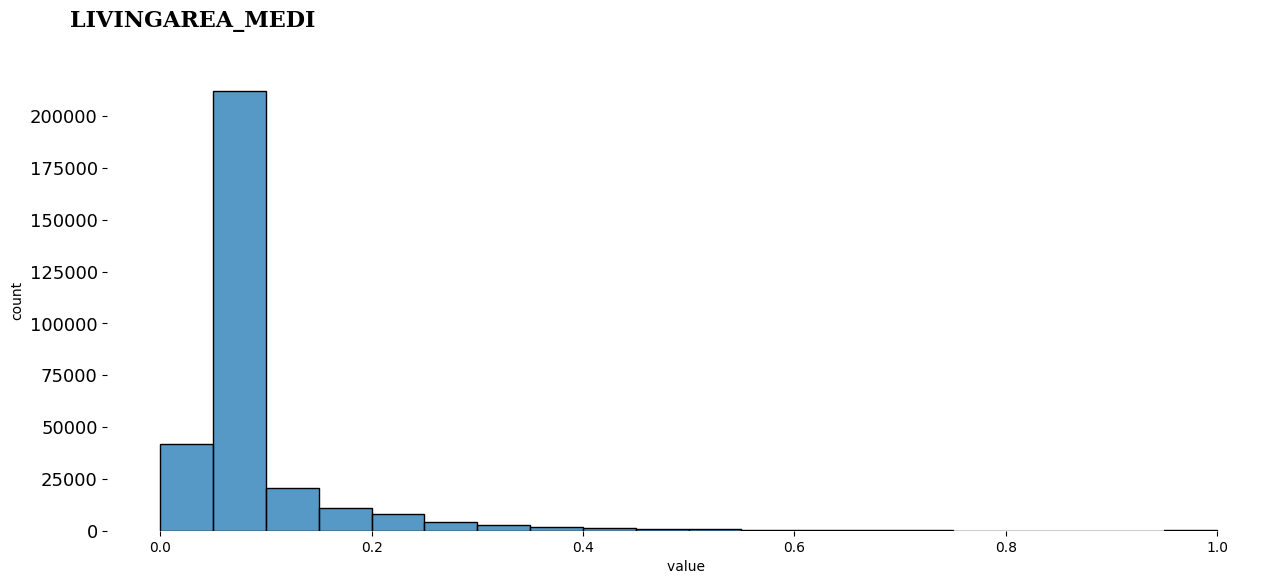

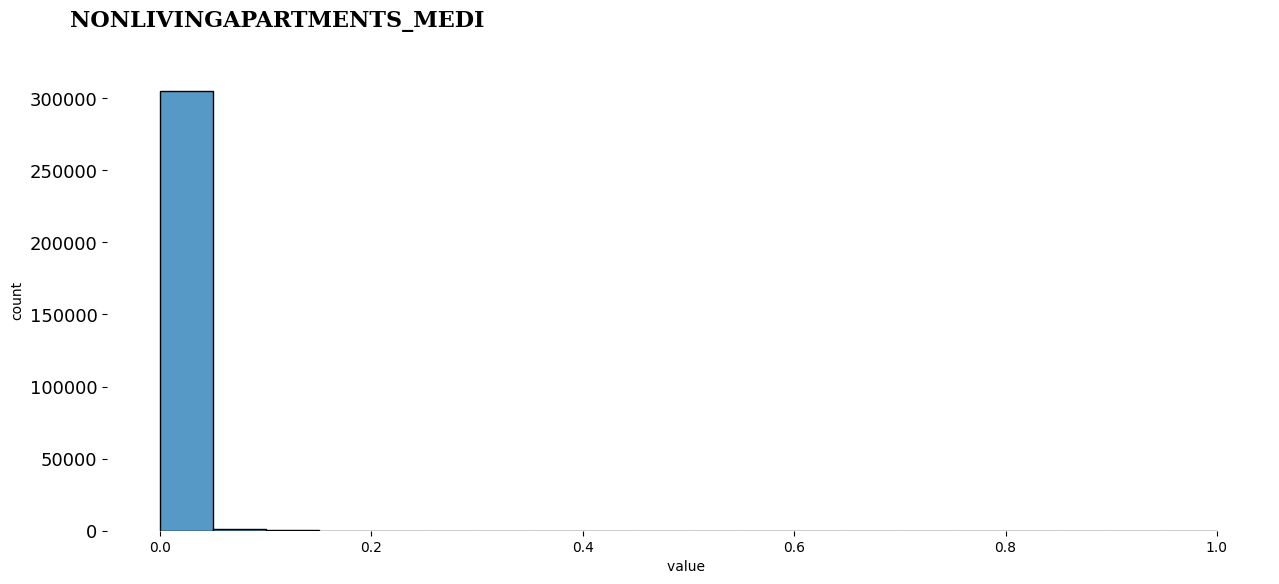

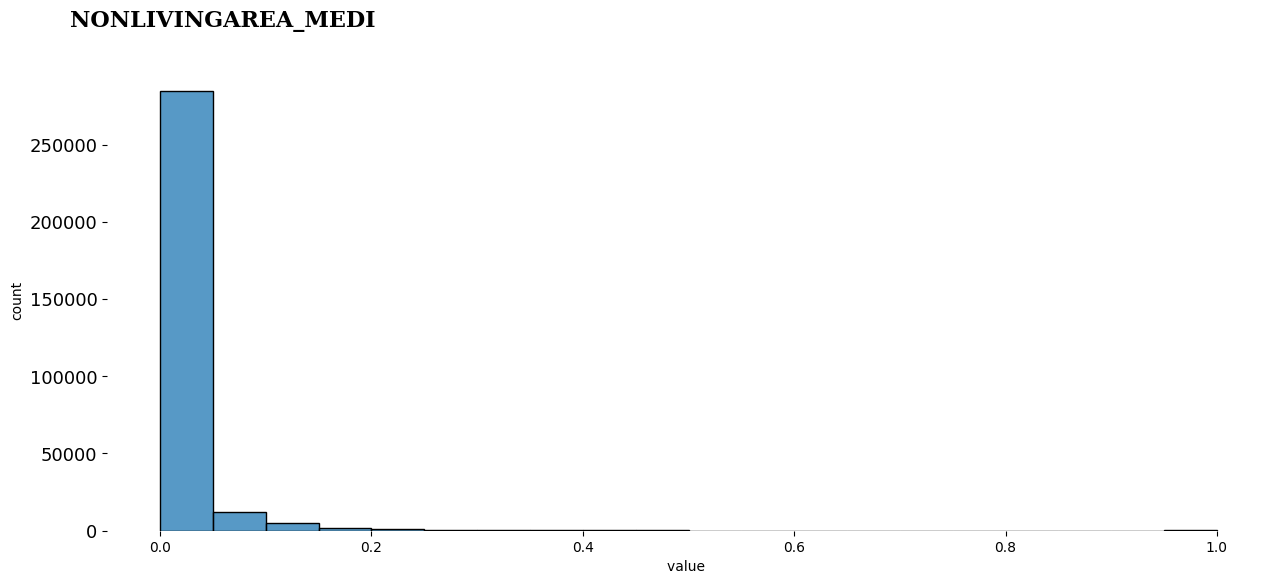

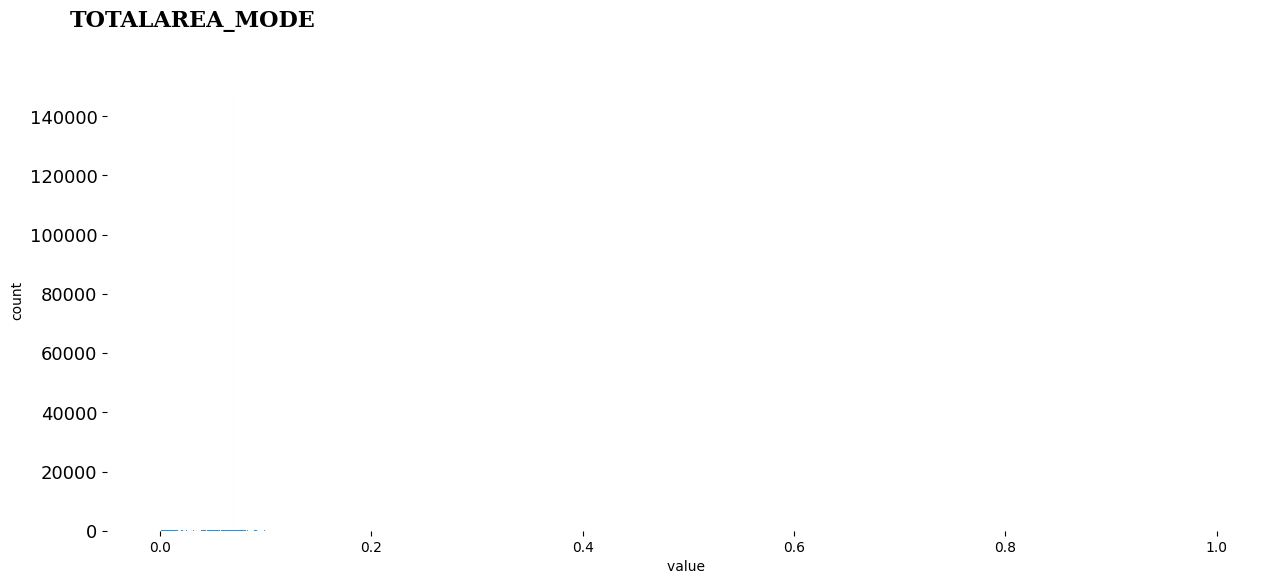

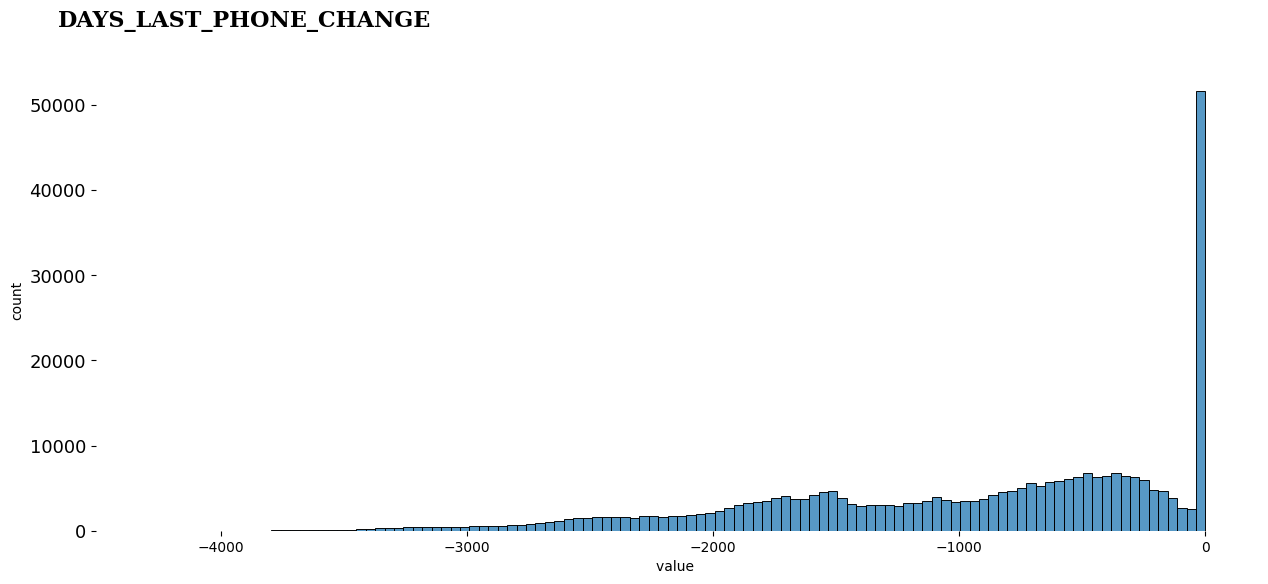

In [ ]:
print("Histograms of dataset")
for h in l2:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.histplot(app_train[h], palette='Blues_r')
  fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
  plt.xlabel('value ', fontsize=10)
  plt.ylabel('count',fontsize=10)
  plt.yticks(fontsize=13)
  plt.box(False)


/tmp/ipykernel_670/3581965203.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1, figsize=(15, 6))


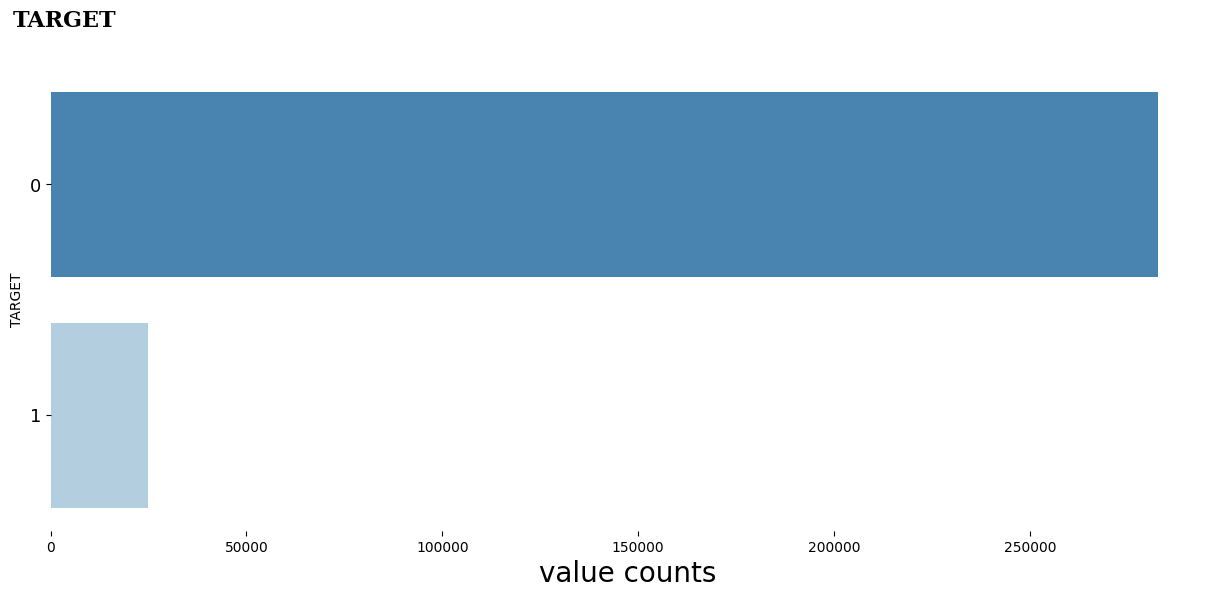

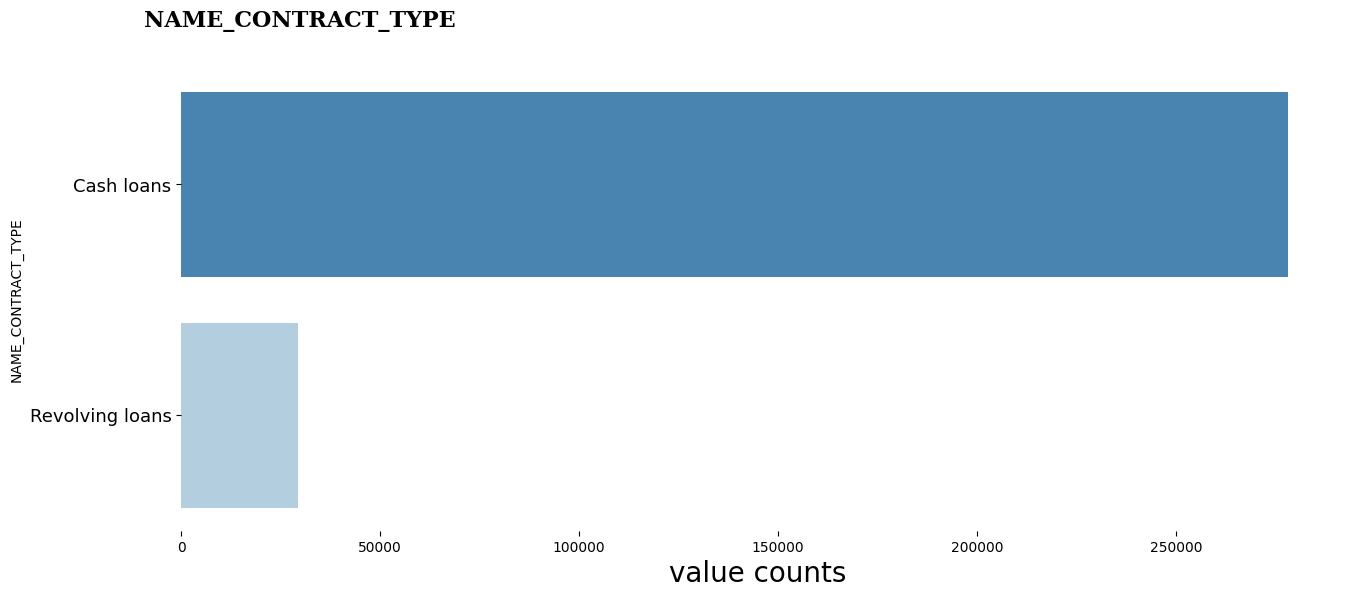

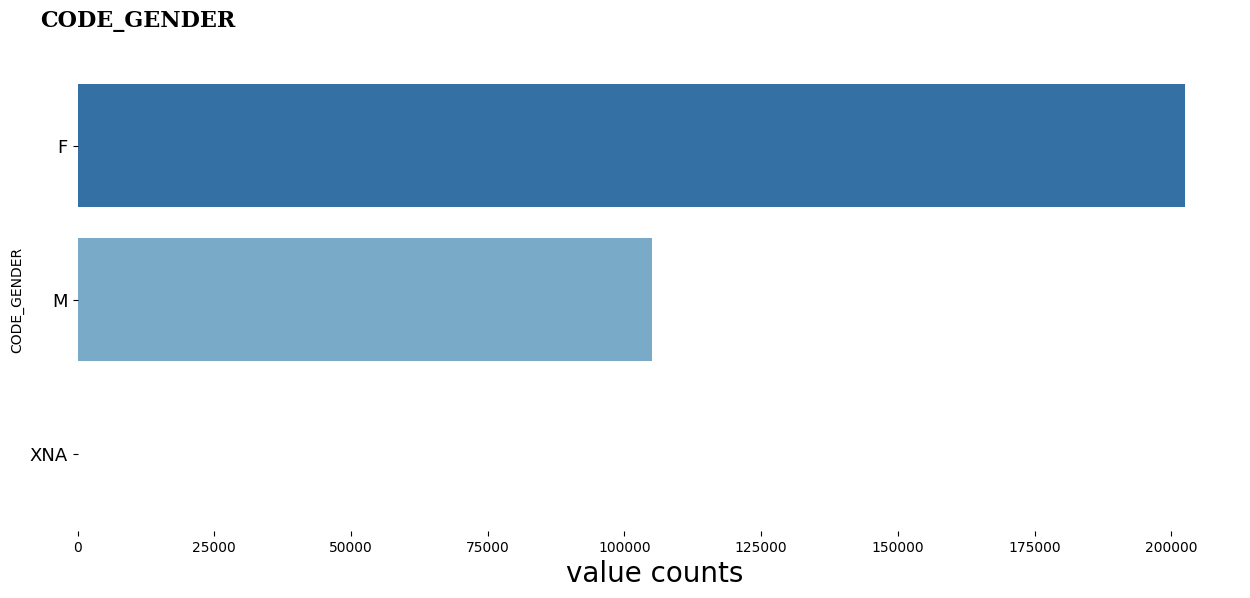

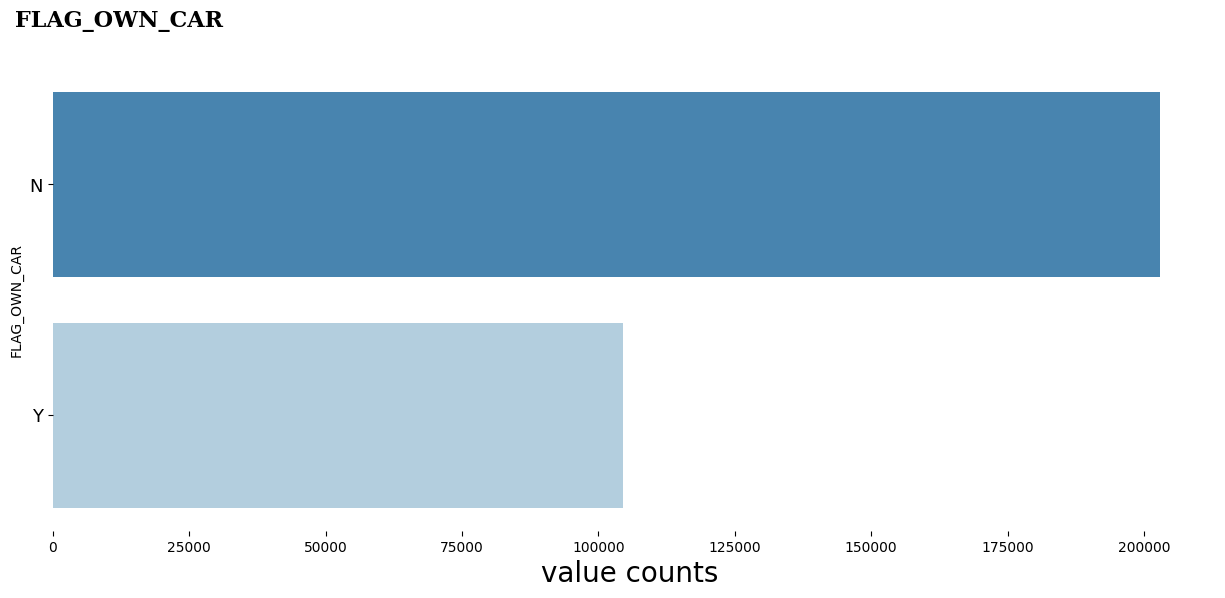

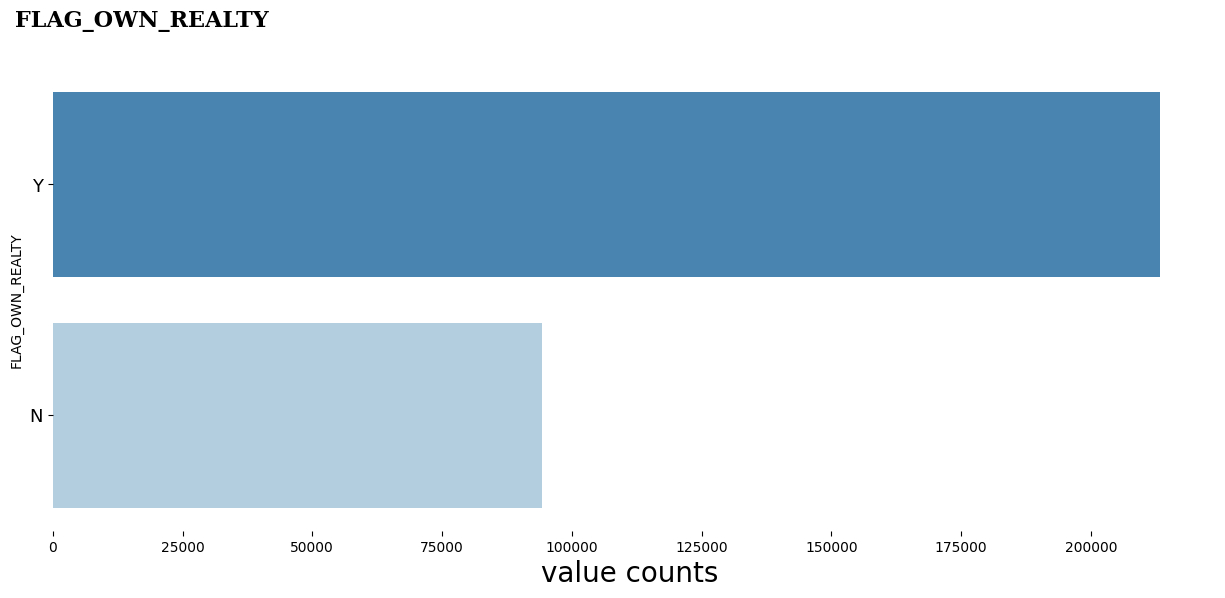

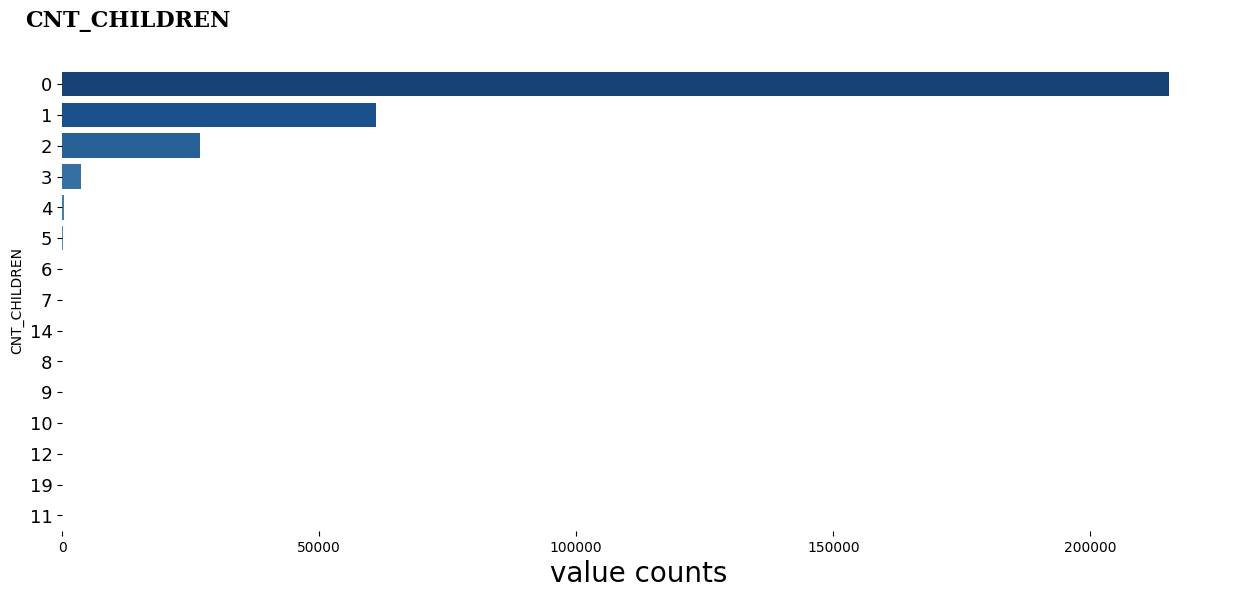

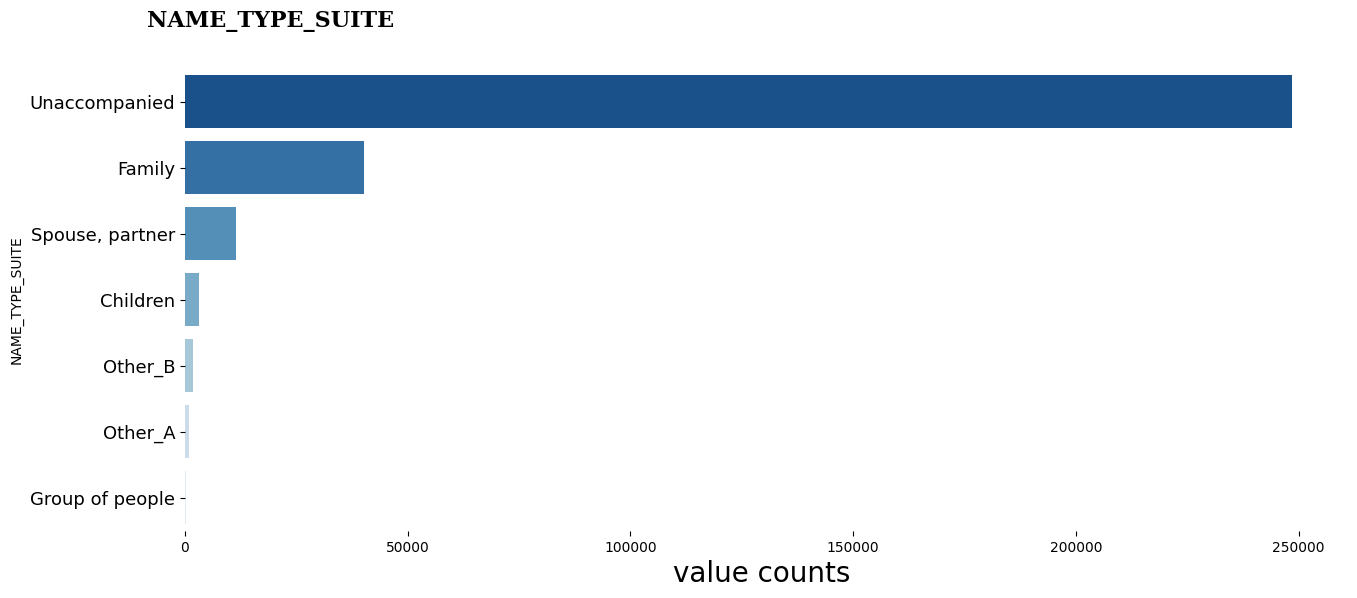

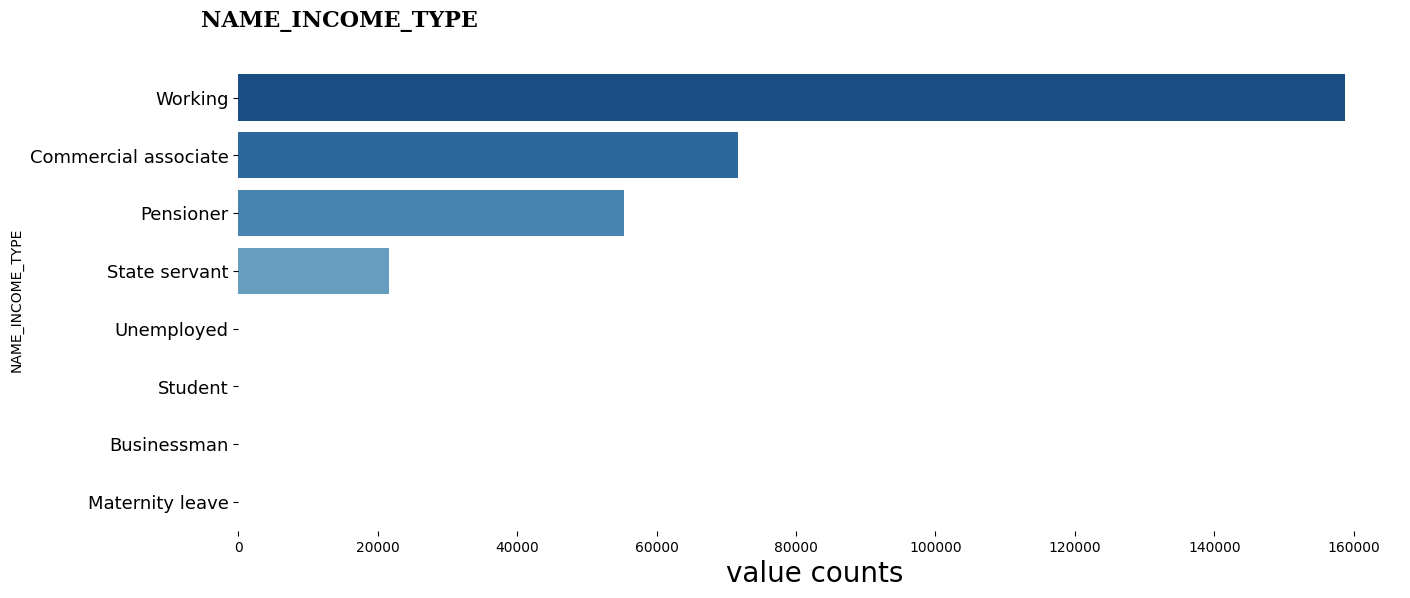

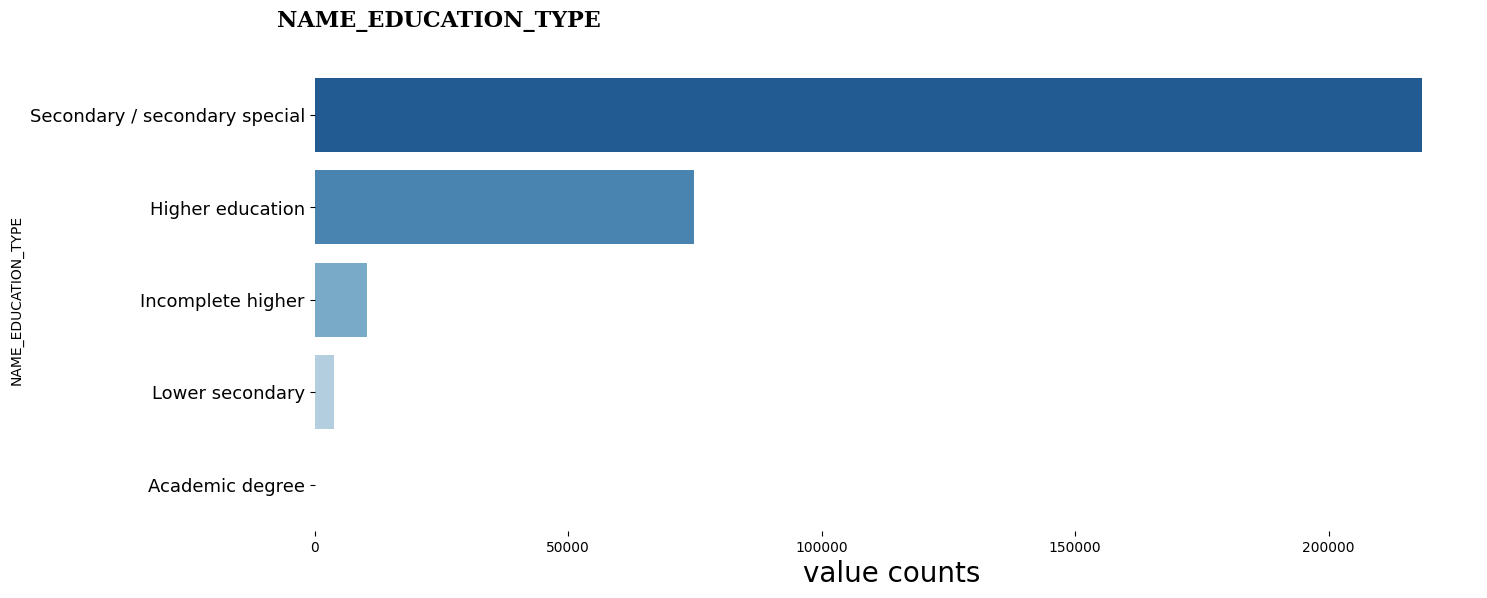

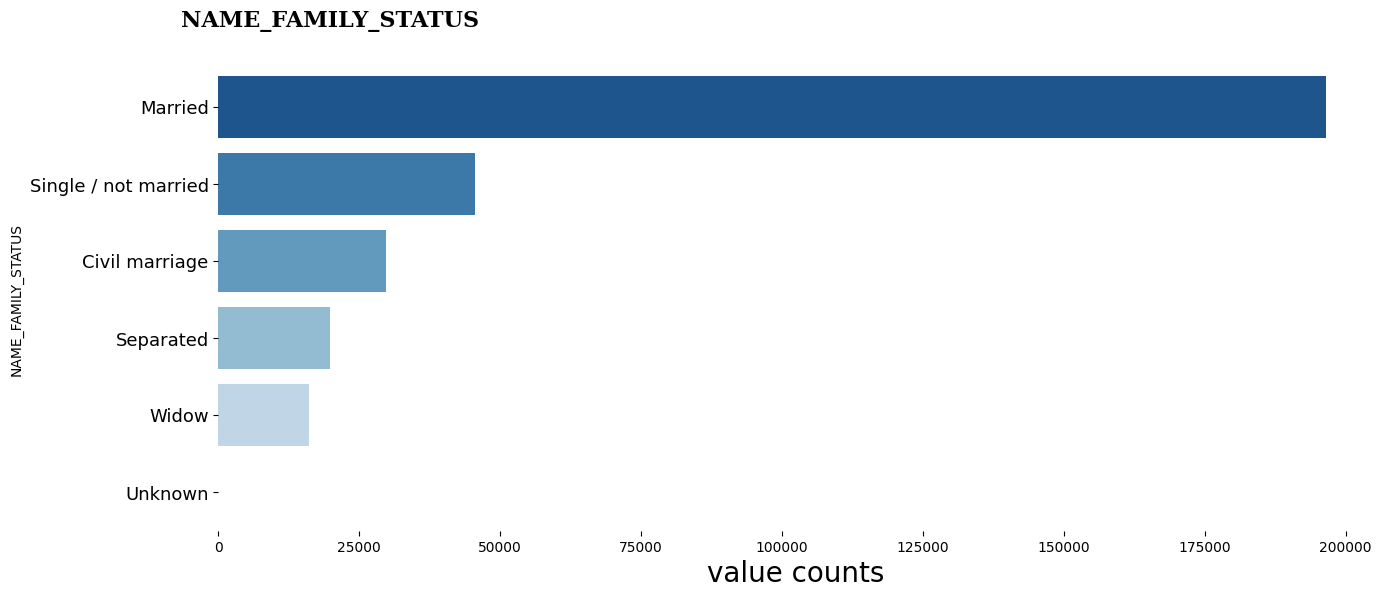

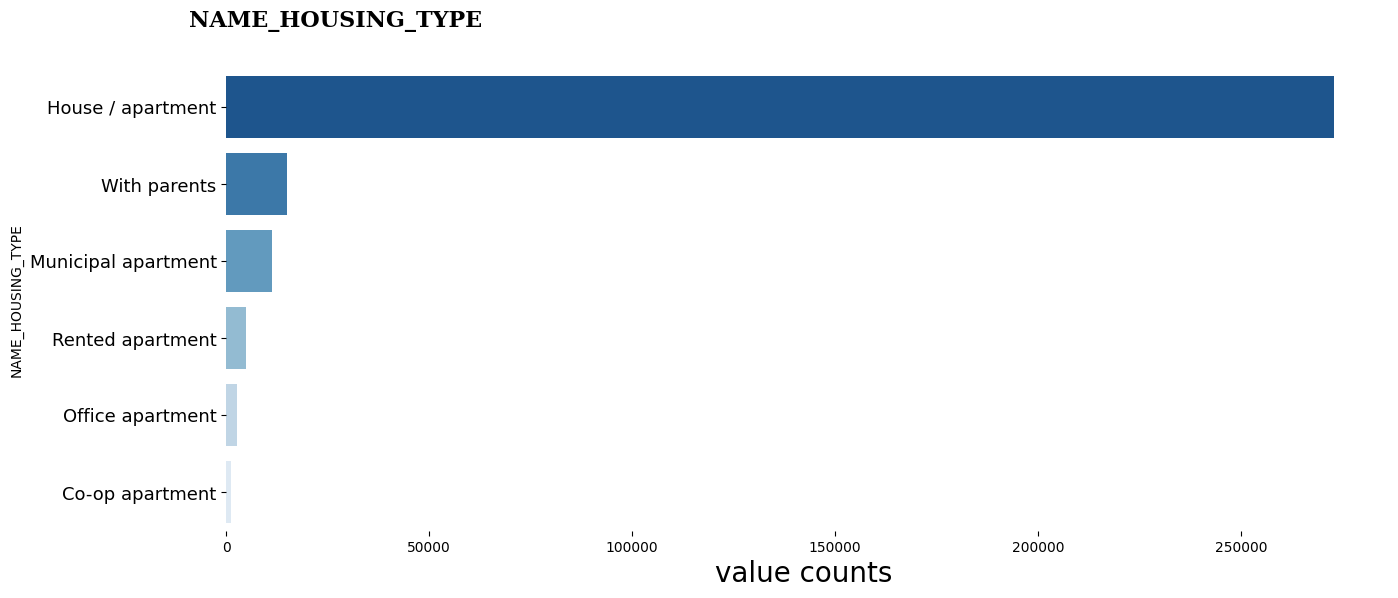

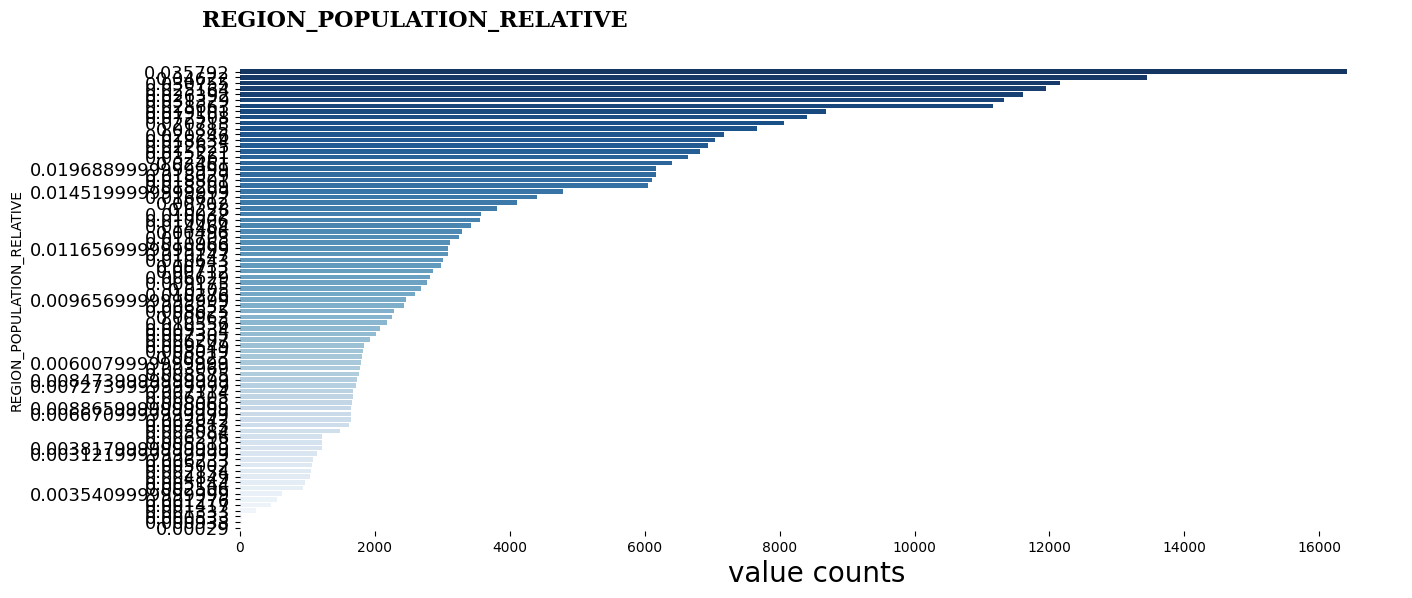

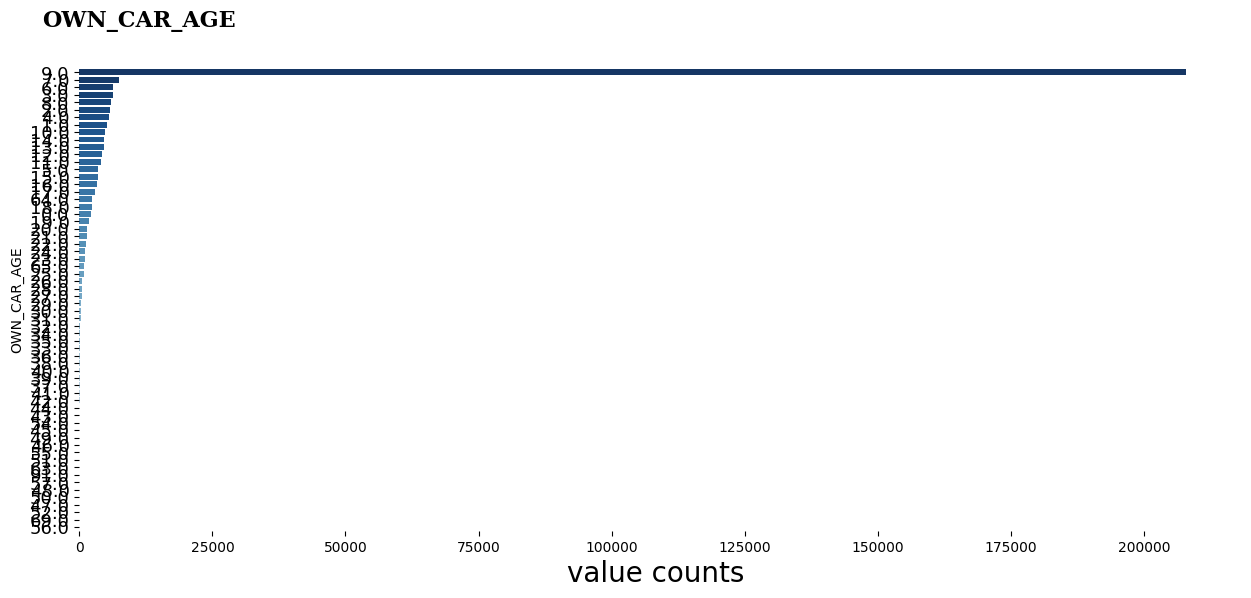

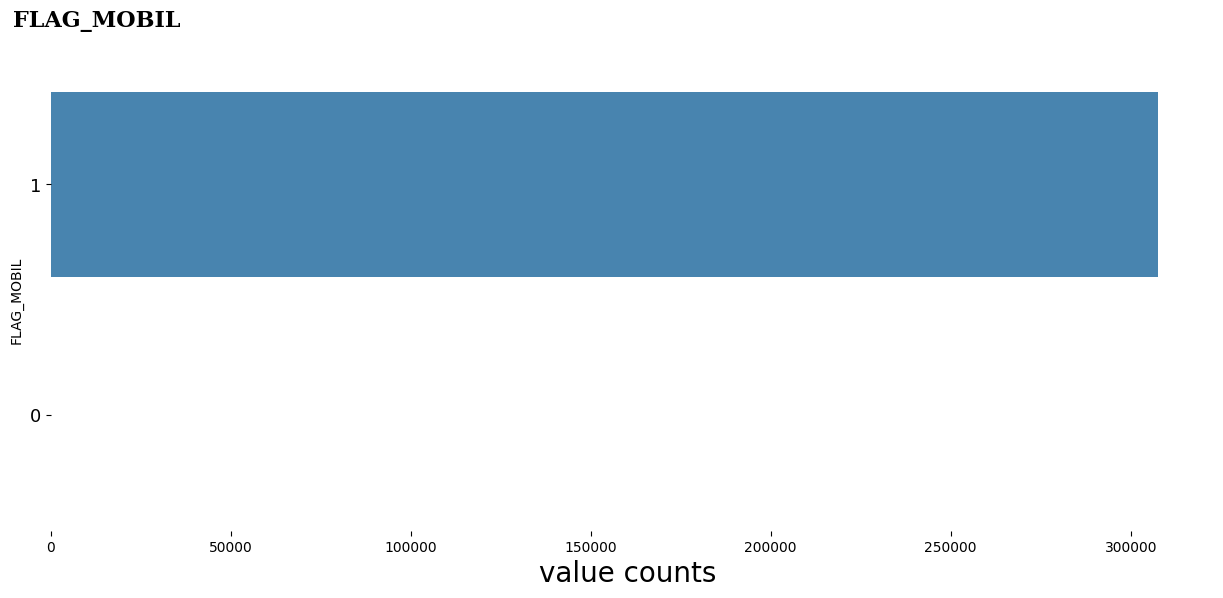

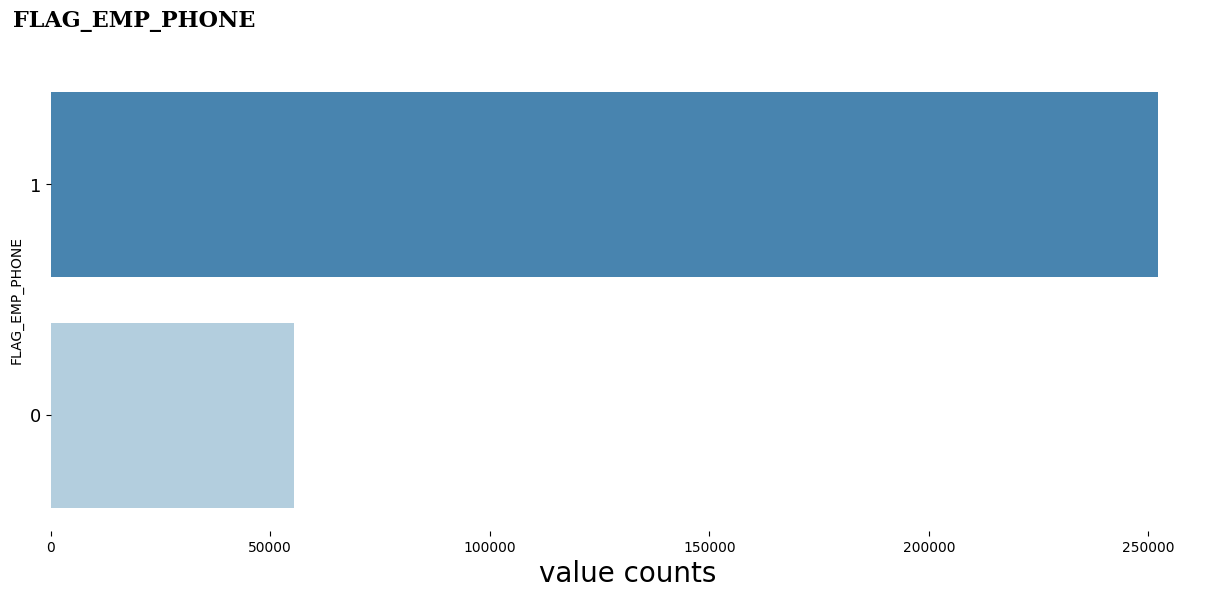

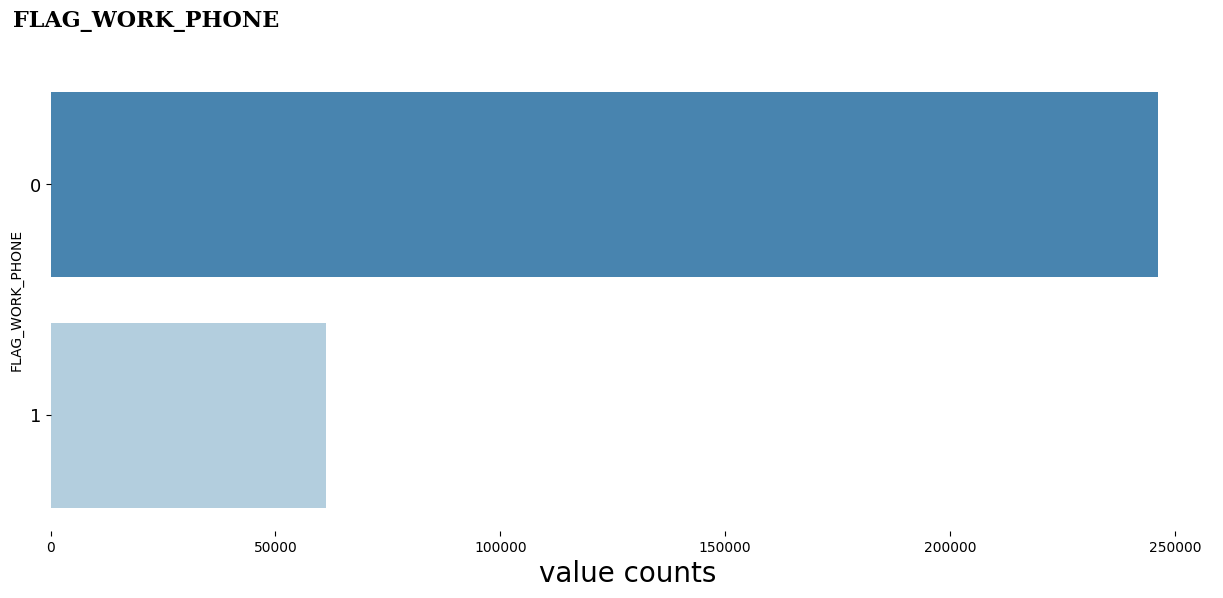

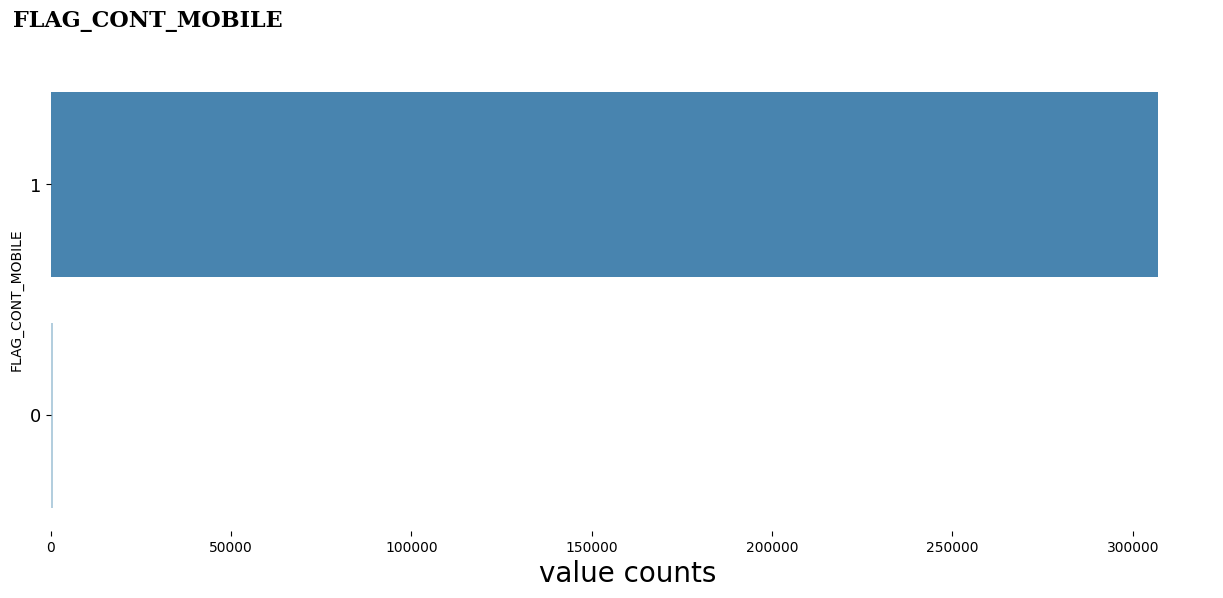

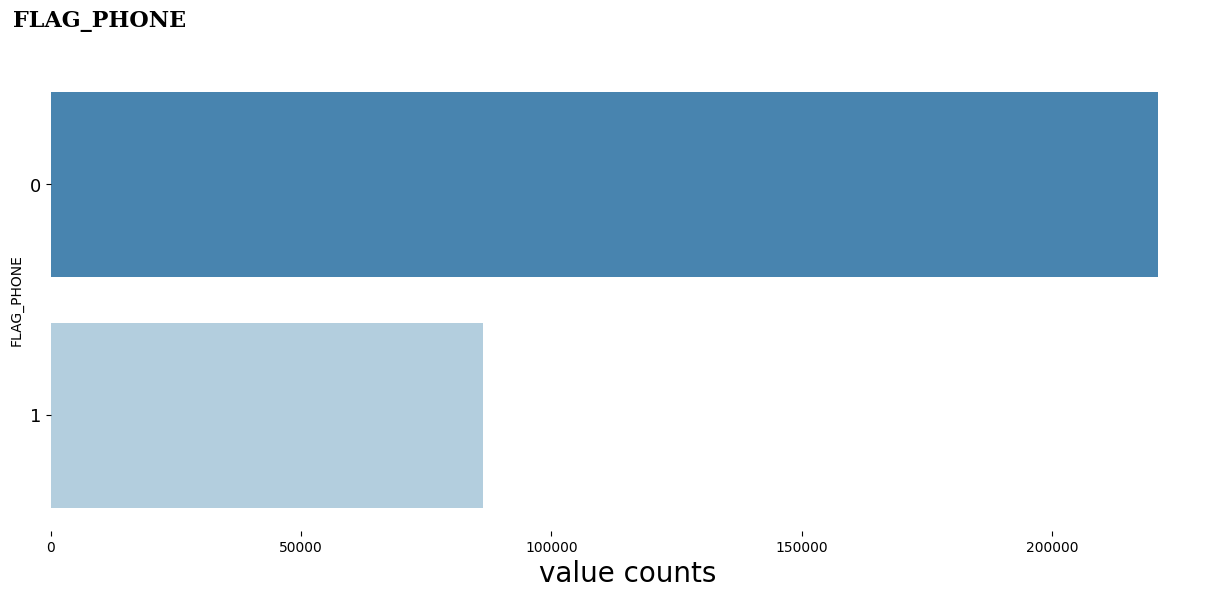

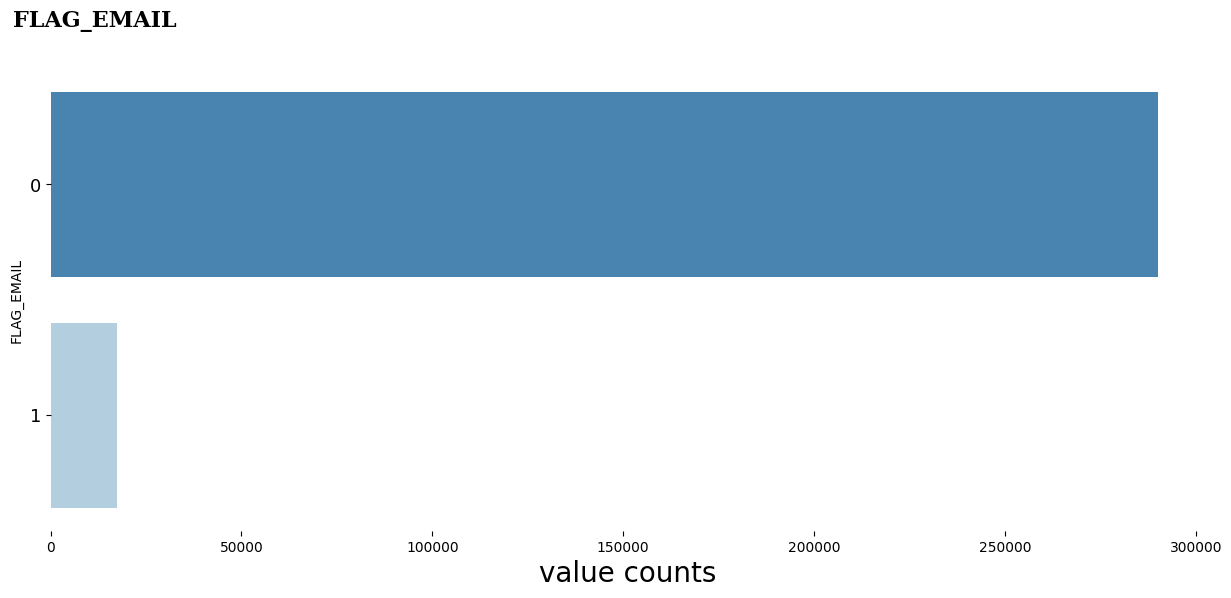

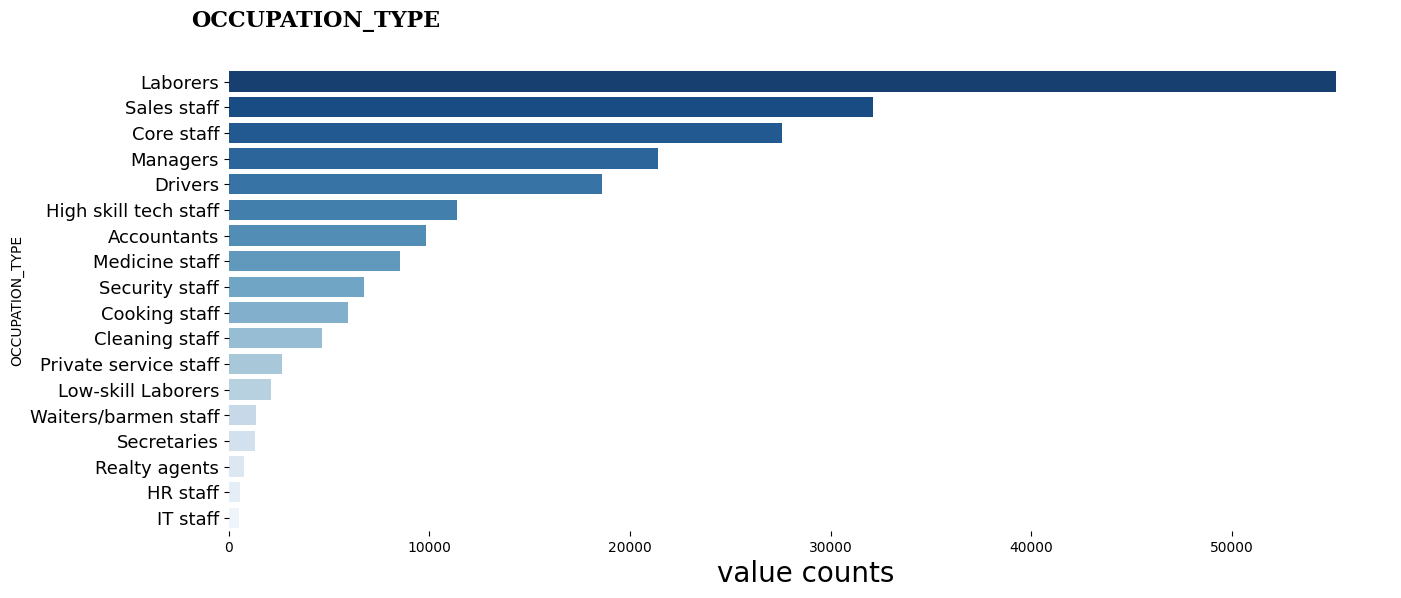

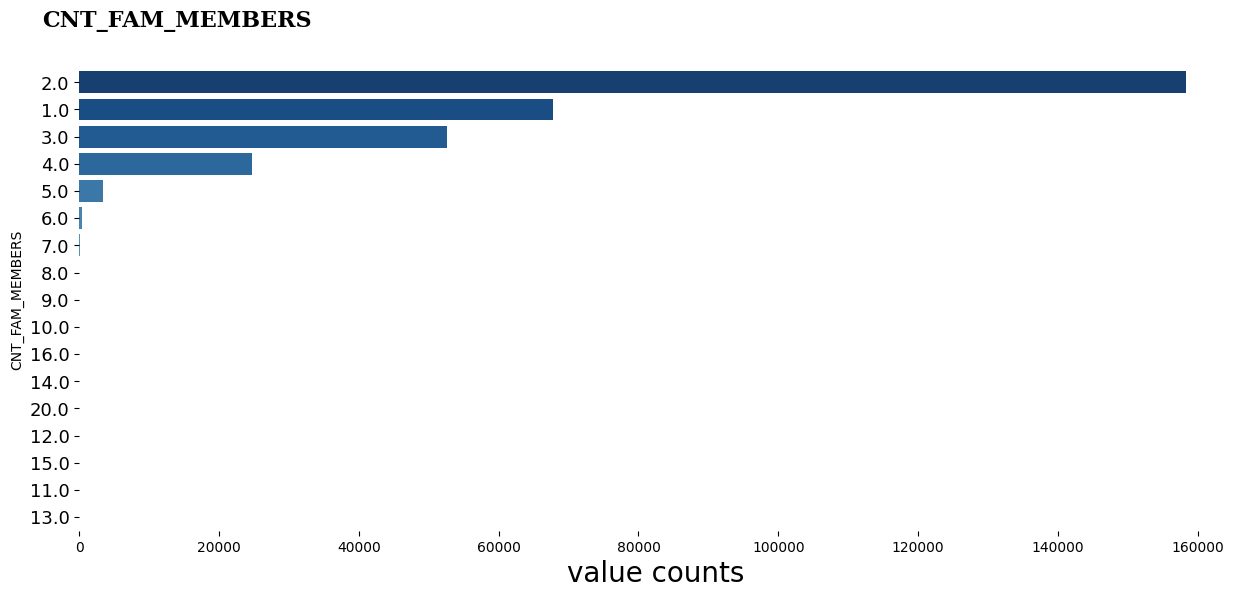

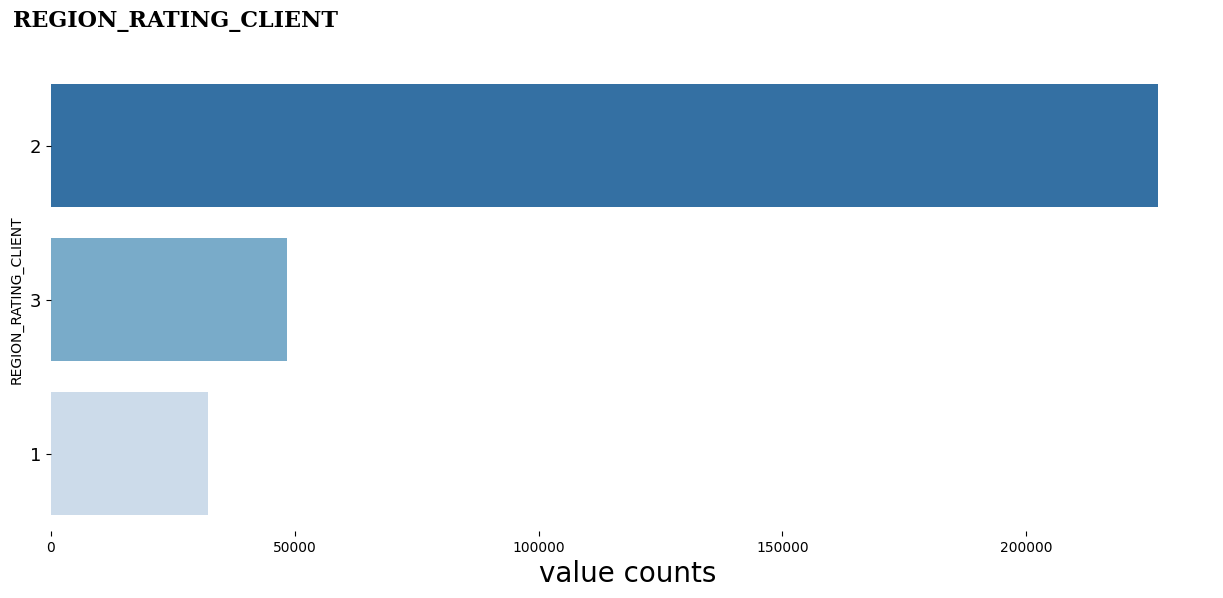

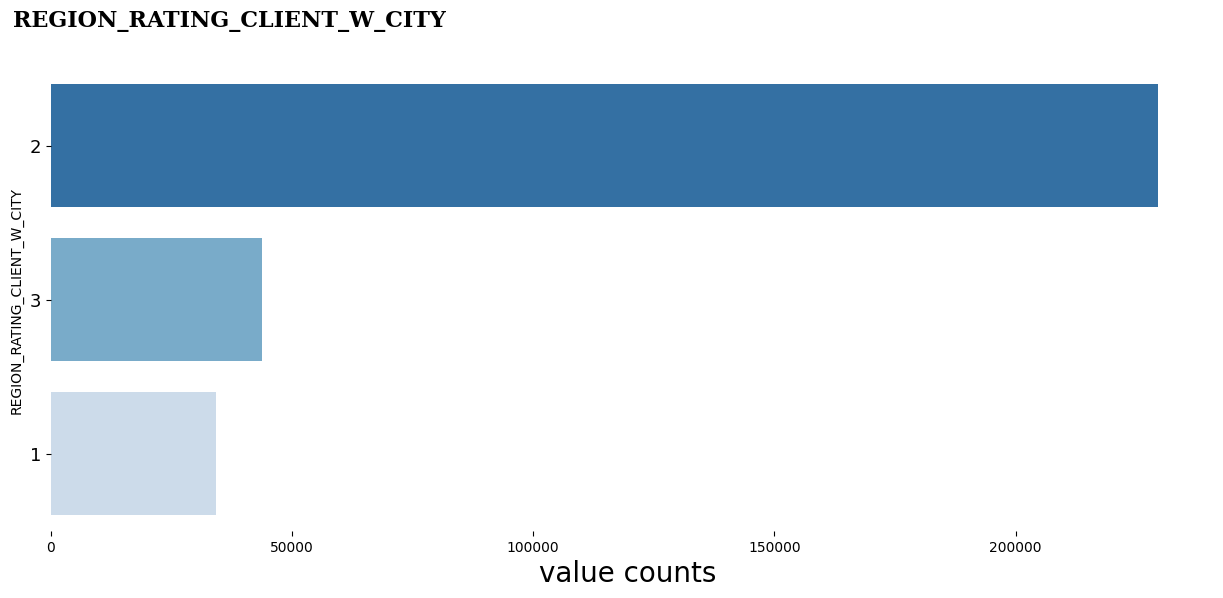

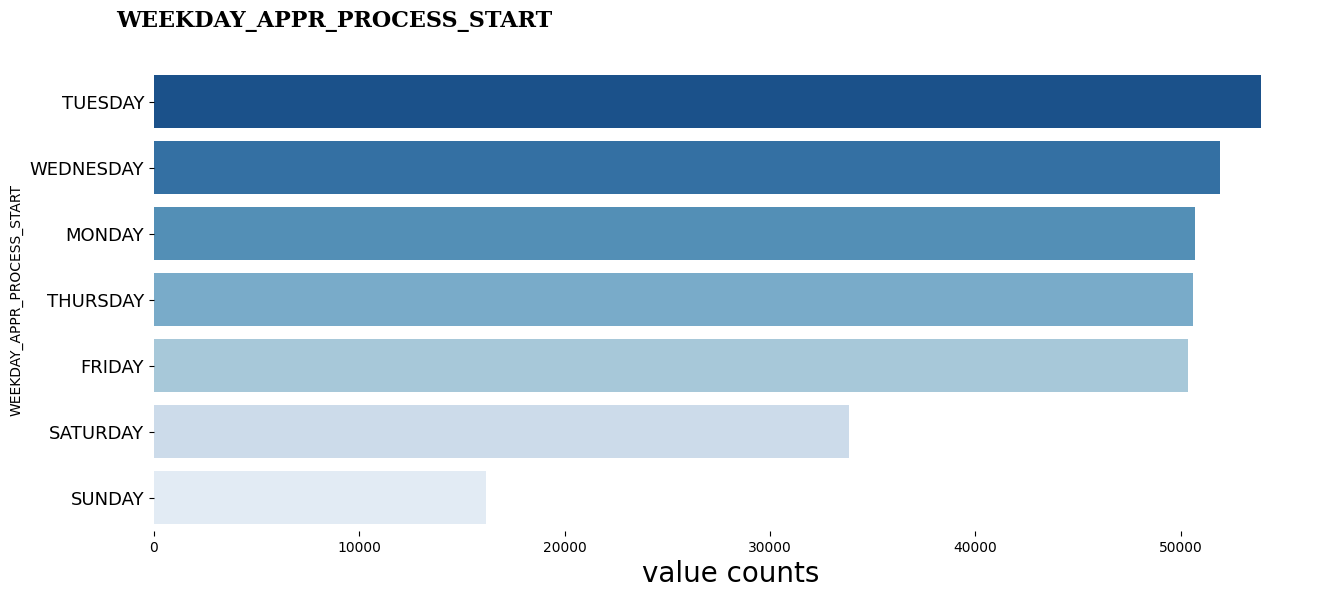

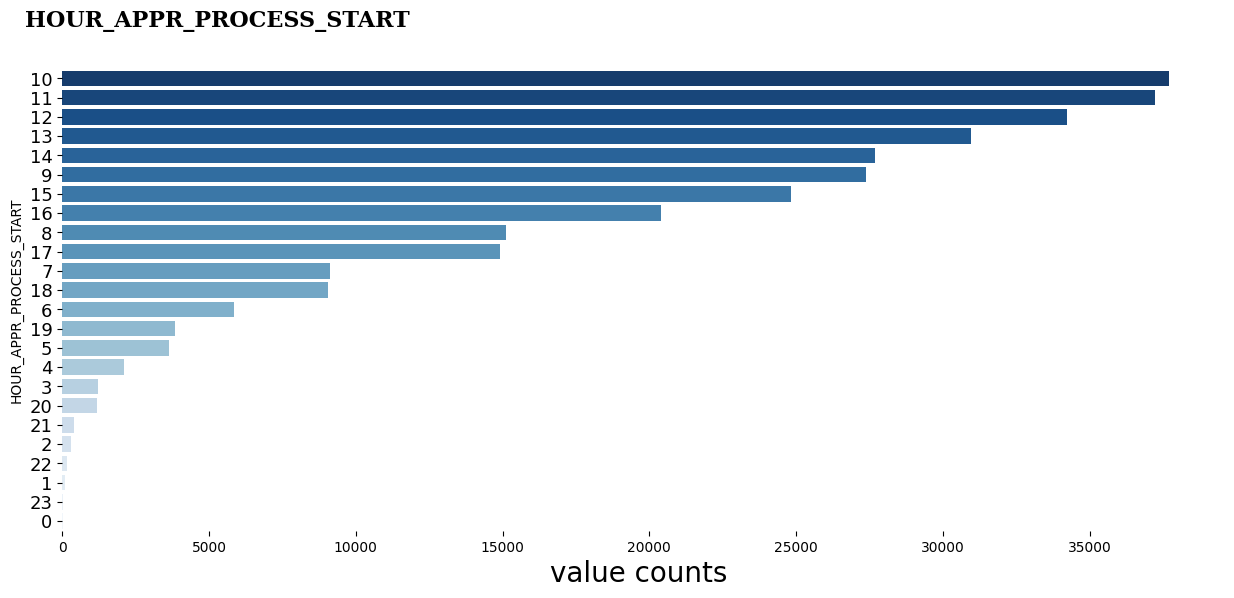

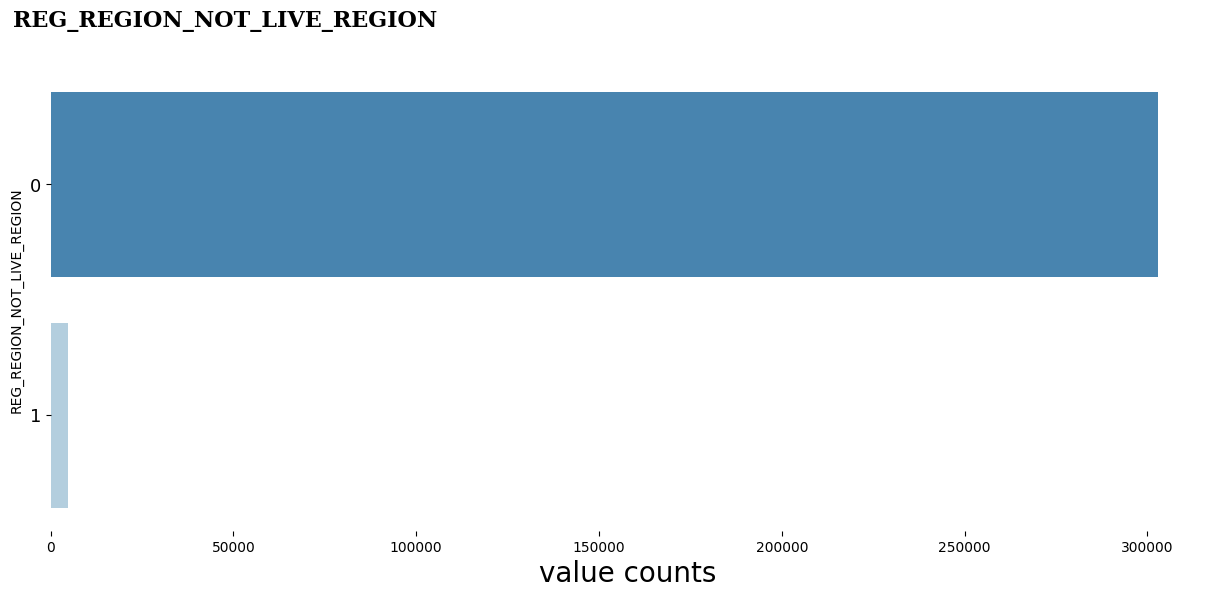

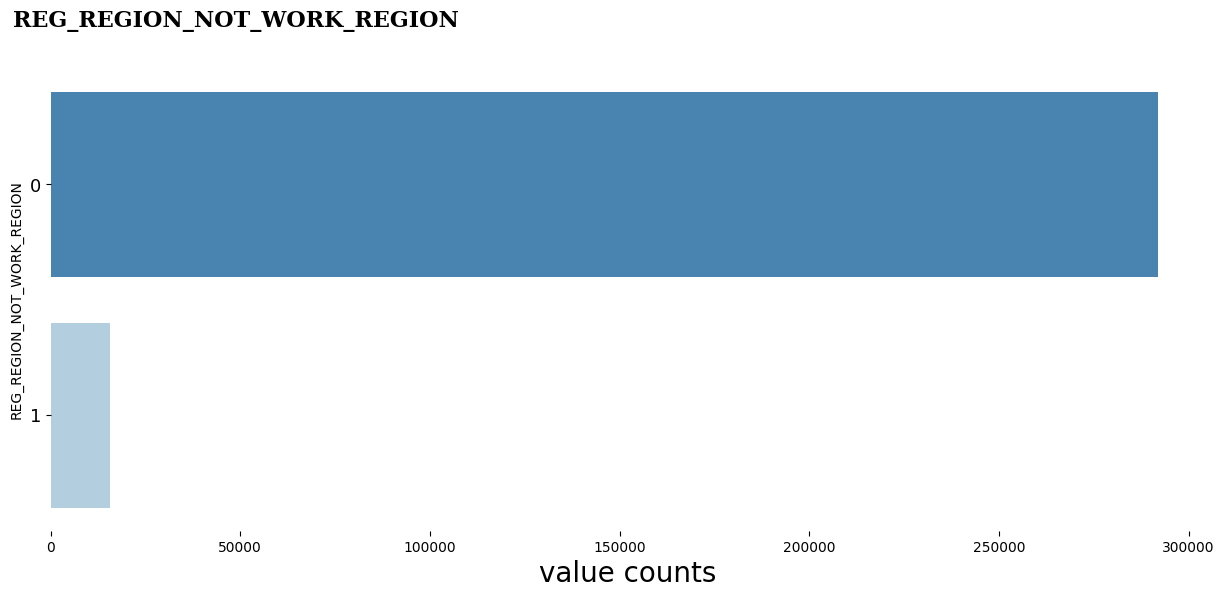

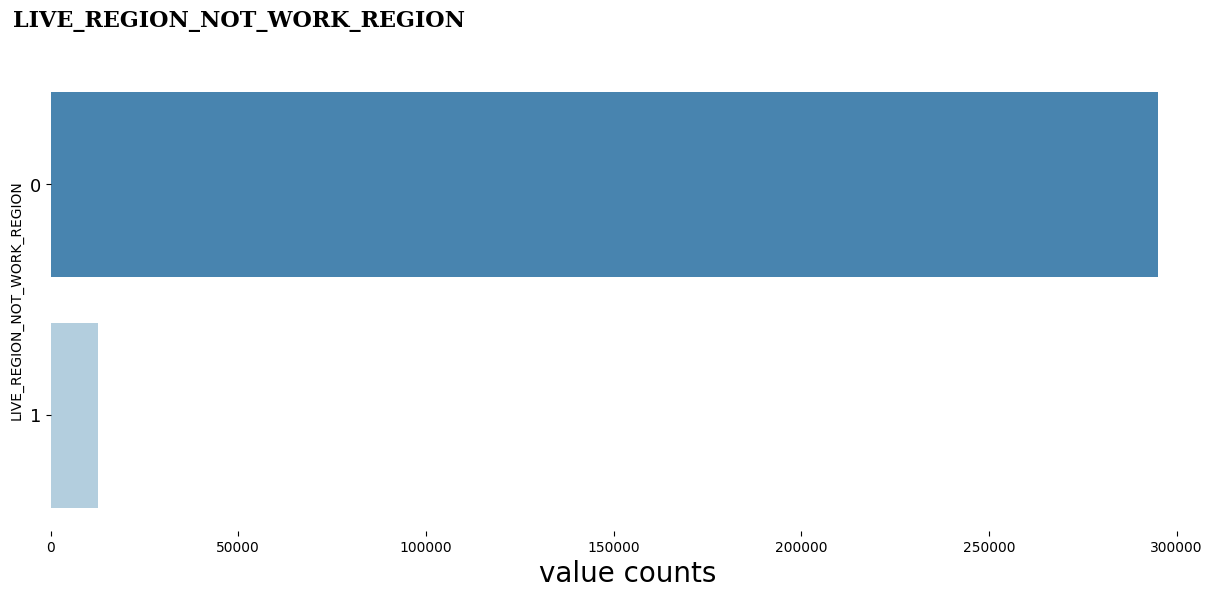

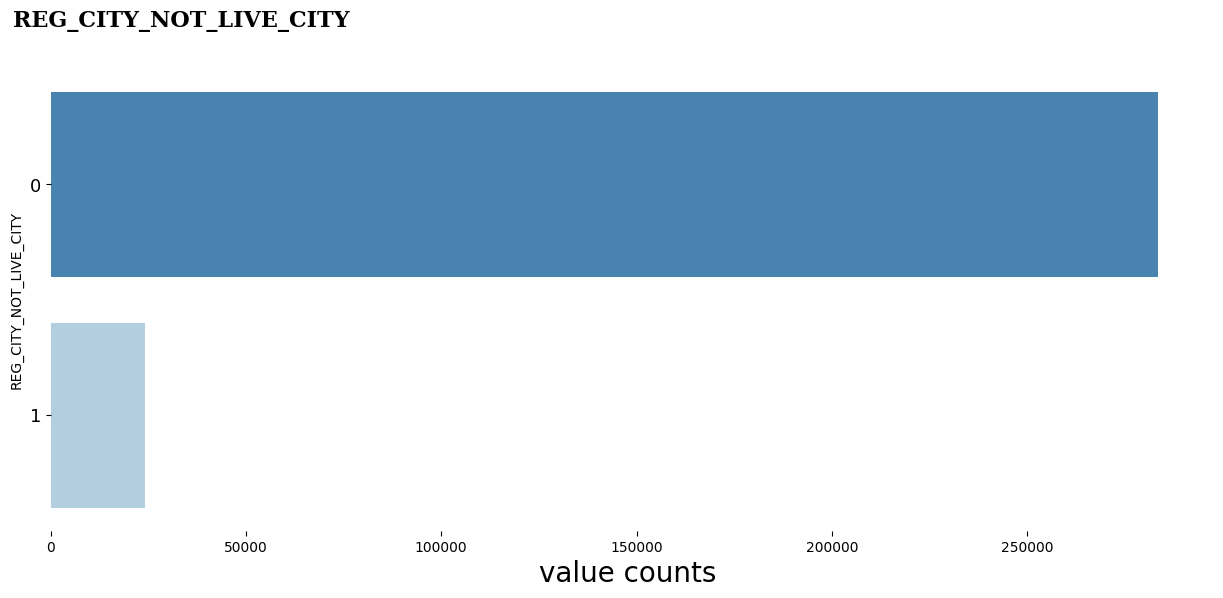

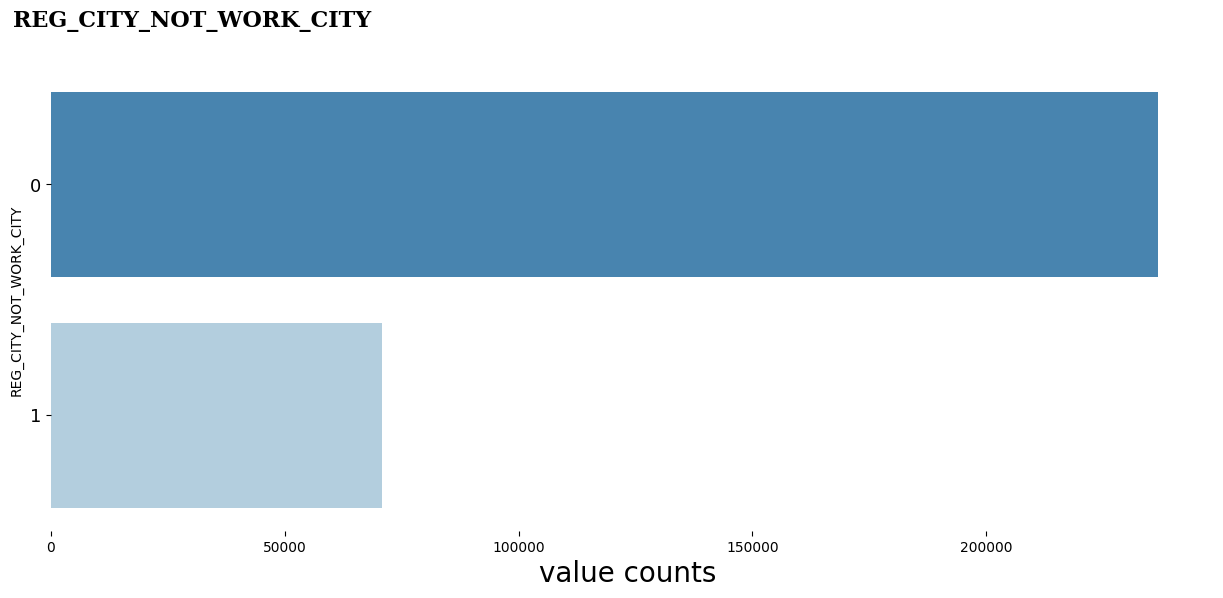

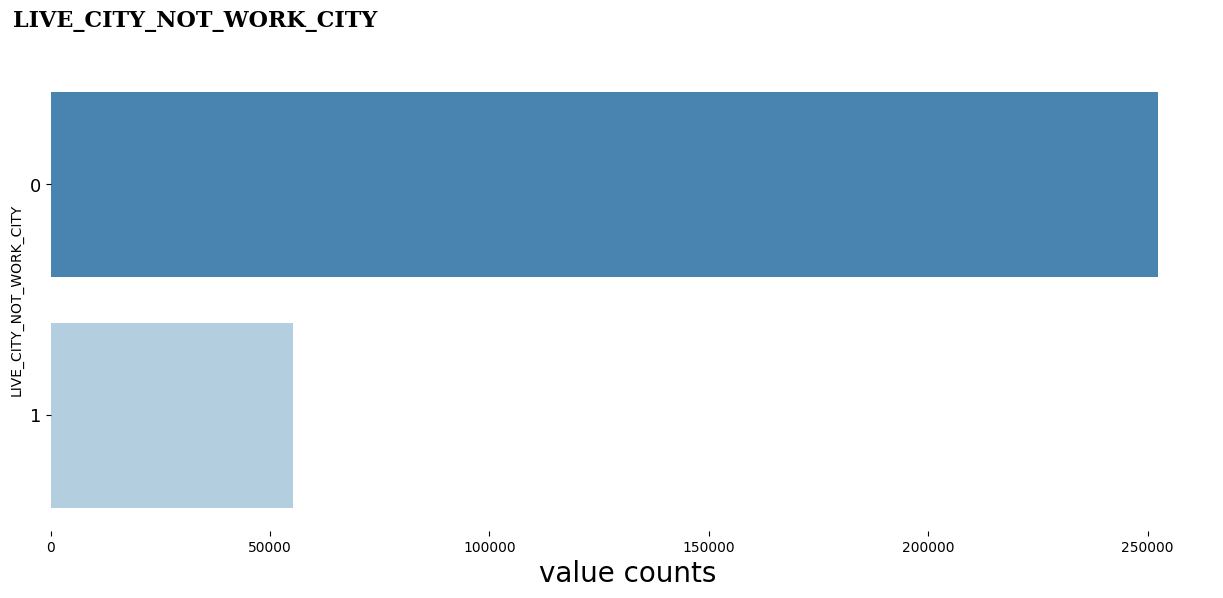

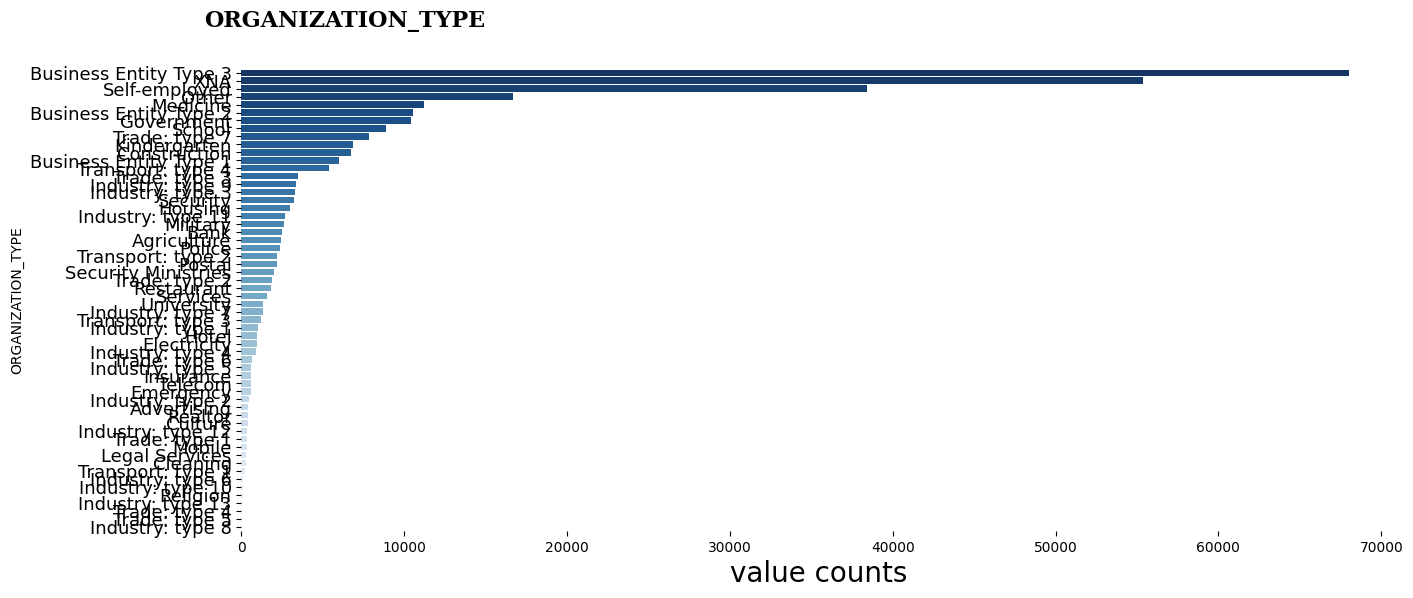

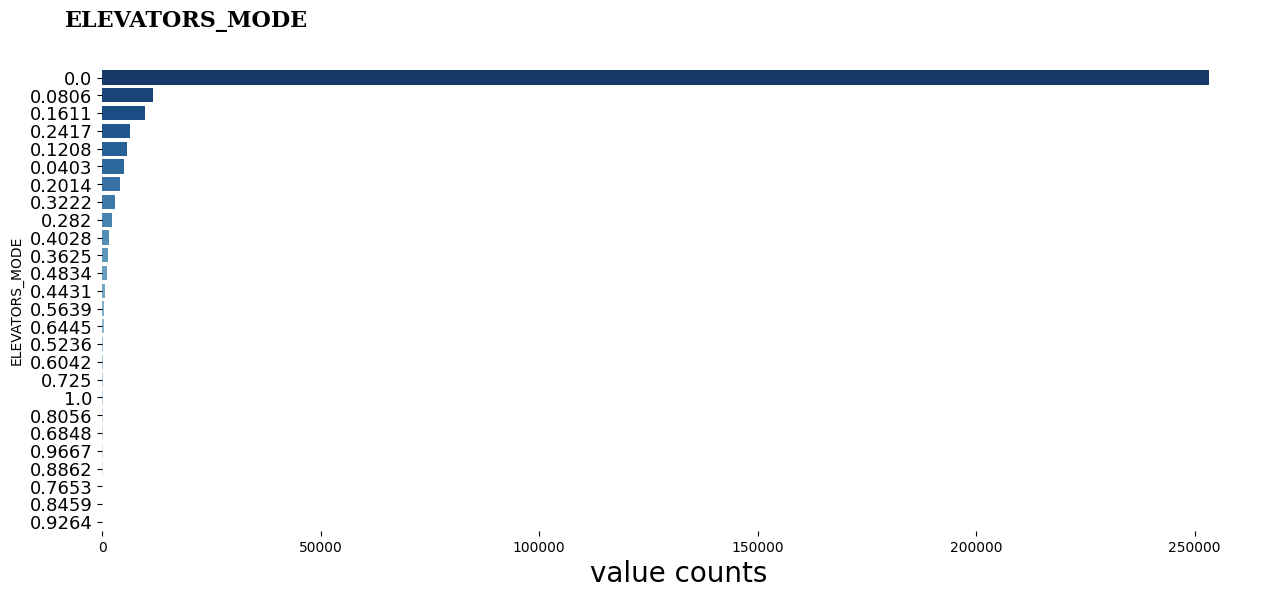

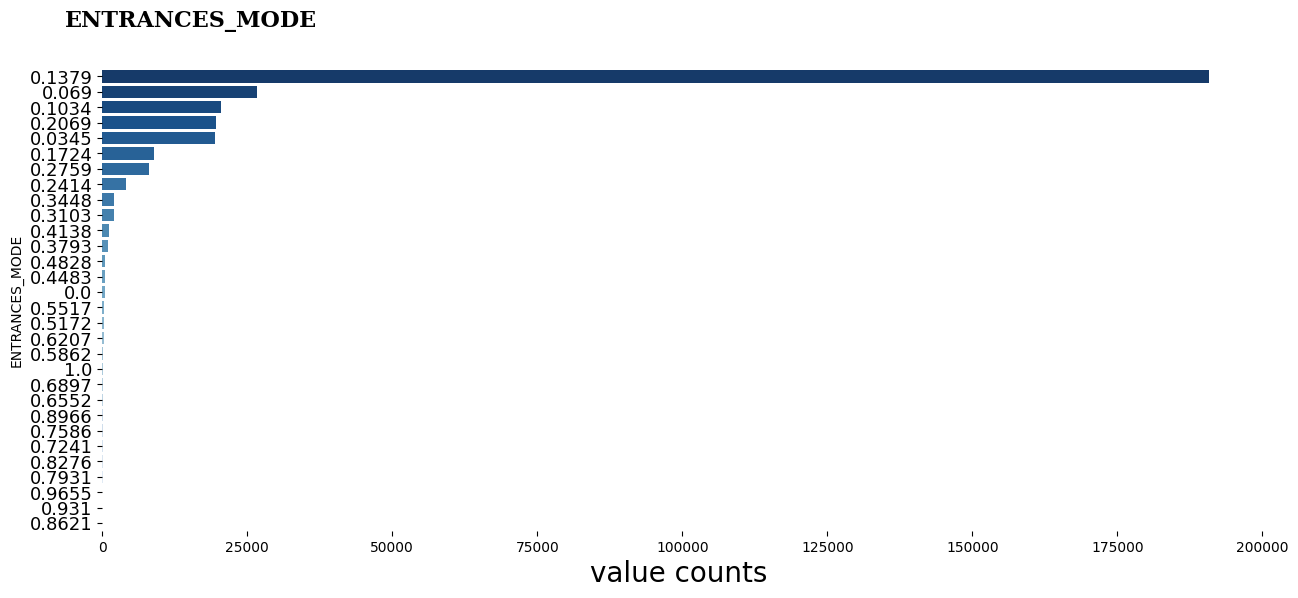

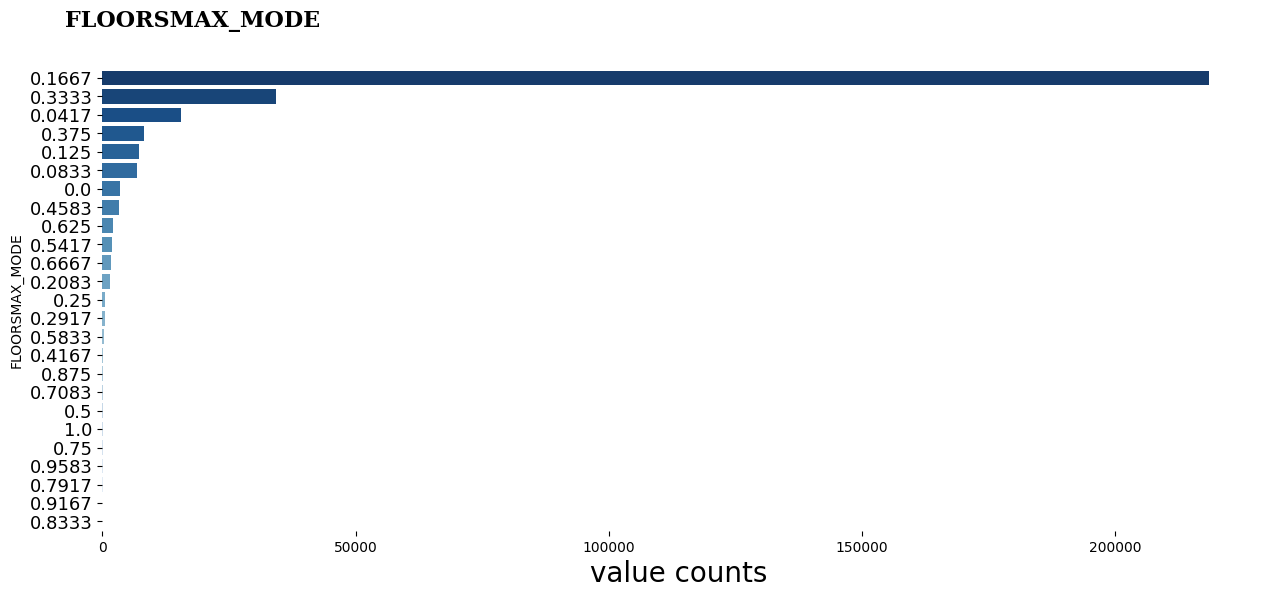

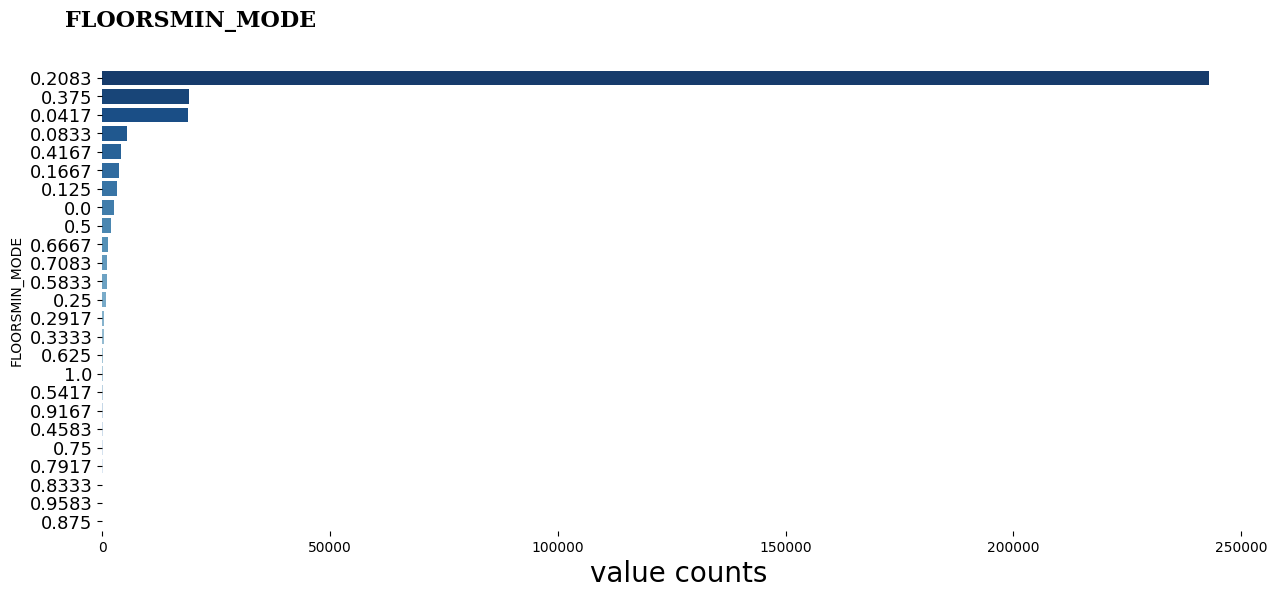

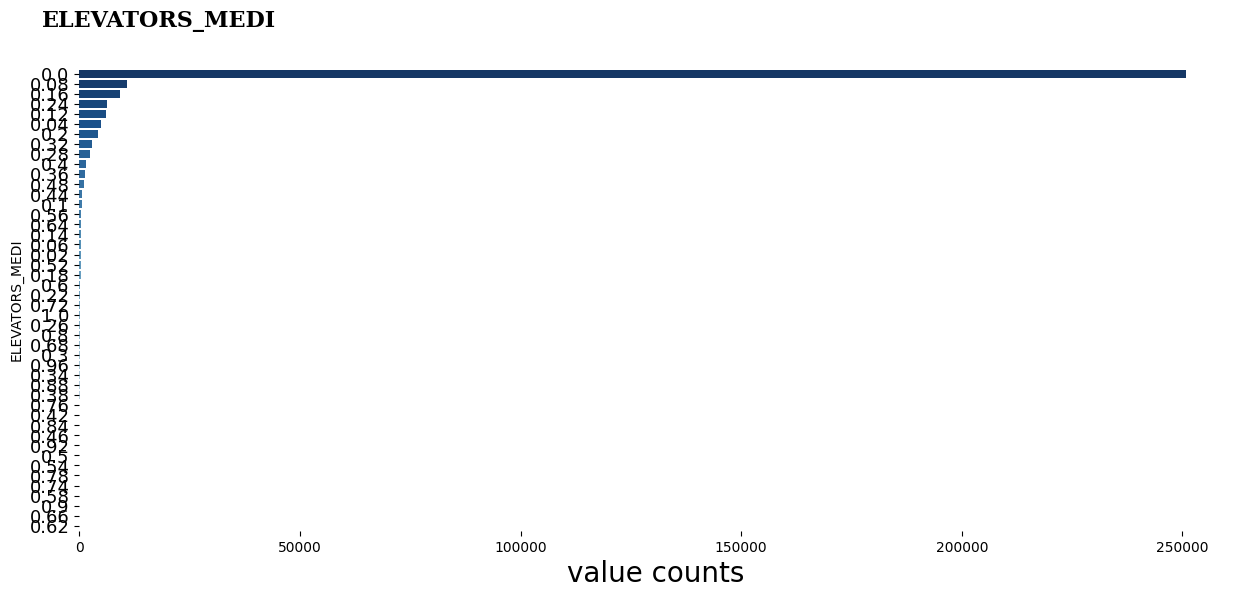

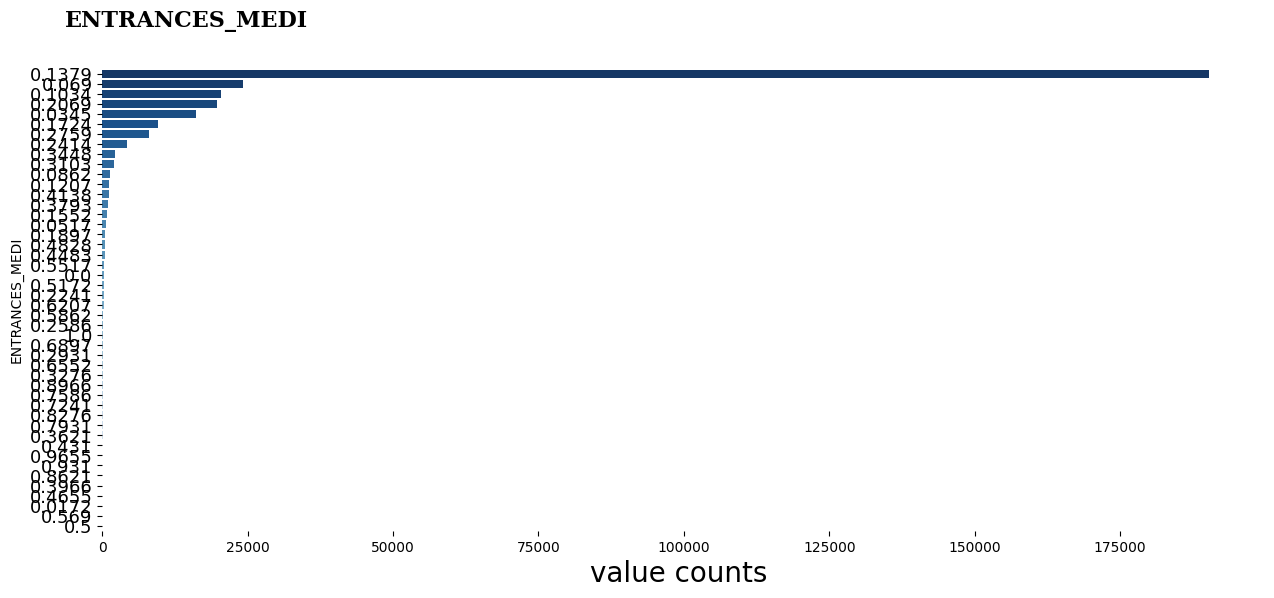

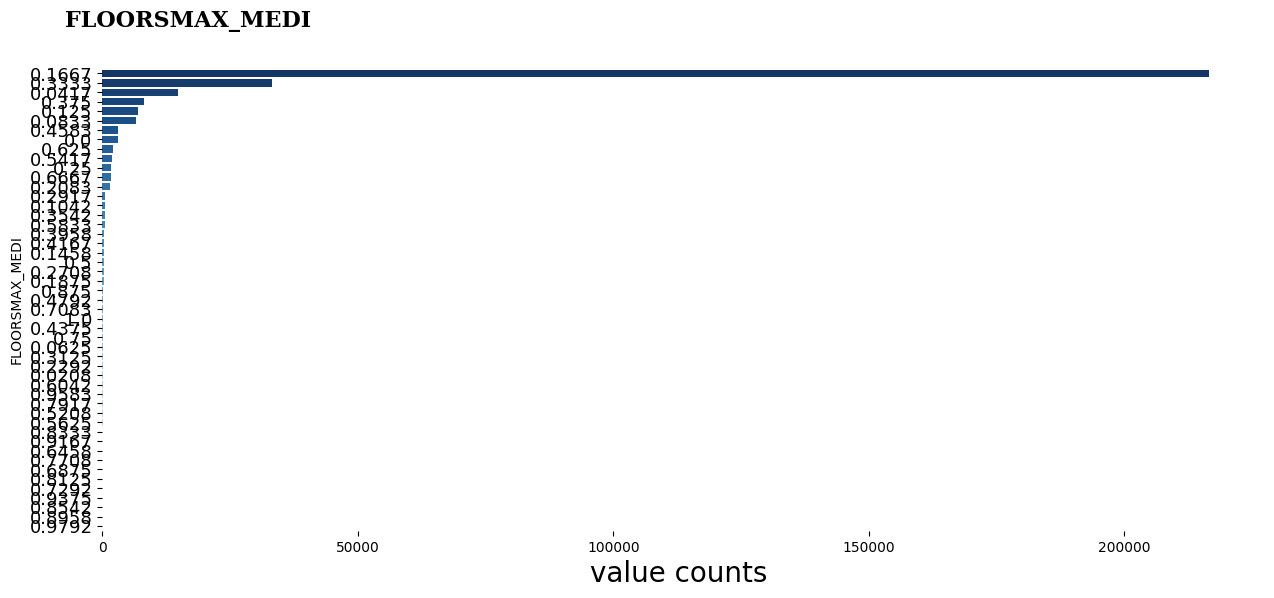

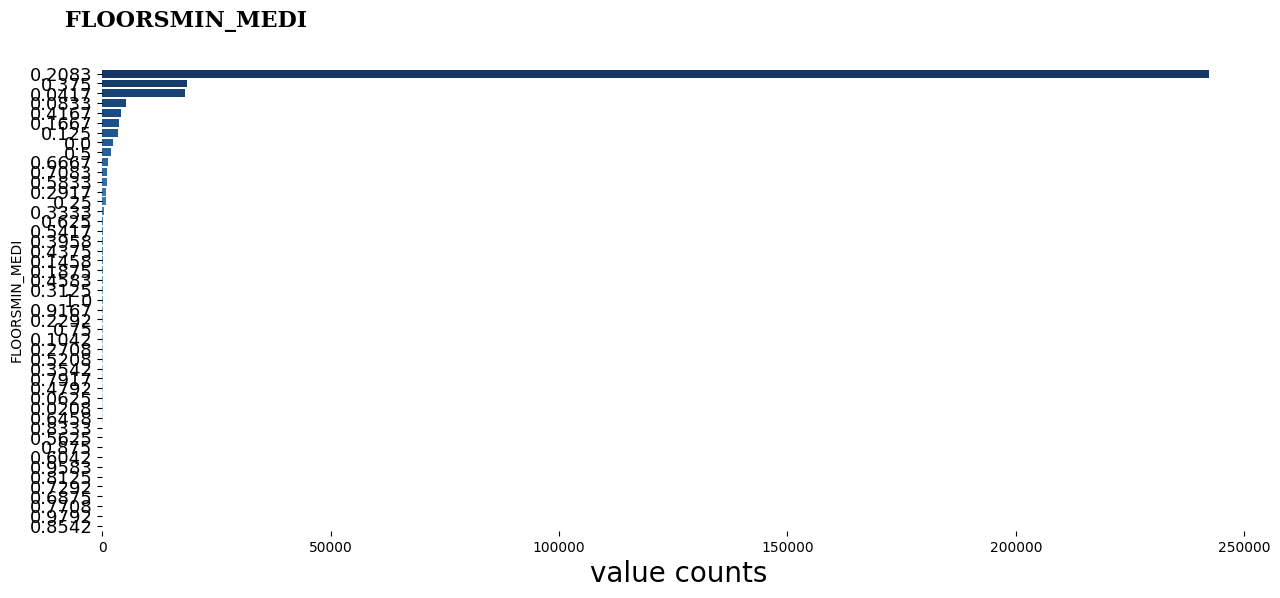

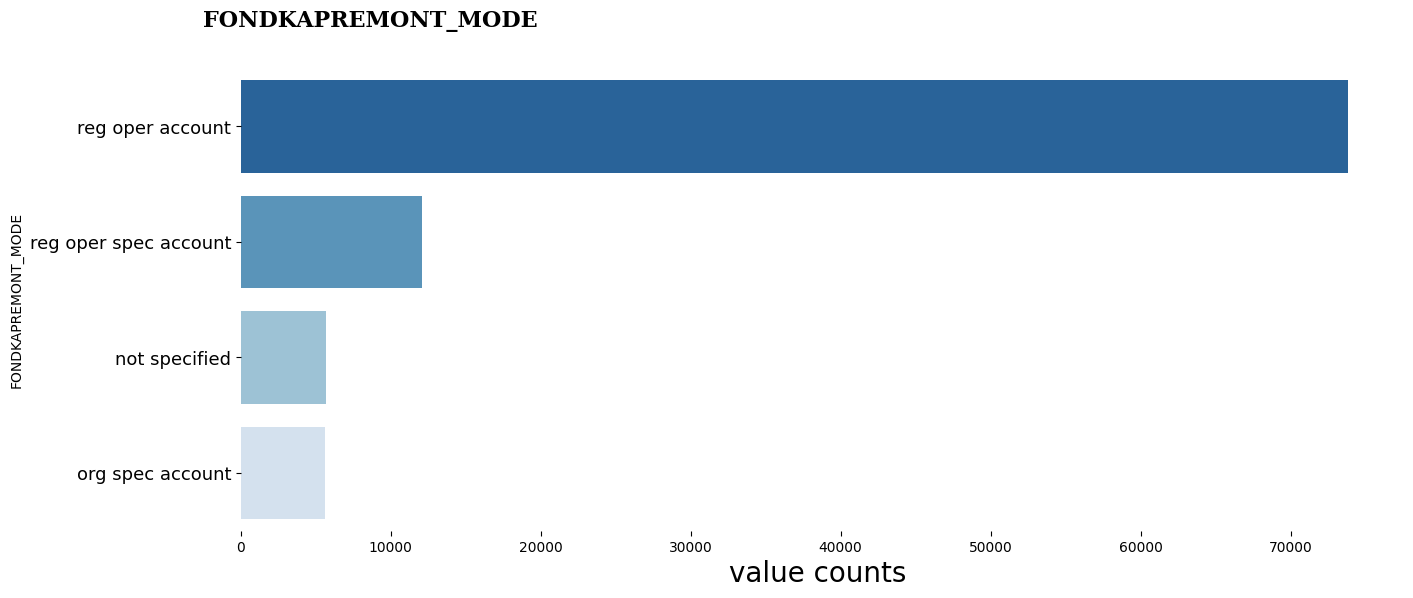

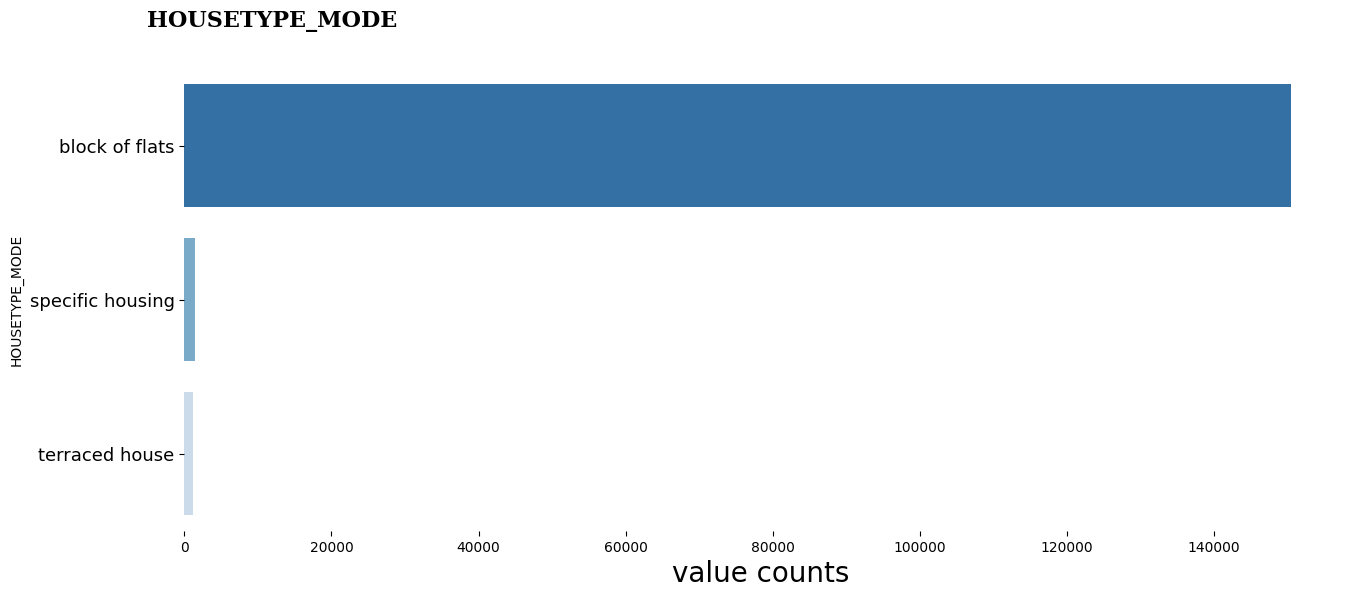

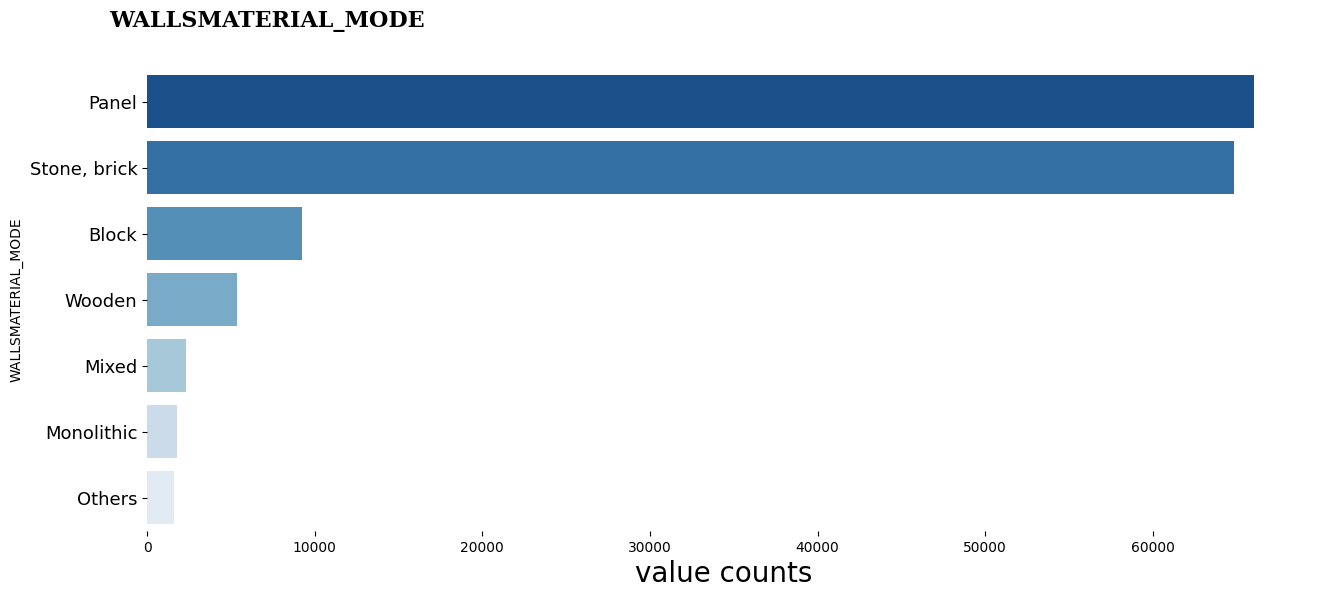

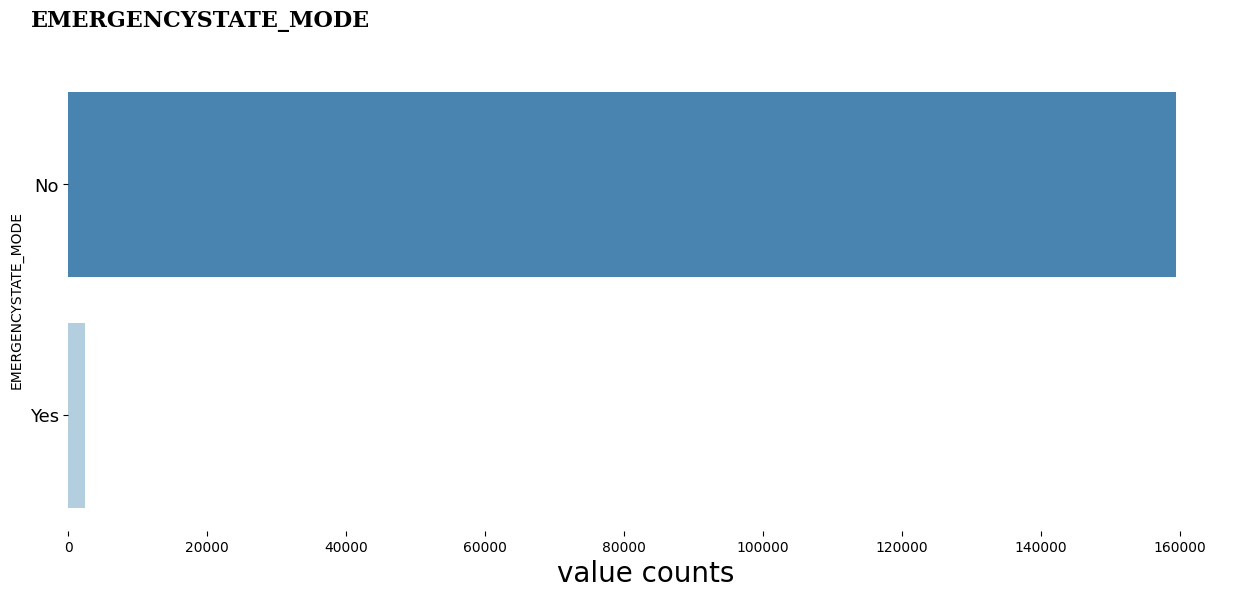

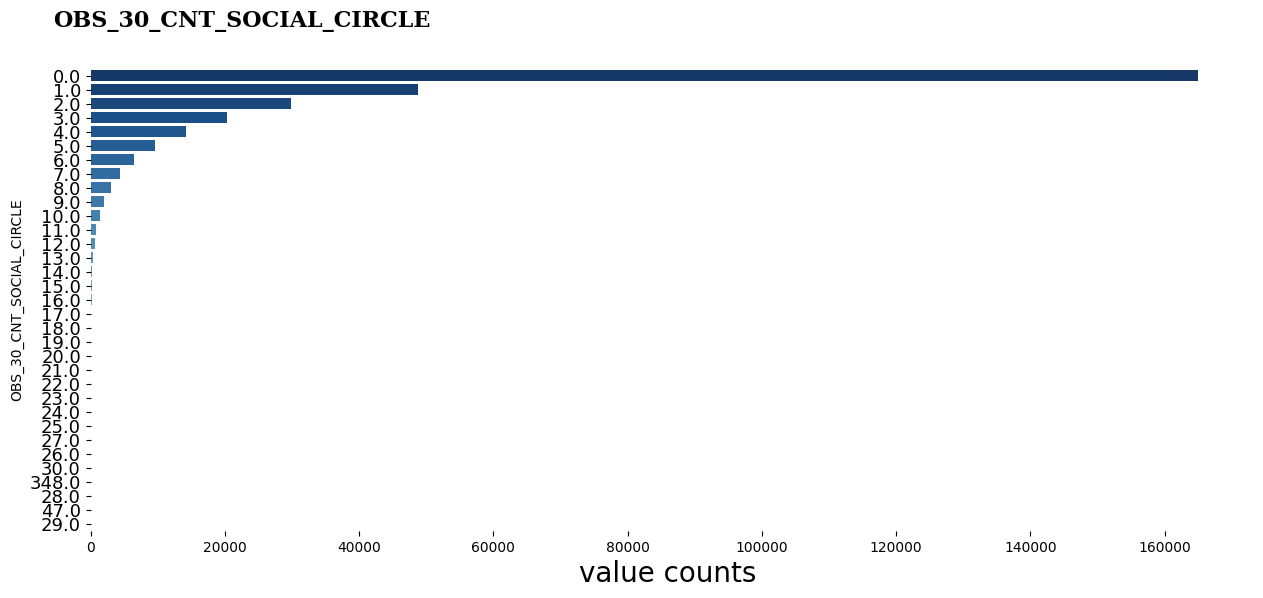

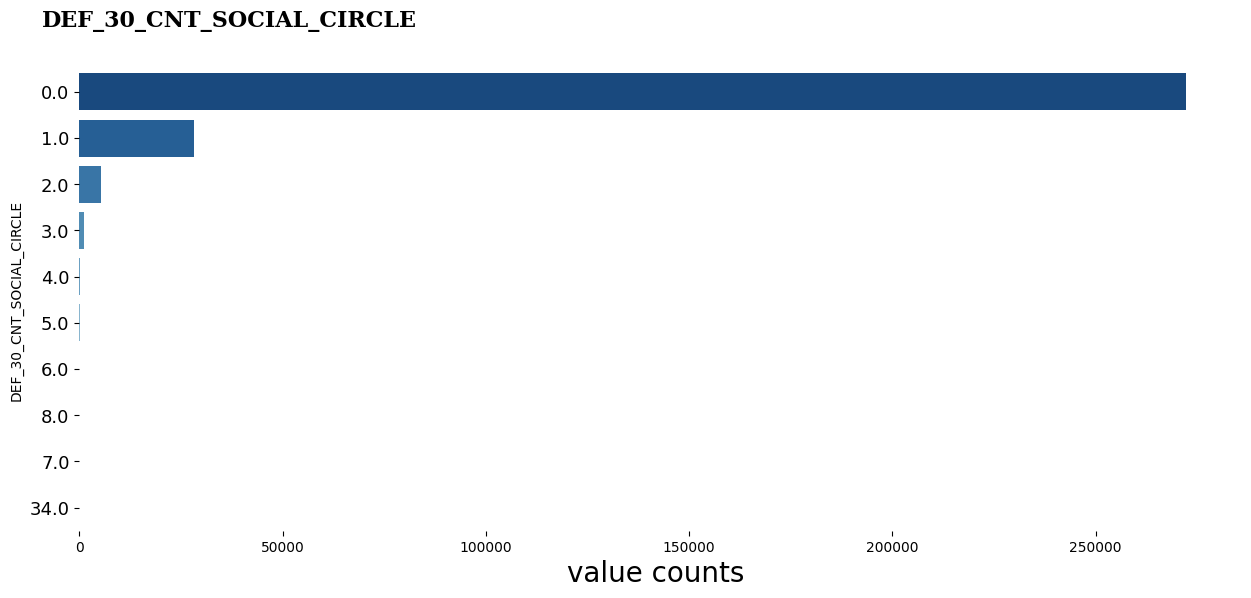

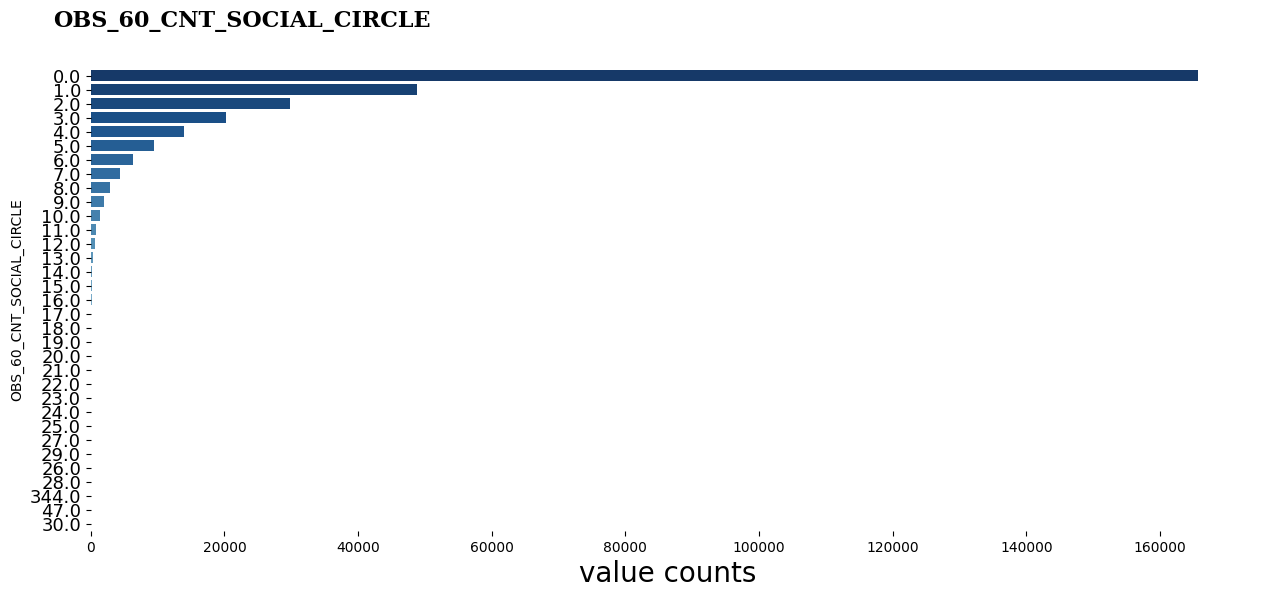

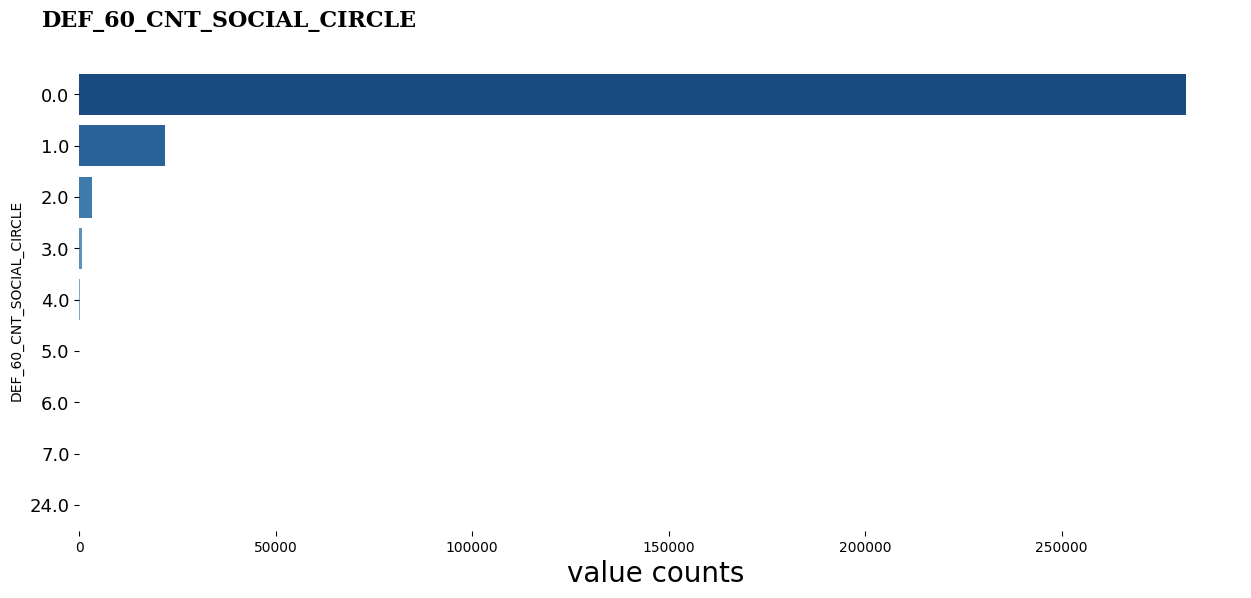

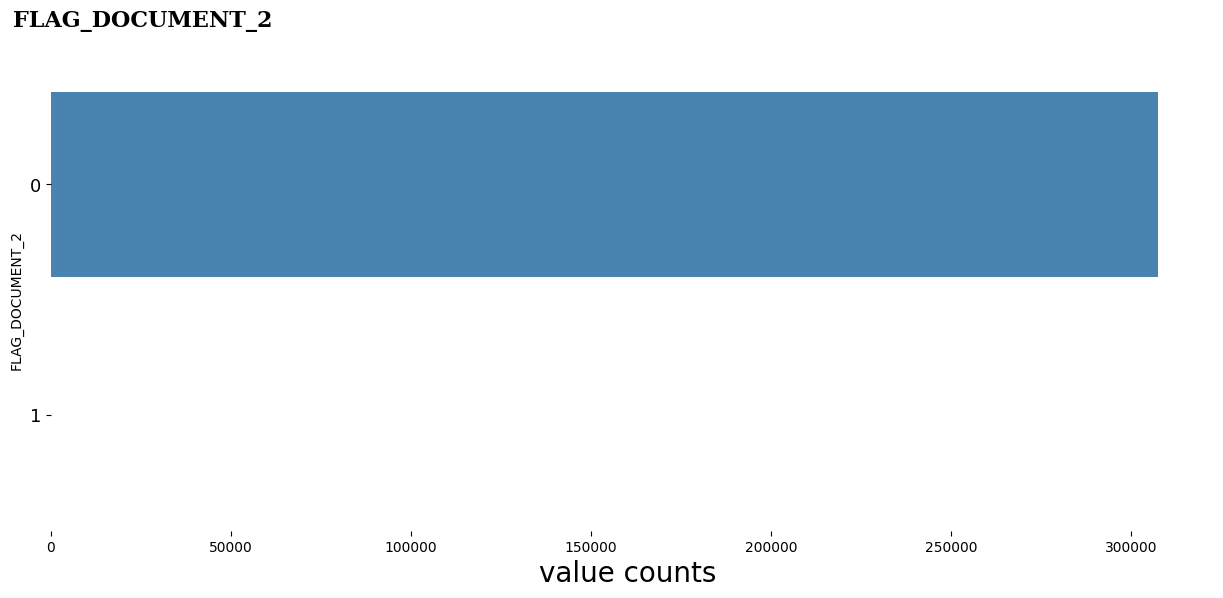

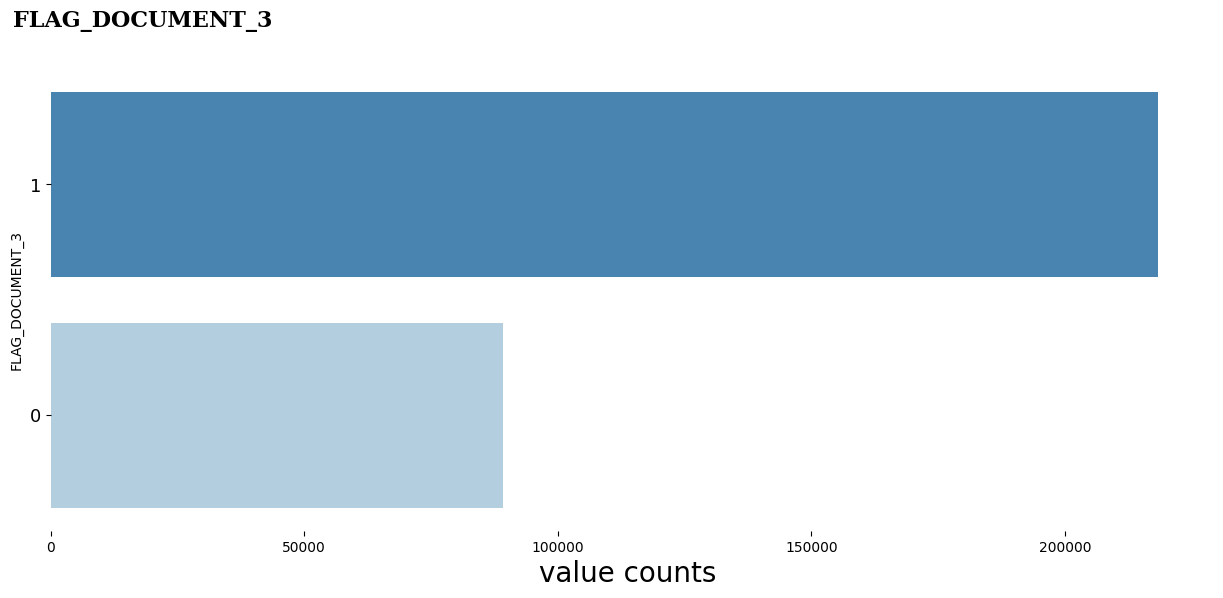

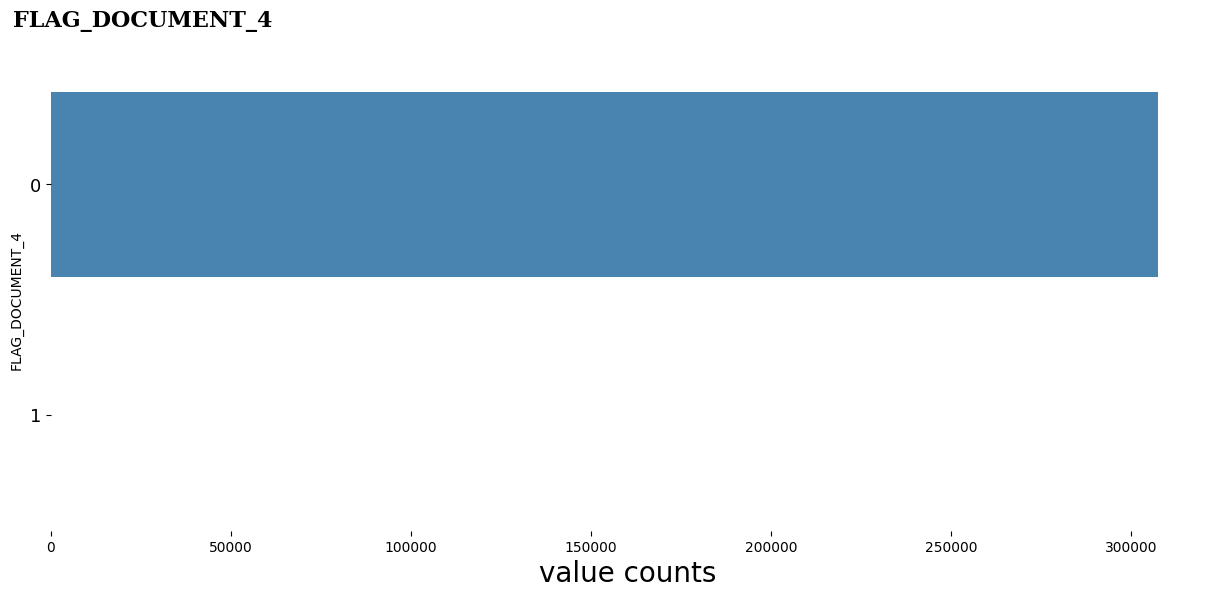

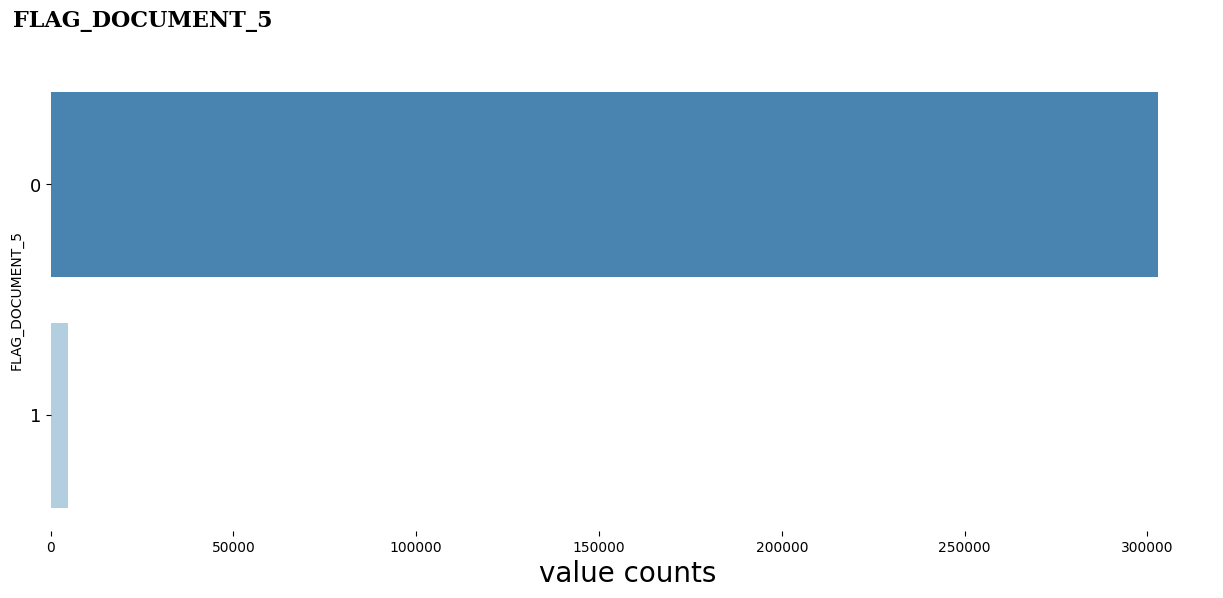

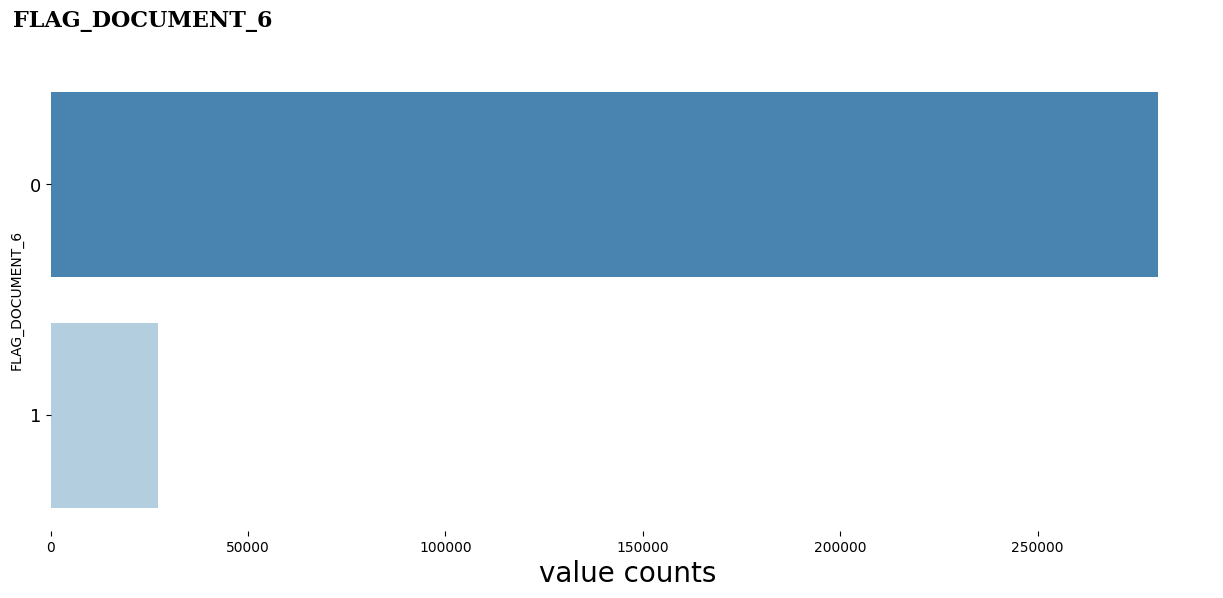

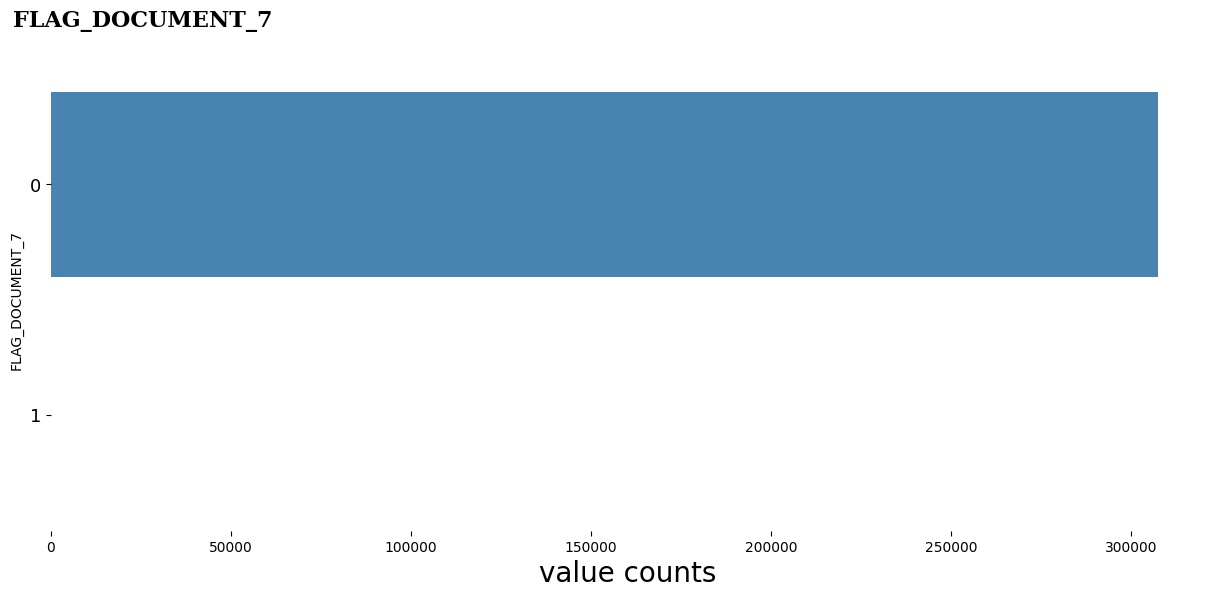

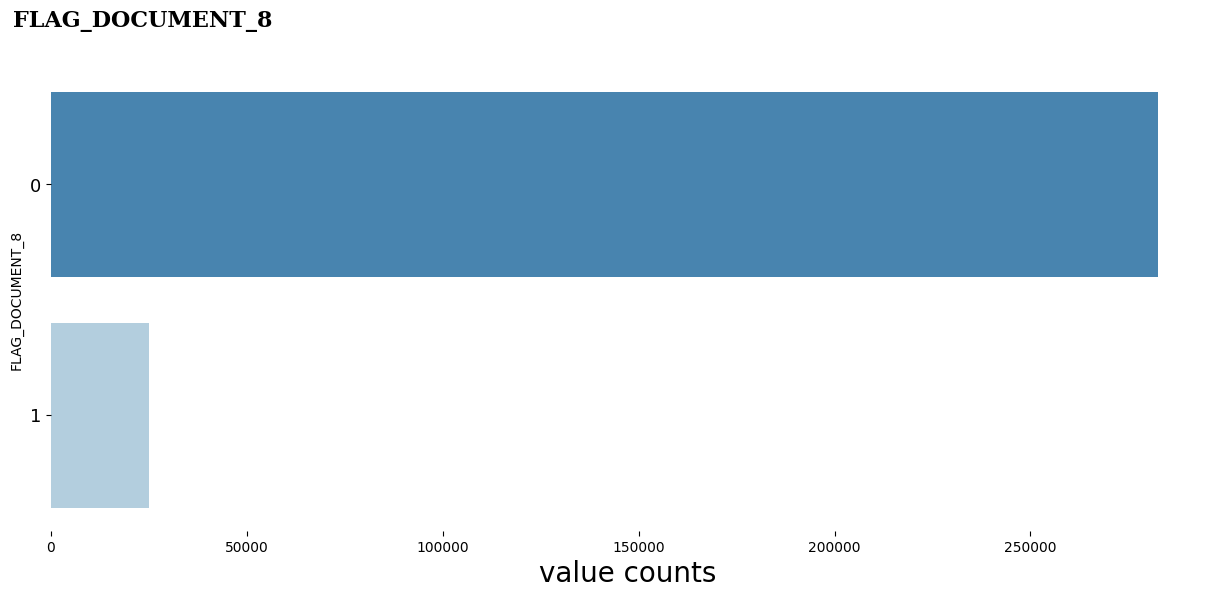

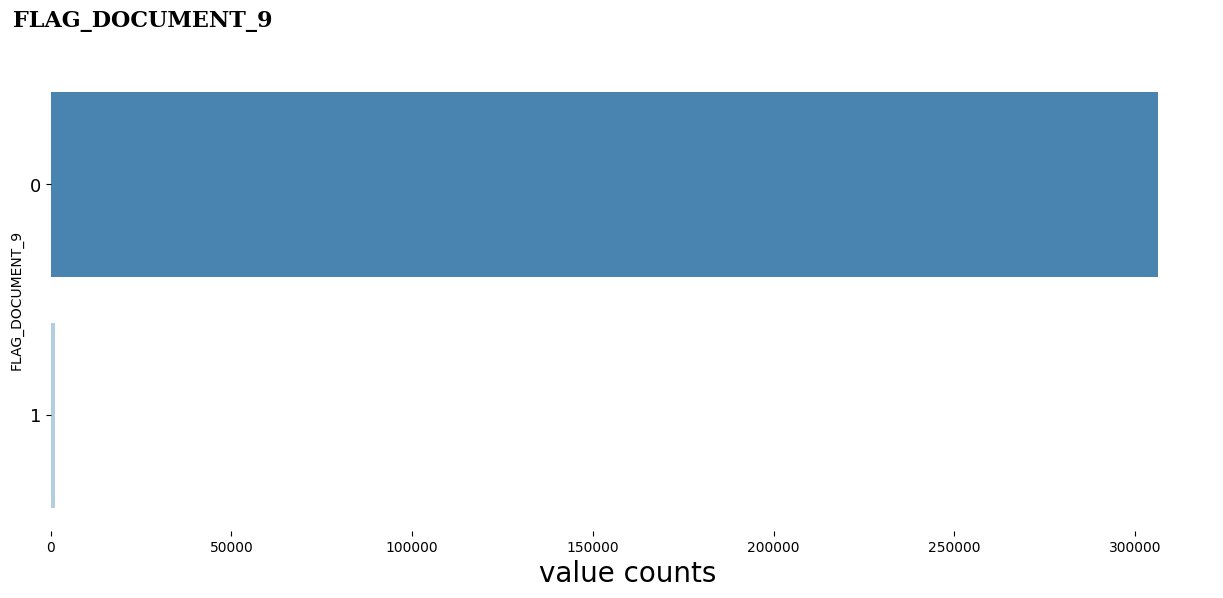

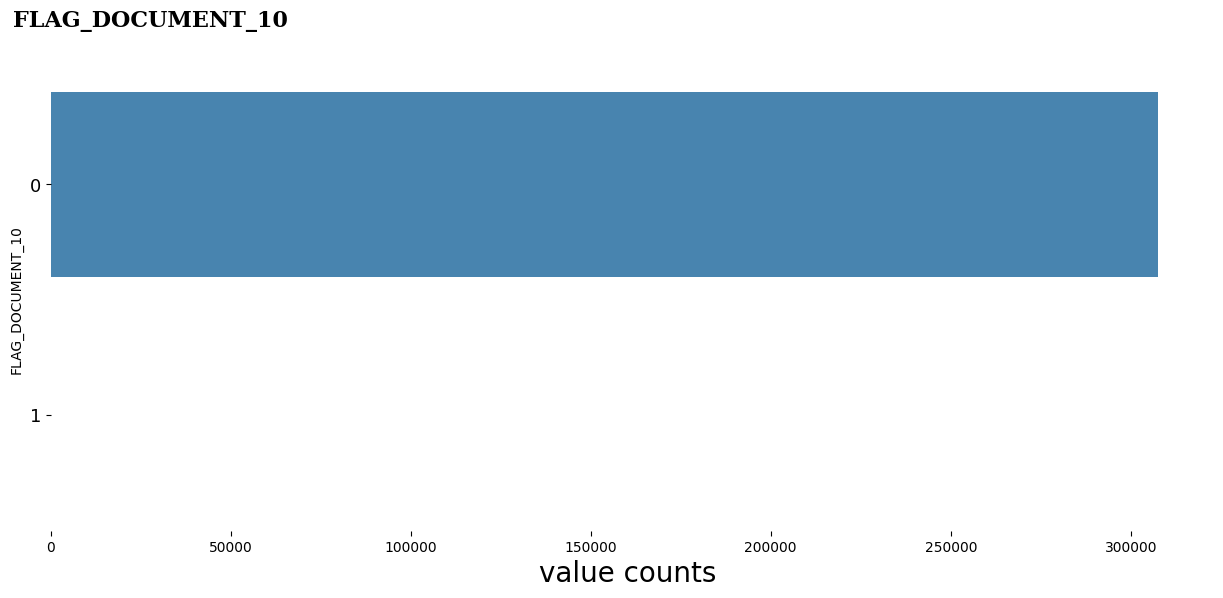

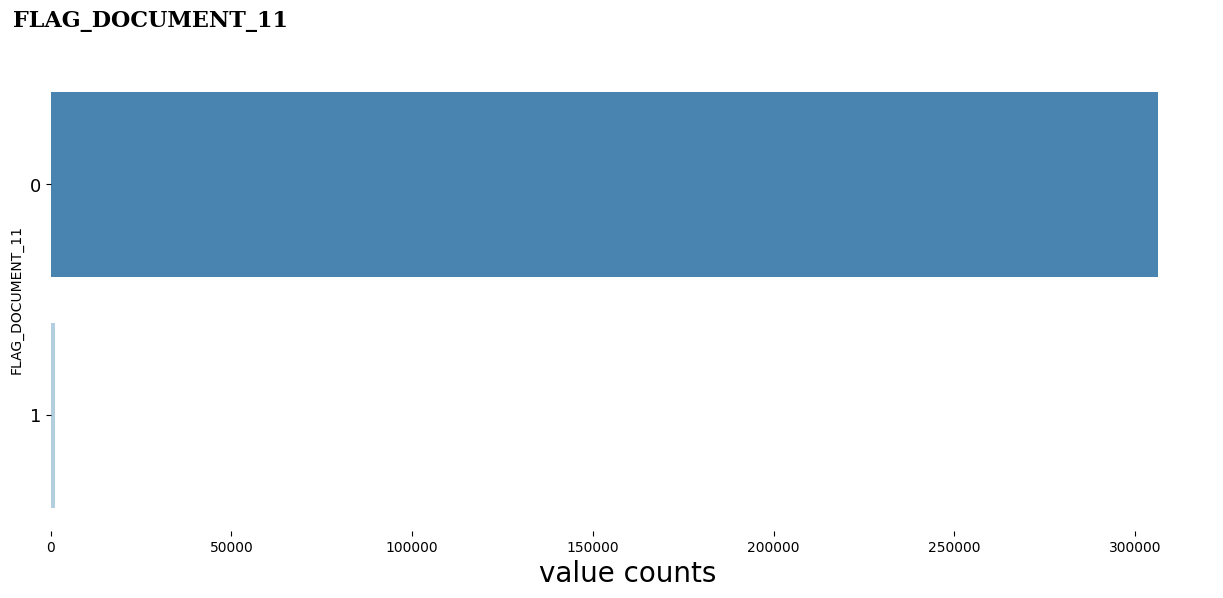

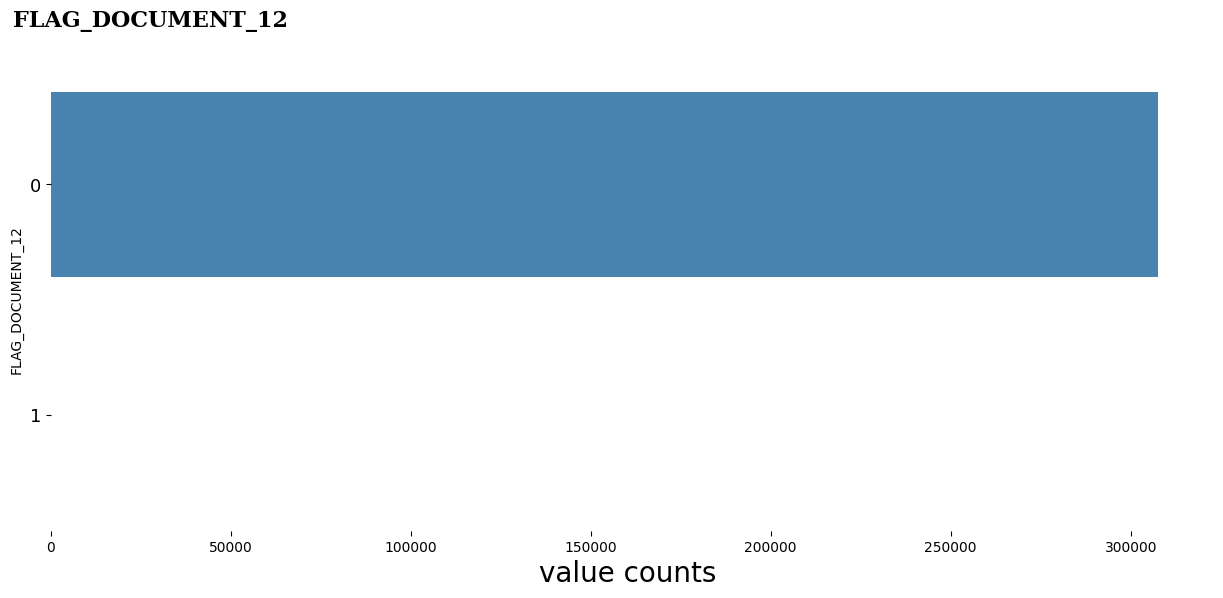

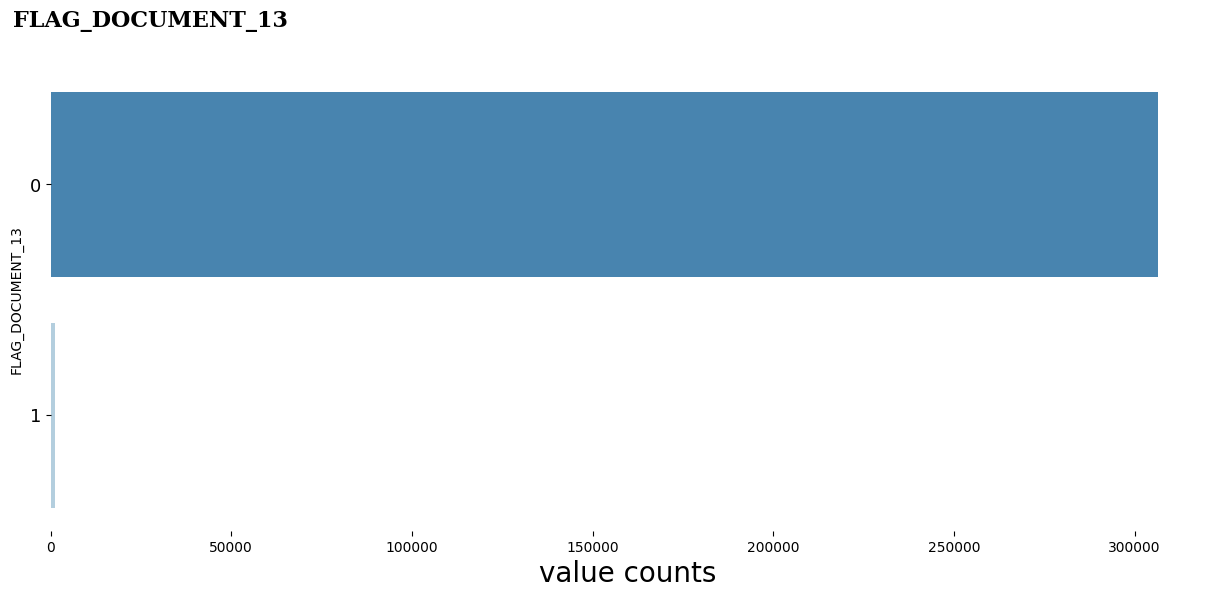

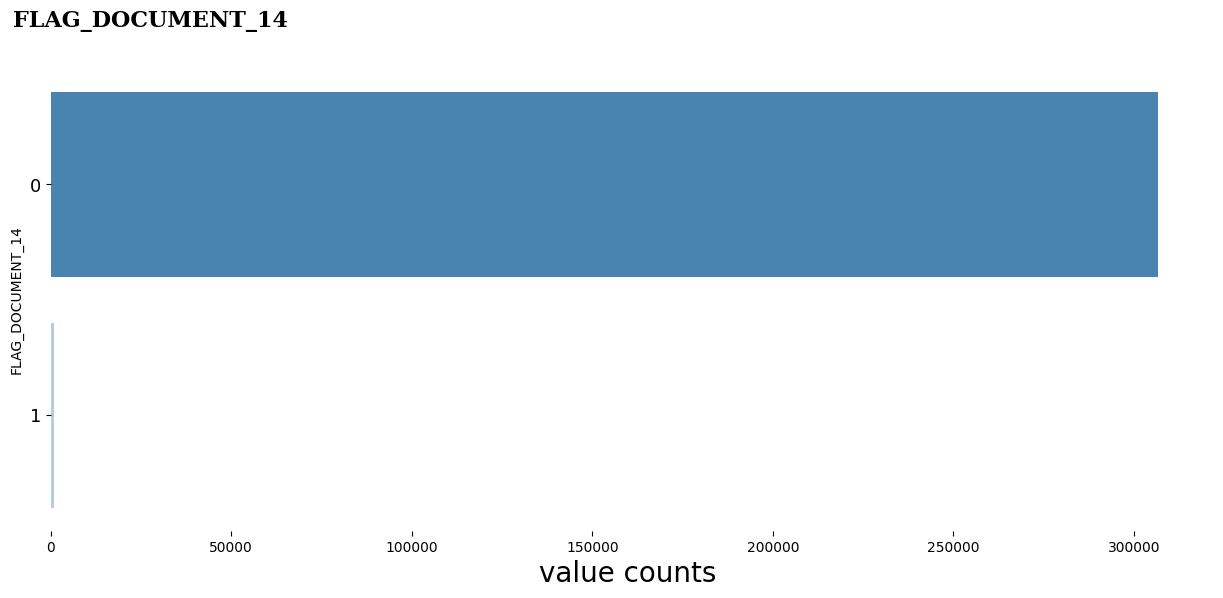

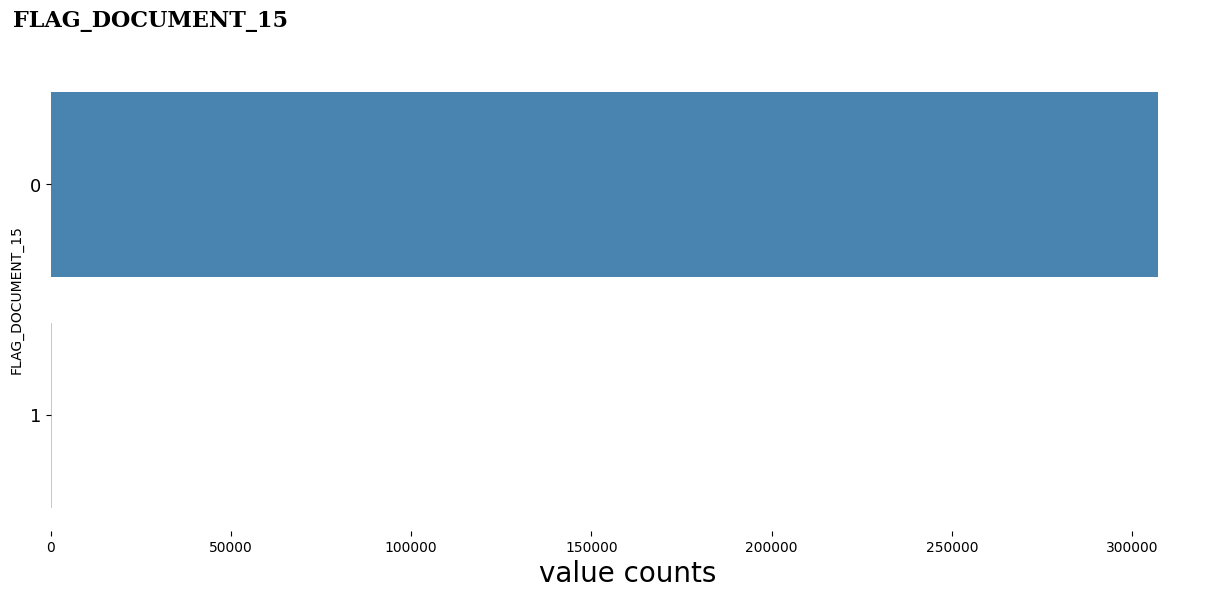

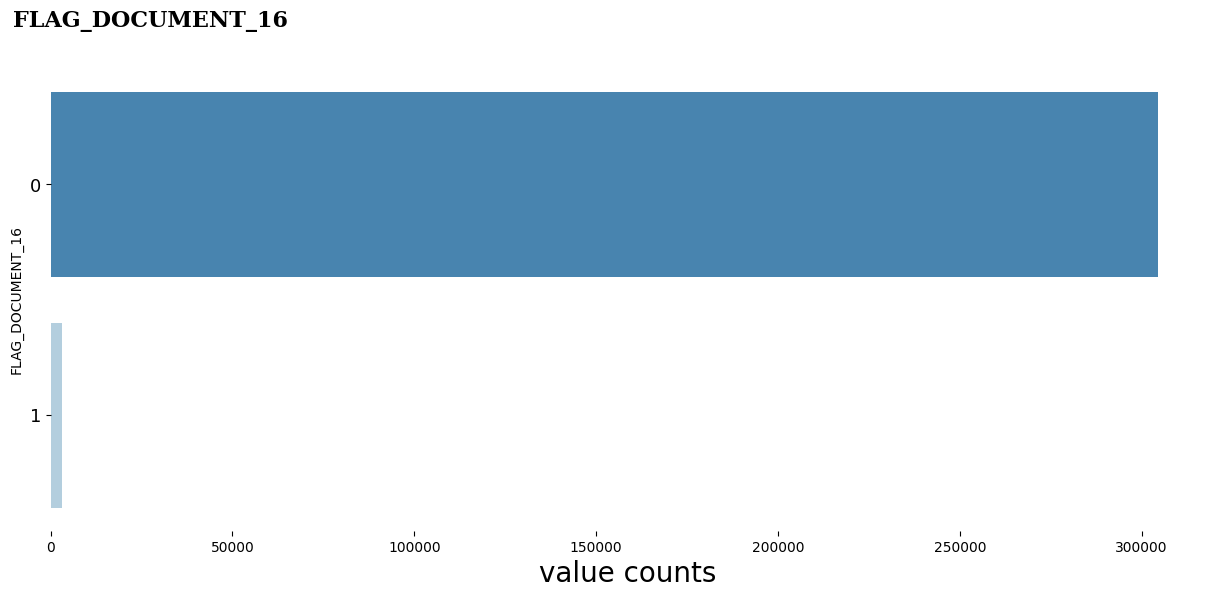

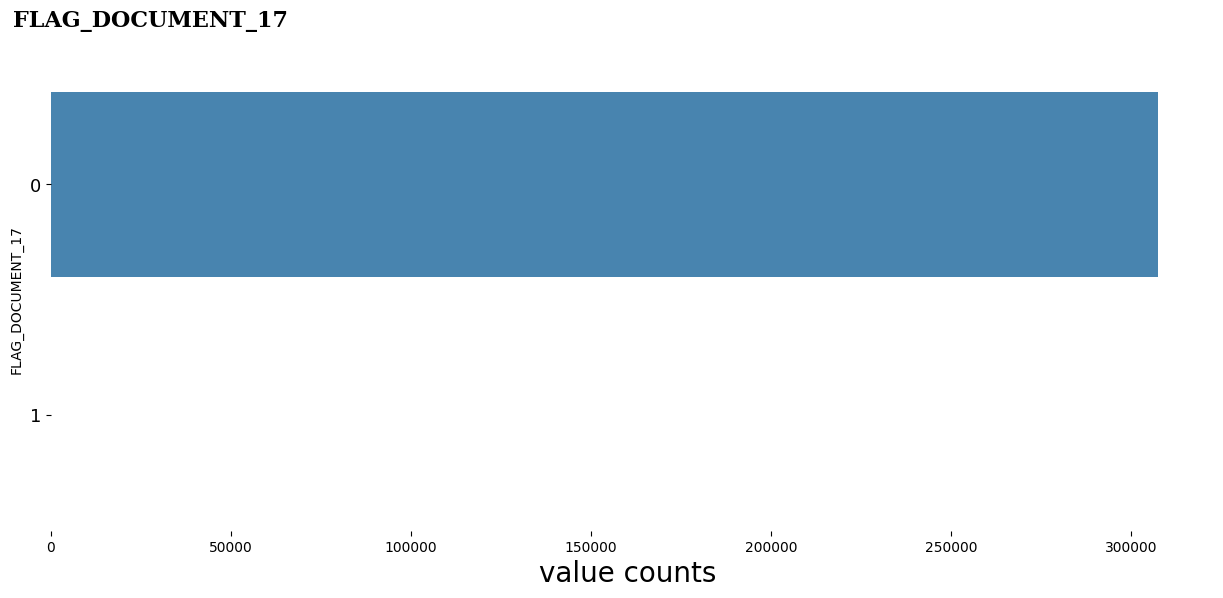

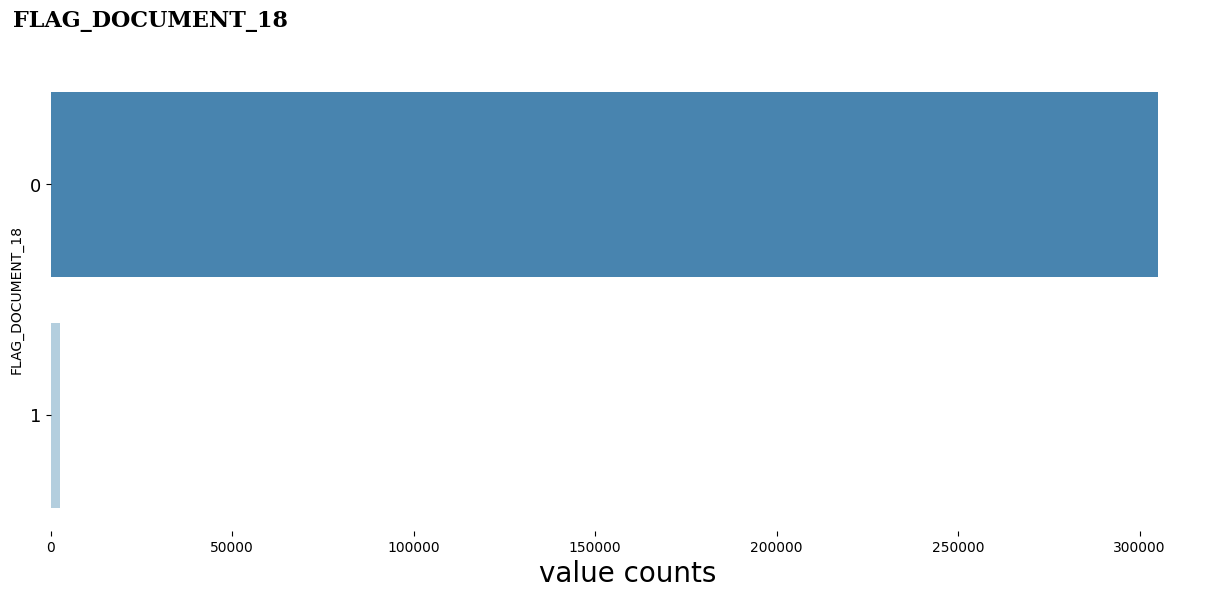

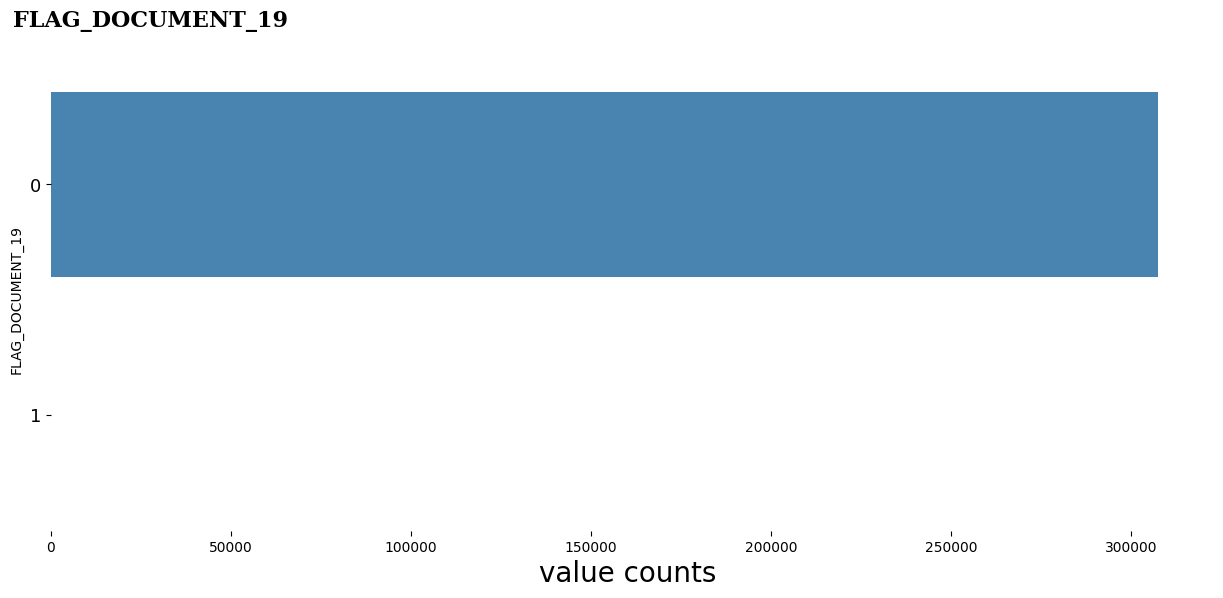

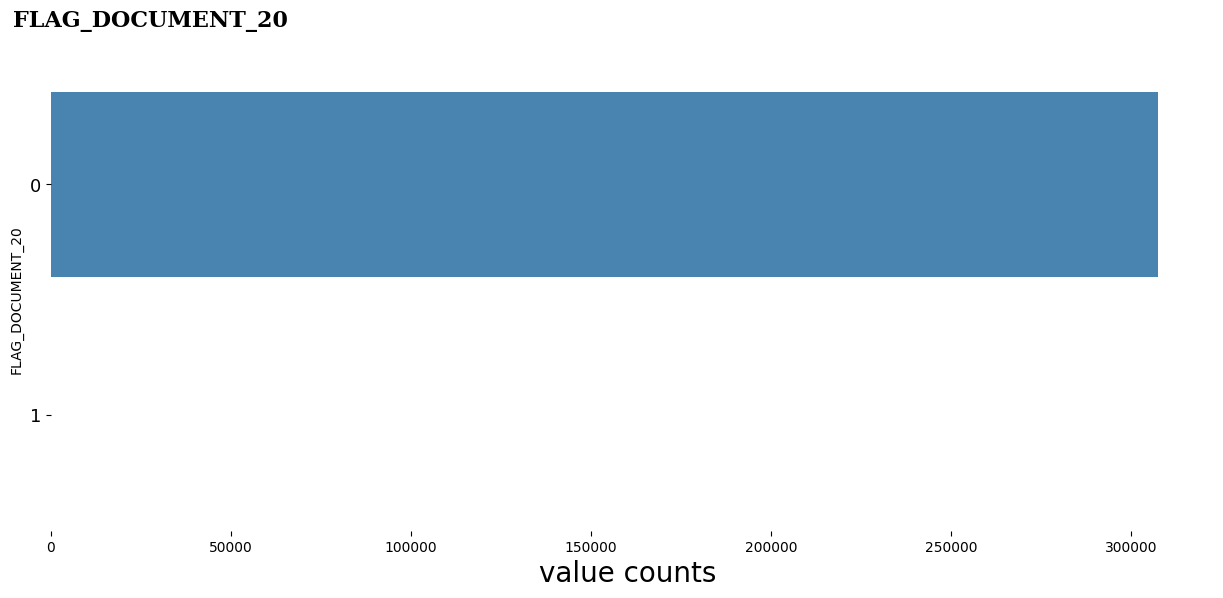

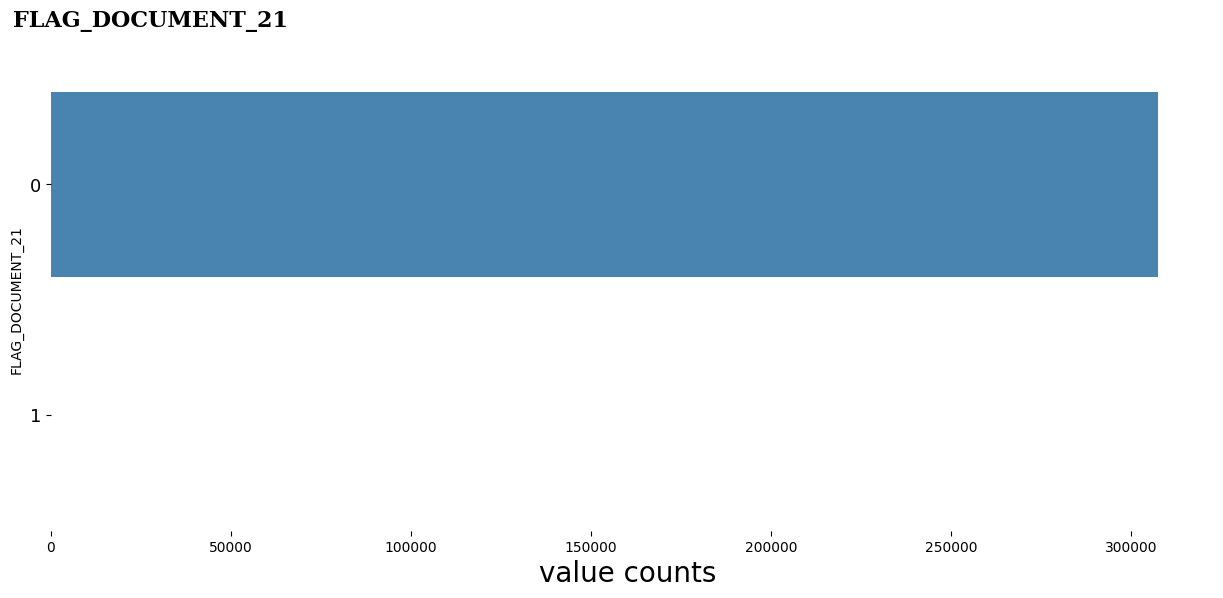

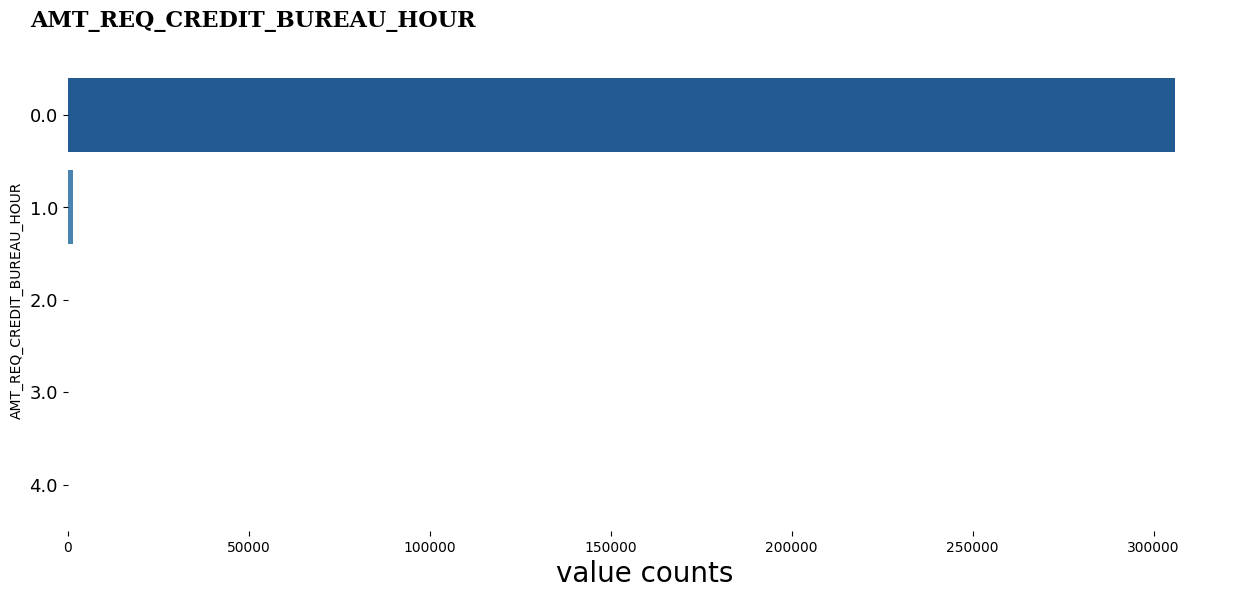

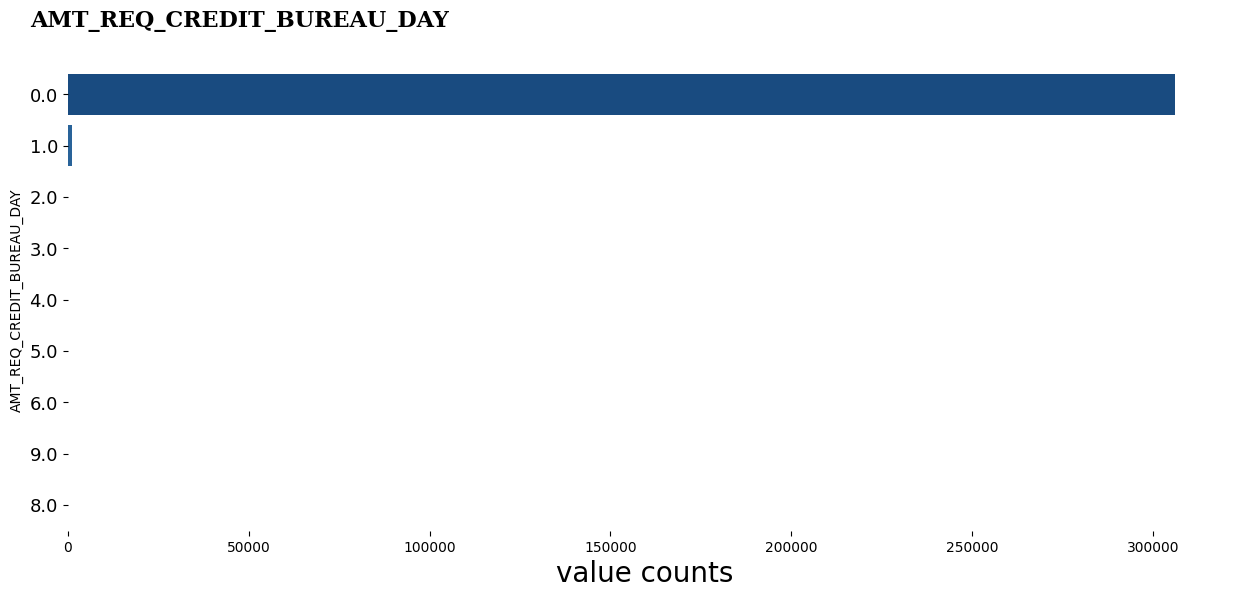

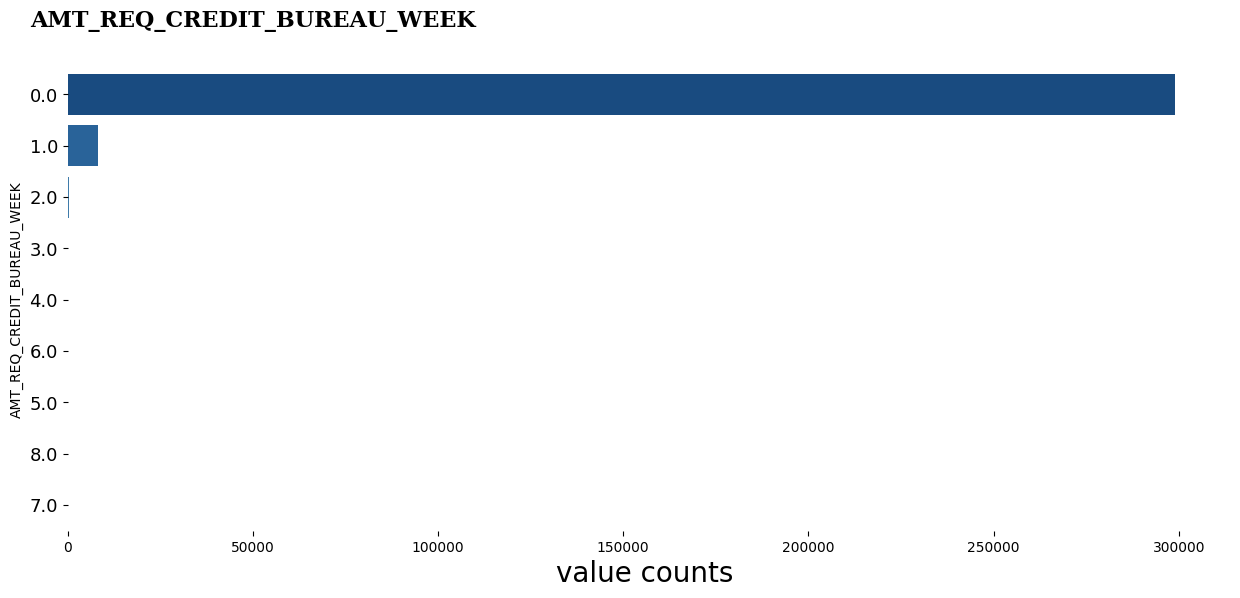

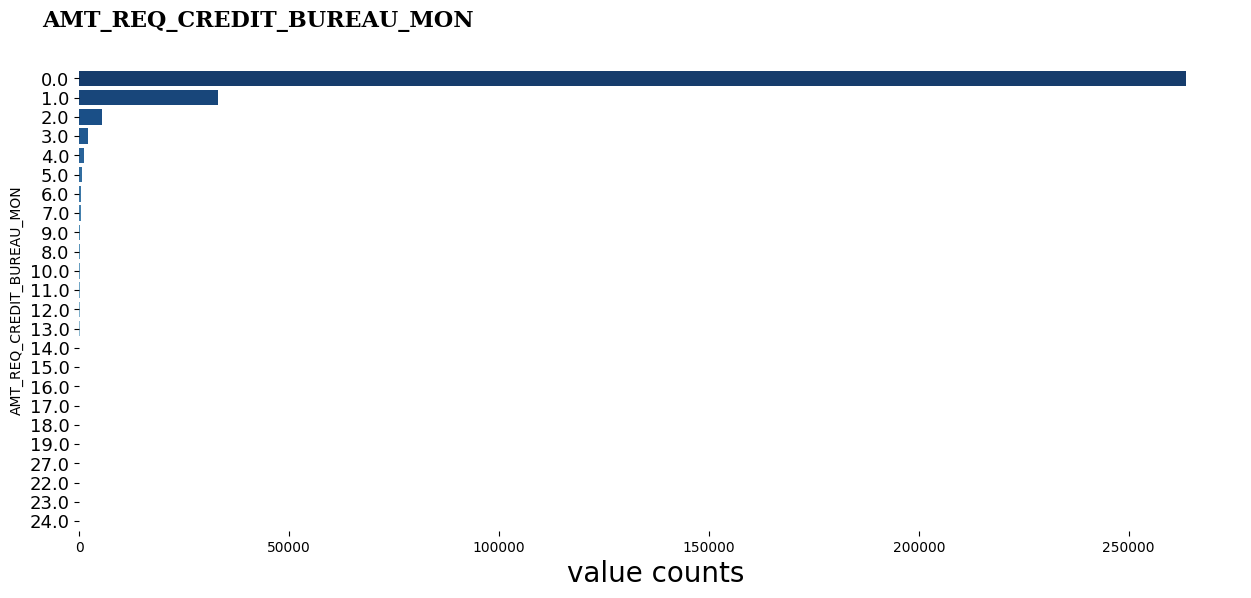

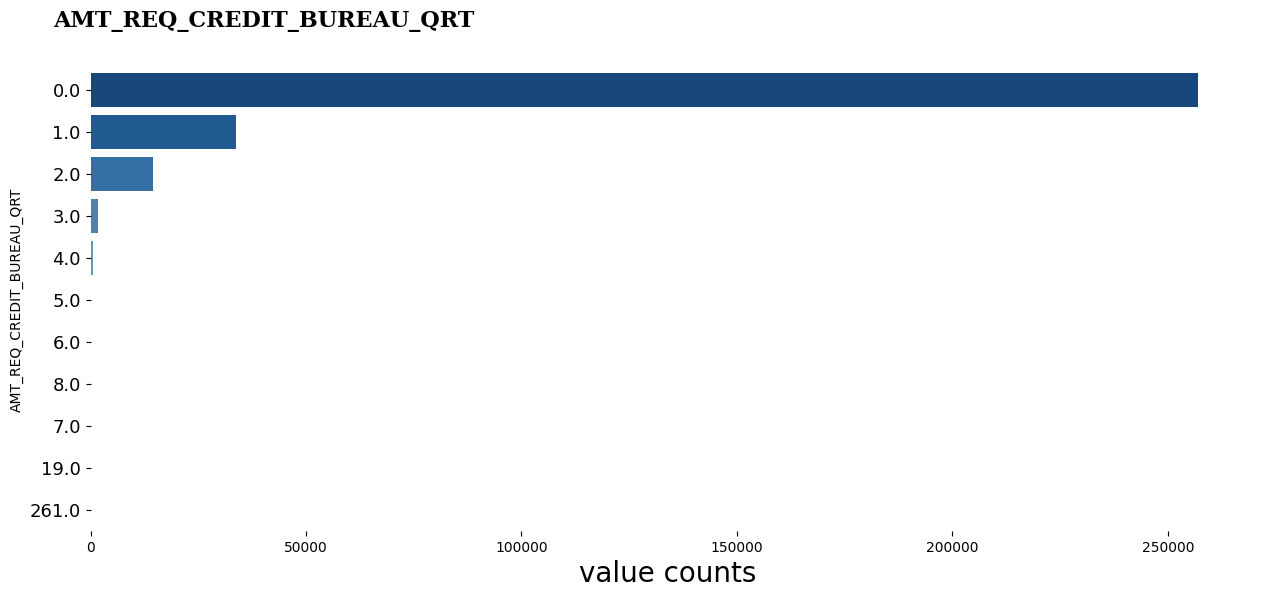

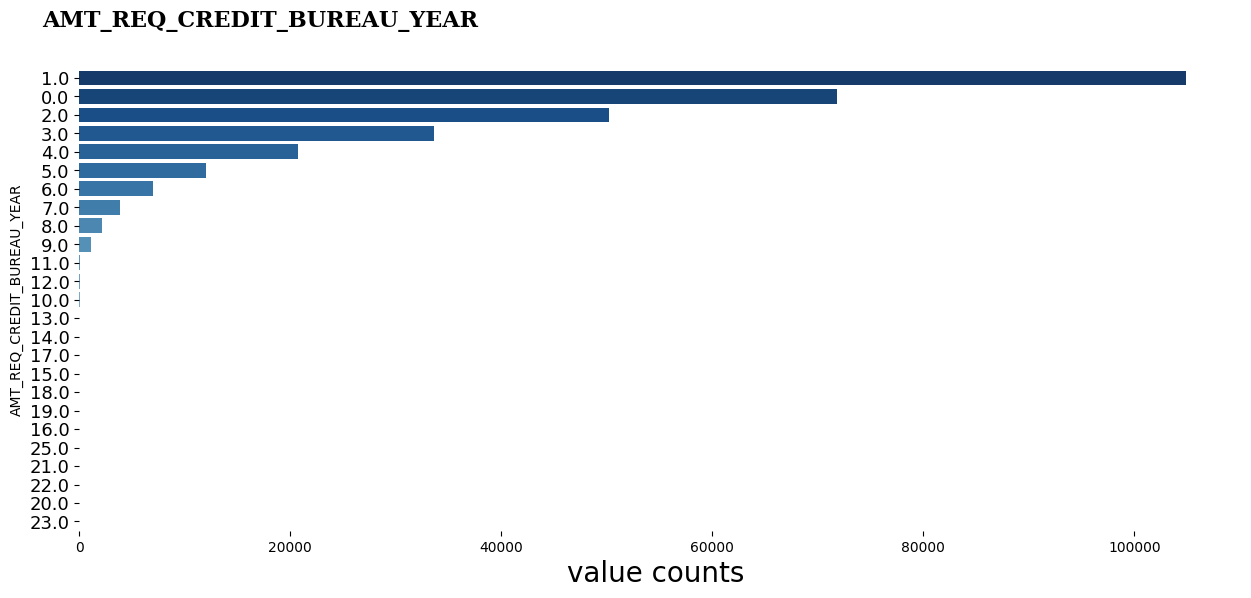

In [ ]:
for i in l1:
  fig, ax = plt.subplots(1,1, figsize=(15, 6))
  sns.countplot(y = app_train[i][1:],data=app_train.iloc[1:], order=app_train[i][1:].value_counts().index, palette='Blues_r')
  fig.text(0.1, 0.95, f'{i}', fontsize=16, fontweight='bold', fontfamily='serif')
  plt.xlabel('value counts ', fontsize=20)
  plt.ylabel(f'{i}')
  plt.yticks(fontsize=13)
  plt.box(False)

# 4. Machine Learning Implementation and Evaluation

In [11]:
l = LabelEncoder()
for q in app_test.describe(include='object').columns:
    app_test[q]=l.fit_transform(app_test[q])
app_test

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0          100001                   0            0             0   
1          100005                   0            1             0   
2          100013                   0            1             1   
3          100028                   0            0             0   
4          100038                   0            1             1   
...           ...                 ...          ...           ...   
48739      456221                   0            0             0   
48740      456222                   0            0             0   
48741      456223                   0            0             1   
48742      456224                   0            1             0   
48743      456250                   0            0             1   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    1             0          135000.0    568800.0   
1                    1             0           99000.0    222768.0   
2                    1             0          202500.0    663264.0   
3                    1             2          315000.0   1575000.0   
4                    0             1          180000.0    625500.0   
...                ...           ...               ...         ...   
48739                1             0          121500.0    412560.0   
48740                0             2          157500.0    622413.0   
48741                1             1          202500.0    315000.0   
48742                0             0          225000.0    450000.0   
48743                0             0          135000.0    312768.0   

       AMT_ANNUITY  AMT_GOODS_PRICE  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0          20560.5         450000.0  ...                 0                 0   
1          17370.0         180000.0  ...                 0                 0   
2          69777.0         630000.0  ...                 0                 0   
3          49018.5        1575000.0  ...                 0                 0   
4          32067.0         625500.0  ...                 0                 0   
...            ...              ...  ...               ...               ...   
48739      17473.5         270000.0  ...                 0                 0   
48740      31909.5         495000.0  ...                 0                 0   
48741      33205.5         315000.0  ...                 0                 0   
48742      25128.0         450000.0  ...                 0                 0   
48743      24709.5         270000.0  ...                 0                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                     0                 0                         0.0   
1                     0                 0                         0.0   
2                     0                 0                         0.0   
3                     0                 0                         0.0   
4                     0                 0                         0.0   
...                 ...               ...                         ...   
48739                 0                 0                         0.0   
48740                 0                 0                         0.0   
48741                 0                 0                         0.0   
48742                 0                 0                         0.0   
48743                 0                 0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
...                          ...                         ...   
48739                        0.0                         0.0   

In [12]:

l = LabelEncoder()
for p in app_train.describe(include='object').columns:
    app_train[p]=l.fit_transform(app_train[p])
app_train


SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   0            1             0   
1           100003       0                   0            0             0   
2           100004       0                   1            1             1   
3           100006       0                   0            0             0   
4           100007       0                   0            1             0   
...            ...     ...                 ...          ...           ...   
307506      456251       0                   0            1             0   
307507      456252       0                   0            0             0   
307508      456253       0                   0            0             0   
307509      456254       1                   0            0             0   
307510      456255       0                   0            0             0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                     1             0          202500.0    406597.5   
1                     0             0          270000.0   1293502.5   
2                     1             0           67500.0    135000.0   
3                     1             0          135000.0    312682.5   
4                     1             0          121500.0    513000.0   
...                 ...           ...               ...         ...   
307506                0             0          157500.0    254700.0   
307507                1             0           72000.0    269550.0   
307508                1             0          153000.0    677664.0   
307509                1             0          171000.0    370107.0   
307510                0             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0           24700.5  ...                 0                 0   
1           35698.5  ...                 0                 0   
2            6750.0  ...                 0                 0   
3           29686.5  ...                 0                 0   
4           21865.5  ...                 0                 0   
...             ...  ...               ...               ...   
307506      27558.0  ...                 0                 0   
307507      12001.5  ...                 0                 0   
307508      29979.0  ...                 0                 0   
307509      20205.0  ...                 0                 0   
307510      49117.5  ...                 0                 0   

        FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      0                 0                         0.0   
1                      0                 0                         0.0   
2                      0                 0                         0.0   
3                      0                 0                         0.0   
4                      0                 0                         0.0   
...                  ...               ...                         ...   
307506                 0                 0                         0.0   
307507                 0                 0                         0.0   
307508                 0                 0                         1.0   
307509                 0                 0                         0.0   
307510                 0                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
307506                        0.0                         0.0   
307507                        0.0                   

In [13]:

x=app_train.drop(['TARGET','SK_ID_CURR'],axis=1)

print(x)
y=app_train['TARGET']
print(y)

        NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                        0            1             0                1   
1                        0            0             0                0   
2                        1            1             1                1   
3                        0            0             0                1   
4                        0            1             0                1   
...                    ...          ...           ...              ...   
307506                   0            1             0                0   
307507                   0            0             0                1   
307508                   0            0             0                1   
307509                   0            0             0                1   
307510                   0            0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    40

In [14]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=.30,random_state=1)


In [15]:
x_test=app_test.drop(['SK_ID_CURR'],axis=1)

>  <font color='blue'>**Logistic Regression model**</font>


In [16]:
lr = LogisticRegression(max_iter=3000)
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_valid)

lr_train_score = lr.score(x_train, y_train)
lr_test_score= lr.score(x_valid, y_valid)


lr_acc = accuracy_score(y_pred_lr,y_valid)

pred_lr=lr.predict(x_test)
print(pred_lr)
print('LogisticRegressionModel Train Score is : ' , lr_train_score)
print('LogisticRegressionModel Test Score is : ' , lr_test_score)
print('LogisticRegressionModel accuracy is : ', lr_acc)


[0 0 0 ... 0 0 0]
LogisticRegressionModel Train Score is :  0.9193522161880915
LogisticRegressionModel Test Score is :  0.9190495805059943
LogisticRegressionModel accuracy is :  0.9190495805059943


>  <font color='blue'>**Decision tree model**</font>


In [17]:
dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_valid)

dt_train_score = dt.score(x_train, y_train)
dt_test_score= dt.score(x_valid, y_valid)


dt_acc = accuracy_score(y_pred_dt,y_valid)


pred_dt=dt.predict(x_test)
print(pred_dt)


print('DecisionTreeClassifier Train Score is : ' , dt_train_score)
print('DecisionTreeClassifier Test Score is : ' , dt_test_score)
print('DecisionTreeClassifier accuracy is : ', dt_acc)

[0 0 0 ... 1 0 0]
DecisionTreeClassifier Train Score is :  1.0
DecisionTreeClassifier Test Score is :  0.8506948208207774
DecisionTreeClassifier accuracy is :  0.8506948208207774


>  <font color='blue'>**Random Forest model**</font>


In [18]:
rf= RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_valid)

rf_train_score = rf.score(x_train, y_train)
rf_test_score= rf.score(x_valid, y_valid)


rf_acc = accuracy_score(y_pred_rf,y_valid)


pred_rf=rf.predict(x_test)
print(pred_rf)


print('RandomForestClassifier Train Score is : ' , rf_train_score)
print('RandomForestClassifier Test Score is : ' , rf_test_score)
print('RandomForestClassifier accuracy is : ', rf_acc)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[0 0 0 ... 0 0 0]
RandomForestClassifier Train Score is :  0.9999488982936676
RandomForestClassifier Test Score is :  0.91919049580506
RandomForestClassifier accuracy is :  0.91919049580506
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


In [19]:
models = ['LogisticRegression'  , 'DecisionTree','RandomForest']
model_data = [lr_acc  , dt_acc, rf_acc ]
cols = ["accuracy_score"]
compare=pd.DataFrame(data=model_data , index= models , columns= cols)
compare.sort_values(ascending= False , by = ['accuracy_score'])

accuracy_score
RandomForest              0.919190
LogisticRegression        0.919050
DecisionTree              0.850695

In [20]:
fig=px.bar(compare, x=models, y="accuracy_score")
fig.update_layout(
    template="plotly_dark")

Random forest shows maximum accuracy than other models

In [21]:
Submission = pd.DataFrame({ 'SK_ID_CURR': app_test['SK_ID_CURR'],
                            'TARGET': pred_lr })
Submission.to_csv("Submission.csv", index=False)

In [22]:
Submission

SK_ID_CURR  TARGET
0          100001       0
1          100005       0
2          100013       0
3          100028       0
4          100038       0
...           ...     ...
48739      456221       0
48740      456222       0
48741      456223       0
48742      456224       0
48743      456250       0

[48744 rows x 2 columns]

# 5. Business Recommendation

Berdasarkan analisa yang dilakukan pada data home credit, didapatkan model terbaik yaitu Random Forest.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e700362b-3f06-4c02-9f17-89c159fbf22c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>